In [ ]:
# LSTM for international airline passengers problem with regression framing
import numpy
import math
import h5py
import pandas as pd
from pandas import read_csv
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.models import Sequential
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score

from keras.layers import Dense, Dropout, Activation, Flatten, Embedding, SimpleRNN
from keras.layers import Convolution1D, Convolution2D, MaxPooling1D, MaxPooling2D

# Single Input

## 1. Model 1 - 1D

In [54]:
noise_level = []
for j in range(1, 28, 1):
    noise_level1 = []
    for i in range(j,2026,27):
        noise_level1.append(i)
    noise_level.append(noise_level1)

In [55]:
numpy.shape(noise_level)

(27, 75)

In [279]:
#i = 0
#j = 0

i = 26
j = 10
M1 = read_csv('/Users/Joanna/Documents/*PhD/Research/Matlab_Code/Conference_DeepLearning/Path2/y%d.csv'%noise_level[i][j], header = None)
R1 = read_csv('/Users/Joanna/Documents/*PhD/Research/Matlab_Code/Conference_DeepLearning/Path2/a%d.csv'%noise_level[i][j], header = None)

M1 = M1.T
R1 = R1.T
M1 = M1.values[:,0] # NOISY
R1 = R1.values[:,0] # NOISELESS

M1 = M1.astype('float32')
R1 = R1.astype('float32')

#plt.plot(M1)
#plt.plot(R1)

# scaler = MinMaxScaler(feature_range=(0, 1))
# M_r= scaler.fit_transform(M)
# R_r = scaler.fit_transform(R)

M1_r= M1
R1_r = R1

column = 10

# split by column
print(len(M1))
M1_r = numpy.reshape(M1_r,(int(len(M1)/column),column))
R1_r = numpy.reshape(R1_r,(int(len(R1)/column),column))


# split into train and test sets
train_size1 = int(len(M1_r) * 0.8) #0.67
test_size1 = len(M1_r) - train_size

trainN1, testN1 = M1_r[0:train_size1], M1_r[train_size1:len(M1_r)]
trainC1, testC1 = R1_r[0:train_size1], R1_r[train_size1:len(R1_r)]
print('trainN_Shape', numpy.shape(trainN1))
print('testN_Shape', numpy.shape(testN1))

trainC1  = numpy.reshape(trainC1, (train_size1, 1, column))
trainN1  = numpy.reshape(trainN1, (train_size1, 1, column))
testC1  = numpy.reshape(testC1, (test_size1, 1, column))
testN1  = numpy.reshape(testN1, (test_size1, 1, column))
print('trainN_reShape', numpy.shape(trainN1))
print('testN_reShape', numpy.shape(testN1))


1000
('trainN_Shape', (80, 10))
('testN_Shape', (20, 10))
('trainN_reShape', (80, 1, 10))
('testN_reShape', (20, 1, 10))


In [280]:
numpy.random.seed(2)
model1 = Sequential()
model1.add(Dense(column, input_shape=(1, column), kernel_initializer='normal', activation='linear'))
model1.add(Dense(80, kernel_initializer='normal', activation='linear')) #
model1.add(Dense(10, kernel_initializer='normal', activation='linear'))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 1, 10)             110       
_________________________________________________________________
dense_69 (Dense)             (None, 1, 80)             880       
_________________________________________________________________
dense_70 (Dense)             (None, 1, 10)             810       
Total params: 1,800
Trainable params: 1,800
Non-trainable params: 0
_________________________________________________________________


In [281]:
model1.compile(loss='mean_squared_error', optimizer='adam')
history1 = model1.fit(trainN1, trainC1, epochs=200, batch_size=800)

Epoch 1/200
80/80 [==============================] - 7s 86ms/step - loss: 0.1042
Epoch 2/200
80/80 [==============================] - 0s 67us/step - loss: 0.1029
Epoch 3/200
80/80 [==============================] - 0s 65us/step - loss: 0.1016
Epoch 4/200
80/80 [==============================] - 0s 67us/step - loss: 0.1003
Epoch 5/200
80/80 [==============================] - 0s 69us/step - loss: 0.0990
Epoch 6/200
80/80 [==============================] - 0s 78us/step - loss: 0.0976
Epoch 7/200
80/80 [==============================] - 0s 63us/step - loss: 0.0961
Epoch 8/200
80/80 [==============================] - 0s 67us/step - loss: 0.0945
Epoch 9/200
80/80 [==============================] - 0s 76us/step - loss: 0.0929
Epoch 10/200
80/80 [==============================] - 0s 69us/step - loss: 0.0910
Epoch 11/200
80/80 [==============================] - 0s 73us/step - loss: 0.0891
Epoch 12/200
80/80 [==============================] - 0s 71us/step - loss: 0.0870
Epoch 13/200
80/80 [=====

Epoch 101/200
80/80 [==============================] - 0s 72us/step - loss: 0.0037
Epoch 102/200
80/80 [==============================] - 0s 81us/step - loss: 0.0037
Epoch 103/200
80/80 [==============================] - 0s 84us/step - loss: 0.0037
Epoch 104/200
80/80 [==============================] - 0s 78us/step - loss: 0.0037
Epoch 105/200
80/80 [==============================] - 0s 82us/step - loss: 0.0037
Epoch 106/200
80/80 [==============================] - 0s 72us/step - loss: 0.0037
Epoch 107/200
80/80 [==============================] - 0s 62us/step - loss: 0.0037
Epoch 108/200
80/80 [==============================] - 0s 72us/step - loss: 0.0037
Epoch 109/200
80/80 [==============================] - 0s 76us/step - loss: 0.0037
Epoch 110/200
80/80 [==============================] - 0s 73us/step - loss: 0.0037
Epoch 111/200
80/80 [==============================] - 0s 83us/step - loss: 0.0036
Epoch 112/200
80/80 [==============================] - 0s 73us/step - loss: 0.0036
Epoc

Epoch 200/200
80/80 [==============================] - 0s 76us/step - loss: 0.0034


Text(0.5,0,u'epochs')

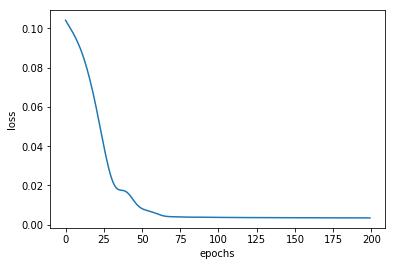

In [282]:
plt.plot(history1.history['loss'])
plt.ylabel('loss')
plt.xlabel('epochs')

In [283]:
trainPredict1 = model1.predict(trainN1)
testPredict1 = model1.predict(testN1)

In [284]:
testC1  = numpy.reshape(testC1, (test_size*column, 1))
testN1  = numpy.reshape(testN1, (test_size*column, 1))
testPredict1 = numpy.reshape(testPredict1, (test_size*column, 1))

trainC1  = numpy.reshape(trainC1, (train_size*column, 1))
trainN1  = numpy.reshape(trainN1, (train_size*column, 1))
trainPredict1 = numpy.reshape(trainPredict1, (train_size*column, 1))

print('trainN_Shape', numpy.shape(trainN1))
print('testN_Shape', numpy.shape(testN1))
print('trainPredict_Shape', numpy.shape(trainPredict1))
print('testredict_Shape', numpy.shape(testPredict1))

('trainN_Shape', (800, 1))
('testN_Shape', (200, 1))
('trainPredict_Shape', (800, 1))
('testredict_Shape', (200, 1))


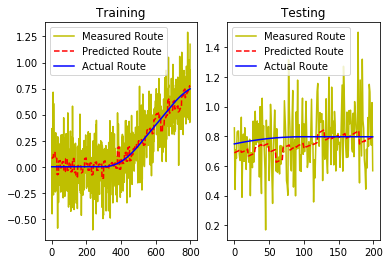

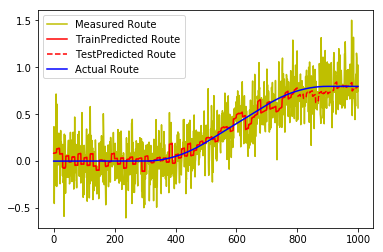

In [338]:
plt.subplot(1,2,1)

plt.plot(trainN1,'y')
plt.plot(trainPredict1,'r--')
plt.plot(trainC1,'b')
plt.legend(['Measured Route','Predicted Route','Actual Route'])
plt.title('Training')

plt.subplot(1,2,2)

plt.plot(testN1,'y')
plt.plot(testPredict1,'r--')
plt.plot(testC1,'b')
plt.legend(['Measured Route','Predicted Route', 'Actual Route'])
plt.title('Testing')
plt.show()

trainPredictPlot1 = numpy.empty_like(numpy.transpose([R1])) #shape of (1000,1)
trainPredictPlot1[:] = numpy.nan

trainPredictPlot1[0:len(trainPredict1)] = trainPredict1
# shift test predictions for plotting
testPredictPlot1 = numpy.empty_like(numpy.transpose([R1]))
testPredictPlot1[:] = numpy.nan
testPredictPlot1[len(trainPredict1):len(R1)] = testPredict1


plt.plot(M1,'y')#Noisy
plt.plot(trainPredictPlot1,'r')
plt.plot(testPredictPlot1,'r--')
plt.plot(R1,'b')#Noiseless

plt.legend(['Measured Route','TrainPredicted Route','TestPredicted Route','Actual Route'])
plt.show()

In [357]:
# MSE scores after Training
trainScore1 = mean_squared_error(trainC1, trainPredict1)
print('Train Score: %.4f MSE' % (trainScore1))
testScore1 = mean_squared_error(testC1, testPredict1)
print('Test Score: %.4f MSE' % (testScore1))

Train Score: 0.0034 MSE
Test Score: 0.0037 MSE


In [358]:
# Original MSE scores
otrainScore1 = mean_squared_error(trainC1, trainN1)
print('Train Score: %.4f MSE' % (otrainScore1))
otestScore1 = mean_squared_error(testC, testN)
print('Test Score: %.4f MSE' % (otestScore1))

Train Score: 0.0397 MSE
Test Score: 0.0406 MSE


## Model 2 - 3D

In [342]:
#i = 0
#j = 0

i = 26
j = 10
M2 = read_csv('/Users/Joanna/Documents/*PhD/Research/Matlab_Code/Conference_DeepLearning/Path2/y%d.csv'%noise_level[i][j], header = None)
R2 = read_csv('/Users/Joanna/Documents/*PhD/Research/Matlab_Code/Conference_DeepLearning/Path2/a%d.csv'%noise_level[i][j], header = None)
M2 = M2.T
R2 = R2.T
M2 = M2.values # NOISY
R2 = R2.values # NOISELESS

M2 = M2.astype('float32')
R2 = R2.astype('float32')

# scaler = MinMaxScaler(feature_range=(0, 1))
# M_r= scaler.fit_transform(M)
# R_r = scaler.fit_transform(R)

print('trainN_Shape', numpy.shape(M2))
print('testN_Shape', numpy.shape(R2))

M2_r= M2
R2_r = R2

# split by column
column = 10

M2_r = numpy.reshape(M2_r,(int(len(M2)/column),3, column))
R2_r = numpy.reshape(R2_r,(int(len(R2)/column),3, column))

# split into train and test sets
train_size2 = int(len(M2_r) * 0.8)
test_size2 = len(M2_r) - train_size2

trainN2, testN2 = M2_r[0:train_size2], M2_r[train_size2:len(M2_r)]
trainC2, testC2 = R2_r[0:train_size2], R2_r[train_size2:len(R2_r)]

print('trainN_Shape', numpy.shape(trainN2))
print('testN_Shape', numpy.shape(testN2))

('trainN_Shape', (1000, 3))
('testN_Shape', (1000, 3))
('trainN_Shape', (80, 3, 10))
('testN_Shape', (20, 3, 10))


In [343]:
numpy.random.seed(2)
model2 = Sequential()
model2.add(Dense(column, input_shape=(3, column), kernel_initializer='normal', activation='linear'))
#model1.add(Dense(40, kernel_initializer='normal', activation='linear'))
model2.add(Dense(80, kernel_initializer='normal', activation='linear'))
model2.add(Dense(80, kernel_initializer='normal', activation='linear'))
model2.add(Dense(10, kernel_initializer='normal', activation='linear'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 3, 10)             110       
_________________________________________________________________
dense_86 (Dense)             (None, 3, 80)             880       
_________________________________________________________________
dense_87 (Dense)             (None, 3, 80)             6480      
_________________________________________________________________
dense_88 (Dense)             (None, 3, 10)             810       
Total params: 8,280
Trainable params: 8,280
Non-trainable params: 0
_________________________________________________________________


In [344]:
model2.compile(loss='mean_squared_error', optimizer='adam')
history2 = model2.fit(trainN2, trainC2, epochs=200, batch_size=200)

Epoch 1/200
80/80 [==============================] - 7s 90ms/step - loss: 13.0739
Epoch 2/200
80/80 [==============================] - 0s 69us/step - loss: 13.0279
Epoch 3/200
80/80 [==============================] - 0s 71us/step - loss: 12.9653
Epoch 4/200
80/80 [==============================] - 0s 61us/step - loss: 12.9065
Epoch 5/200
80/80 [==============================] - 0s 78us/step - loss: 12.8387
Epoch 6/200
80/80 [==============================] - 0s 87us/step - loss: 12.7697
Epoch 7/200
80/80 [==============================] - 0s 83us/step - loss: 12.6925
Epoch 8/200
80/80 [==============================] - 0s 73us/step - loss: 12.6089
Epoch 9/200
80/80 [==============================] - 0s 83us/step - loss: 12.5178
Epoch 10/200
80/80 [==============================] - 0s 80us/step - loss: 12.4189
Epoch 11/200
80/80 [==============================] - 0s 96us/step - loss: 12.3094
Epoch 12/200
80/80 [==============================] - 0s 88us/step - loss: 12.1887
Epoch 13/200


Epoch 101/200
80/80 [==============================] - 0s 77us/step - loss: 0.0619
Epoch 102/200
80/80 [==============================] - 0s 83us/step - loss: 0.0607
Epoch 103/200
80/80 [==============================] - 0s 85us/step - loss: 0.0596
Epoch 104/200
80/80 [==============================] - 0s 73us/step - loss: 0.0588
Epoch 105/200
80/80 [==============================] - 0s 78us/step - loss: 0.0582
Epoch 106/200
80/80 [==============================] - 0s 74us/step - loss: 0.0578
Epoch 107/200
80/80 [==============================] - 0s 74us/step - loss: 0.0577
Epoch 108/200
80/80 [==============================] - 0s 71us/step - loss: 0.0577
Epoch 109/200
80/80 [==============================] - 0s 76us/step - loss: 0.0579
Epoch 110/200
80/80 [==============================] - 0s 81us/step - loss: 0.0580
Epoch 111/200
80/80 [==============================] - 0s 74us/step - loss: 0.0581
Epoch 112/200
80/80 [==============================] - 0s 78us/step - loss: 0.0582
Epoc

Epoch 200/200
80/80 [==============================] - 0s 91us/step - loss: 0.0560


Text(0,0.5,u'loss')

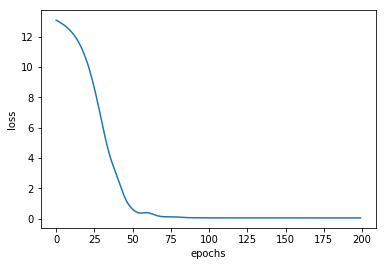

In [345]:
plt.plot(history2.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

In [346]:
trainPredict2 = model2.predict(trainN2)
testPredict2 = model2.predict(testN2)

In [347]:
testC2  = numpy.reshape(testC2, (test_size2*column, 3))
testN2  = numpy.reshape(testN2, (test_size2*column, 3))
testPredict2 = numpy.reshape(testPredict2, (test_size2*column, 3))

trainC2  = numpy.reshape(trainC2, (train_size2*column, 3))
trainN2  = numpy.reshape(trainN2, (train_size2*column, 3))
trainPredict2 = numpy.reshape(trainPredict2, (train_size2*column, 3))

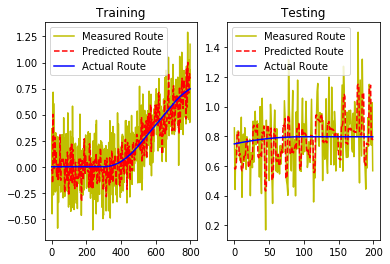

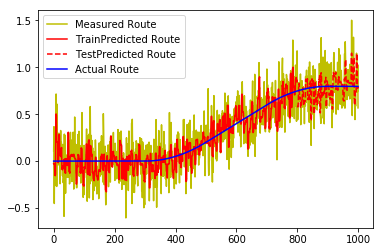

In [348]:
plt.subplot(1,2,1)

plt.plot(trainN2[:,0],'y')
plt.plot(trainPredict2[:,0],'r--')
plt.plot(trainC2[:,0],'b')
plt.legend(['Measured Route','Predicted Route','Actual Route'])
plt.title('Training')

plt.subplot(1,2,2)

plt.plot(testN2[:,0],'y')
plt.plot(testPredict2[:,0],'r--')
plt.plot(testC2[:,0],'b')
plt.legend(['Measured Route','Predicted Route', 'Actual Route'])
plt.title('Testing')
plt.show()

trainPredictPlot2 = numpy.empty_like(R2[:,0])
trainPredictPlot2[:] = numpy.nan
trainPredictPlot2[0:len(trainPredict2)] = trainPredict2[:,0]
# shift test predictions for plotting
testPredictPlot2 = numpy.empty_like(R2[:,0])
testPredictPlot2[:] = numpy.nan
testPredictPlot2[len(trainPredict2):len(R2)] = testPredict2[:,0]


plt.plot(M2[:,0],'y')#Noisy
plt.plot(trainPredictPlot2,'r')
plt.plot(testPredictPlot2,'r--')
plt.plot(R2[:,0],'b')#Noiseless

plt.legend(['Measured Route','TrainPredicted Route','TestPredicted Route','Actual Route'])
plt.show()

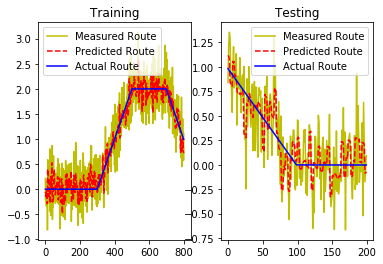

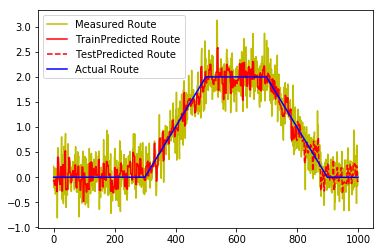

In [349]:
plt.subplot(1,2,1)

plt.plot(trainN2[:,1],'y')
plt.plot(trainPredict2[:,1],'r--')
plt.plot(trainC2[:,1],'b')
plt.legend(['Measured Route','Predicted Route','Actual Route'])
plt.title('Training')

plt.subplot(1,2,2)

plt.plot(testN2[:,1],'y')
plt.plot(testPredict2[:,1],'r--')
plt.plot(testC2[:,1],'b')
plt.legend(['Measured Route','Predicted Route', 'Actual Route'])
plt.title('Testing')
plt.show()

trainPredictPlot2 = numpy.empty_like(R2[:,1])
trainPredictPlot2[:] = numpy.nan
trainPredictPlot2[0:len(trainPredict2)] = trainPredict2[:,1]
# shift test predictions for plotting
testPredictPlot2 = numpy.empty_like(R2[:,1])
testPredictPlot2[:] = numpy.nan
testPredictPlot2[len(trainPredict2):len(R2)] = testPredict2[:,1]


plt.plot(M2[:,1],'y')#Noisy
plt.plot(trainPredictPlot2,'r')
plt.plot(testPredictPlot2,'r--')
plt.plot(R2[:,1],'b')#Noiseless

plt.legend(['Measured Route','TrainPredicted Route','TestPredicted Route','Actual Route'])
plt.show()

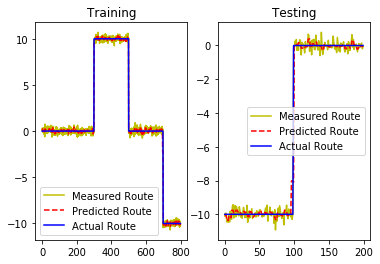

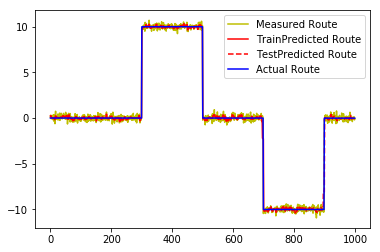

In [350]:
plt.subplot(1,2,1)

plt.plot(trainN2[:,2],'y')
plt.plot(trainPredict2[:,2],'r--')
plt.plot(trainC2[:,2],'b')
plt.legend(['Measured Route','Predicted Route','Actual Route'])
plt.title('Training')

plt.subplot(1,2,2)

plt.plot(testN2[:,2],'y')
plt.plot(testPredict2[:,2],'r--')
plt.plot(testC2[:,2],'b')
plt.legend(['Measured Route','Predicted Route', 'Actual Route'])
plt.title('Testing')
plt.show()

trainPredictPlot2 = numpy.empty_like(R2[:,2])
trainPredictPlot2[:] = numpy.nan
trainPredictPlot2[0:len(trainPredict2)] = trainPredict2[:,2]
# shift test predictions for plotting
testPredictPlot2 = numpy.empty_like(R2[:,2])
testPredictPlot2[:] = numpy.nan
testPredictPlot2[len(trainPredict2):len(R2)] = testPredict2[:,2]


plt.plot(M2[:,2],'y')#Noisy
plt.plot(trainPredictPlot2,'r')
plt.plot(testPredictPlot2,'r--')
plt.plot(R2[:,2],'b')#Noiseless

plt.legend(['Measured Route','TrainPredicted Route','TestPredicted Route','Actual Route'])
plt.show()

In [355]:
# MSE scores after Training
trainScore2 = mean_squared_error(trainC2[:,0], trainPredict2[:,0])
print('Train Score: %.4f MSE' % (trainScore2))
testScore2 = mean_squared_error(testC2[:,0], testPredict2[:,0])
print('Test Score: %.4f MSE' % (testScore2))

Train Score: 0.0168 MSE
Test Score: 0.0192 MSE


In [356]:
# Original MSE scores
otrainScore2 = mean_squared_error(trainC2[:,0], trainN2[:,0])
print('Train Score: %.4f MSE' % (otrainScore1))
otestScore2 = mean_squared_error(testC2[:,0], testN2[:,0])
print('Test Score: %.4f MSE' % (otestScore2))

Train Score: 0.0397 MSE
Test Score: 0.0406 MSE


## Model 3 - 3D

## Randomly Choosing Training and Testing Sets

In [192]:
# Selecting training and testing datasets
import random
full_index = [i for i in range(1,2026)]
index = []
while len(index) < 405:
    temp = random.randint(1, 2025)
    if temp not in index:
        index.append(temp)      #index: test
    if temp in full_index:
        full_index.remove(temp) # full_index: training

## Number of Columns 

In [113]:
column = 10

In [320]:
## Get training dataset
# noisy
X = read_csv('/Users/Joanna/Documents/*PhD/Research/Matlab_Code/Conference_DeepLearning/Path/y%d.csv'%full_index[0], header = None)
X = X.T
X = X.values
X = numpy.reshape(X,(int(numpy.shape(X)[0]/column),3,column))

# noiseless
Y = read_csv('/Users/Joanna/Documents/*PhD/Research/Matlab_Code/Conference_DeepLearning/Path/a%d.csv'%full_index[0], header = None)
Y = Y.T
Y = Y.values
Y = numpy.reshape(Y,(int(numpy.shape(Y)[0]/column),3,column))

for num in full_index[1:]:
    X_read = read_csv('/Users/Joanna/Documents/*PhD/Research/Matlab_Code/Conference_DeepLearning/Path/' + 'y%d.csv'%num, header = None)
    X_read = X_read.T
    X_read = X_read.values
    X_read = numpy.reshape(X_read,(int(numpy.shape(X_read)[0]/column),3,column))
    X = numpy.concatenate((X, X_read), axis=0)
    #X = pd.concat([X,X_read], axis = 1)

    Y_read = read_csv('/Users/Joanna/Documents/*PhD/Research/Matlab_Code/Conference_DeepLearning/Path/' + 'a%d.csv'%num, header = None)
    Y_read = Y_read.T
    Y_read = Y_read.values
    Y_read = numpy.reshape(Y_read,(int(numpy.shape(Y_read)[0]/column),3,column))
    Y = numpy.concatenate((Y, Y_read), axis=0)
    #Y = pd.concat([Y,Y_read], axis = 1)

In [321]:
## Get test dataset
# noisy
X_test = read_csv('/Users/Joanna/Documents/*PhD/Research/Matlab_Code/Conference_DeepLearning/Path/y%d.csv'%index[0], header = None)
X_test = X_test.T
X_test = X_test.values
X_test = numpy.reshape(X_test,(int(numpy.shape(X_test)[0]/column),3,column))

# noiseless
Y_test = read_csv('/Users/Joanna/Documents/*PhD/Research/Matlab_Code/Conference_DeepLearning/Path/a%d.csv'%index[0], header = None)
Y_test = Y_test.T
Y_test = Y_test.values
Y_test = numpy.reshape(Y_test,(int(numpy.shape(Y_test)[0]/column),3,column))

for num in index[1:]:
    X_read = read_csv('/Users/Joanna/Documents/*PhD/Research/Matlab_Code/Conference_DeepLearning/Path/' + 'y%d.csv'%num, header = None)
    X_read = X_read.T
    X_read = X_read.values
    X_read = numpy.reshape(X_read,(int(numpy.shape(X_read)[0]/column),3,column))
    X_test = numpy.concatenate((X_test, X_read), axis=0)
    #X_test = pd.concat([X_test,X_read], axis = 1)
    Y_read = read_csv('/Users/Joanna/Documents/*PhD/Research/Matlab_Code/Conference_DeepLearning/Path/' + 'a%d.csv'%num, header = None)
    Y_read = Y_read.T
    Y_read = Y_read.values
    Y_read = numpy.reshape(Y_read,(int(numpy.shape(Y_read)[0]/column),3,column))
    Y_test = numpy.concatenate((Y_test, Y_read), axis=0)
    #Y_test = pd.concat([Y_test,Y_read], axis = 1)

In [322]:
numpy.random.seed(2)
model3 = Sequential()
model3.add(Dense(column, input_shape=(3, column), kernel_initializer='normal', activation='linear'))
model3.add(Dense(80, kernel_initializer='normal', activation='linear'))
model3.add(Dense(80, kernel_initializer='normal', activation='linear'))
model3.add(Dense(100, kernel_initializer='normal', activation='linear'))
model3.add(Dense(100, kernel_initializer='normal', activation='linear'))
model3.add(Dense(80, kernel_initializer='normal', activation='linear'))
model3.add(Dense(80, kernel_initializer='normal', activation='linear'))
model3.add(Dense(40, kernel_initializer='normal', activation='linear'))
model3.add(Dense(40, kernel_initializer='normal', activation='linear'))
model3.add(Dense(column, kernel_initializer='normal', activation='linear'))
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 3, 10)             110       
_________________________________________________________________
dense_76 (Dense)             (None, 3, 80)             880       
_________________________________________________________________
dense_77 (Dense)             (None, 3, 80)             6480      
_________________________________________________________________
dense_78 (Dense)             (None, 3, 100)            8100      
_________________________________________________________________
dense_79 (Dense)             (None, 3, 100)            10100     
_________________________________________________________________
dense_80 (Dense)             (None, 3, 80)             8080      
_________________________________________________________________
dense_81 (Dense)             (None, 3, 80)             6480      
__________

In [326]:
model3.compile(loss='mean_squared_error', optimizer='adam')
history3 = model3.fit(X, Y, epochs=200, batch_size=200)

Epoch 1/200
162000/162000 [==============================] - 15s 90us/step - loss: 0.0264
Epoch 2/200
162000/162000 [==============================] - 7s 44us/step - loss: 0.0262
Epoch 3/200
162000/162000 [==============================] - 7s 44us/step - loss: 0.0262
Epoch 4/200
162000/162000 [==============================] - 7s 44us/step - loss: 0.0262
Epoch 5/200
162000/162000 [==============================] - 7s 44us/step - loss: 0.0263
Epoch 6/200
162000/162000 [==============================] - 7s 44us/step - loss: 0.0262
Epoch 7/200
162000/162000 [==============================] - 7s 44us/step - loss: 0.0263
Epoch 8/200
162000/162000 [==============================] - 7s 44us/step - loss: 0.0262
Epoch 9/200
162000/162000 [==============================] - 7s 44us/step - loss: 0.0262
Epoch 10/200
162000/162000 [==============================] - 7s 44us/step - loss: 0.0262
Epoch 11/200
162000/162000 [==============================] - 7s 45us/step - loss: 0.0262
Epoch 12/200
16200

162000/162000 [==============================] - 7s 46us/step - loss: 0.0261
Epoch 93/200
162000/162000 [==============================] - 8s 47us/step - loss: 0.0260
Epoch 94/200
162000/162000 [==============================] - 7s 45us/step - loss: 0.0260
Epoch 95/200
162000/162000 [==============================] - 7s 45us/step - loss: 0.0261
Epoch 96/200
162000/162000 [==============================] - 7s 44us/step - loss: 0.0259
Epoch 97/200
162000/162000 [==============================] - 7s 44us/step - loss: 0.0260
Epoch 98/200
162000/162000 [==============================] - 7s 44us/step - loss: 0.0262
Epoch 99/200
162000/162000 [==============================] - 7s 44us/step - loss: 0.0260
Epoch 100/200
162000/162000 [==============================] - 7s 44us/step - loss: 0.0260
Epoch 101/200
162000/162000 [==============================] - 7s 44us/step - loss: 0.0260
Epoch 102/200
162000/162000 [==============================] - 7s 44us/step - loss: 0.0259
Epoch 103/200
162000

162000/162000 [==============================] - 8s 47us/step - loss: 0.0259
Epoch 183/200
162000/162000 [==============================] - 8s 48us/step - loss: 0.0259
Epoch 184/200
162000/162000 [==============================] - 8s 47us/step - loss: 0.0259
Epoch 185/200
162000/162000 [==============================] - 8s 48us/step - loss: 0.0259
Epoch 186/200
162000/162000 [==============================] - 8s 49us/step - loss: 0.0259
Epoch 187/200
162000/162000 [==============================] - 8s 49us/step - loss: 0.0259
Epoch 188/200
162000/162000 [==============================] - 8s 49us/step - loss: 0.0259
Epoch 189/200
162000/162000 [==============================] - 8s 48us/step - loss: 0.0259
Epoch 190/200
162000/162000 [==============================] - 8s 47us/step - loss: 0.0258
Epoch 191/200
162000/162000 [==============================] - 8s 47us/step - loss: 0.0259
Epoch 192/200
162000/162000 [==============================] - 8s 47us/step - loss: 0.0259
Epoch 193/200

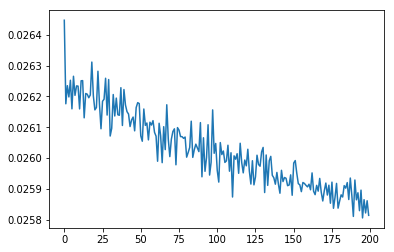

In [327]:
plt.plot(history3.history['loss'])

In [328]:
model3.save_weights('generalmodel.h5')

In [197]:
#model3.load_weights('generalmodel.h5')

## Results

## Model 1

In [365]:
result = []
for j in range(len(noise_level[0])): #
    result1 = []
    #print('j', j)
    for i in range(len(noise_level)): #
        #print('i', i)
        M = read_csv('/Users/Joanna/Documents/*PhD/Research/Matlab_Code/Conference_DeepLearning/Path2/y%d.csv'%noise_level[i][j], header = None)
        R = read_csv('/Users/Joanna/Documents/*PhD/Research/Matlab_Code/Conference_DeepLearning/Path2/a%d.csv'%noise_level[i][j], header = None)
        M = M.T
        R = R.T
        M = M.values[:,0] # NOISY
        R = R.values[:,0] # NOISELESS

        M = M.astype('float32')
        R = R.astype('float32')

        # scaler = MinMaxScaler(feature_range=(0, 1))
        # M_r= scaler.fit_transform(M)
        # R_r = scaler.fit_transform(R)
        
        #M = numpy.transpose([M])
        #R = numpy.transpose([R])

        M_r= M
        R_r = R

        column = 10

        M_r = numpy.reshape(M_r,(int(len(M)/column),column))
        R_r = numpy.reshape(R_r,(int(len(R)/column),column))

        # split into train and test sets
        train_size = int(len(M_r) * 0.8) #0.67
        test_size = len(M_r) - train_size

        trainN, testN = M_r[0:train_size], M_r[train_size:len(M_r)]
        trainC, testC = R_r[0:train_size], R_r[train_size:len(R_r)]
        
        trainC  = numpy.reshape(trainC, (train_size, 1, column))
        trainN  = numpy.reshape(trainN, (train_size, 1, column))
        testC  = numpy.reshape(testC, (test_size, 1, column))
        testN  = numpy.reshape(testN, (test_size, 1, column))
        
        model1.compile(loss='mean_squared_error', optimizer='adam')
        history_g1 = model1.fit(trainN, trainC, epochs=200, batch_size=200)
        
        trainPredict = model1.predict(trainN)
        testPredict = model1.predict(testN)
        
        testC  = numpy.reshape(testC, (test_size*column, 1))
        testN  = numpy.reshape(testN, (test_size*column, 1))
        testPredict = numpy.reshape(testPredict, (test_size*column, 1))

        trainC  = numpy.reshape(trainC, (train_size*column, 1))
        trainN  = numpy.reshape(trainN, (train_size*column, 1))
        trainPredict = numpy.reshape(trainPredict, (train_size*column, 1))
        
        trainScore_1 = mean_squared_error(trainC[:], trainPredict[:])
        testScore_1 = mean_squared_error(testC[:], testPredict[:])
        
        trainScore_2 = mean_squared_error(trainC[:], trainN[:])
        testScore_2 = mean_squared_error(testC[:], testN[:])
    
        result1.append(testScore_2/testScore_1)
        print('result1', result1)
    result.append(result1)
        
        

Epoch 1/200
80/80 [==============================] - 8s 100ms/step - loss: 0.0017
Epoch 2/200
80/80 [==============================] - 0s 66us/step - loss: 0.0018
Epoch 3/200
80/80 [==============================] - 0s 72us/step - loss: 0.0017
Epoch 4/200
80/80 [==============================] - 0s 74us/step - loss: 0.0018
Epoch 5/200
80/80 [==============================] - 0s 81us/step - loss: 0.0017
Epoch 6/200
80/80 [==============================] - 0s 89us/step - loss: 0.0017
Epoch 7/200
80/80 [==============================] - 0s 85us/step - loss: 0.0018
Epoch 8/200
80/80 [==============================] - 0s 80us/step - loss: 0.0017
Epoch 9/200
80/80 [==============================] - 0s 80us/step - loss: 0.0017
Epoch 10/200
80/80 [==============================] - 0s 84us/step - loss: 0.0017
Epoch 11/200
80/80 [==============================] - 0s 97us/step - loss: 0.0017
Epoch 12/200
80/80 [==============================] - 0s 89us/step - loss: 0.0017
Epoch 13/200
80/80 [====

Epoch 101/200
80/80 [==============================] - 0s 78us/step - loss: 0.0017
Epoch 102/200
80/80 [==============================] - 0s 78us/step - loss: 0.0017
Epoch 103/200
80/80 [==============================] - 0s 93us/step - loss: 0.0017
Epoch 104/200
80/80 [==============================] - 0s 80us/step - loss: 0.0017
Epoch 105/200
80/80 [==============================] - 0s 68us/step - loss: 0.0017
Epoch 106/200
80/80 [==============================] - 0s 71us/step - loss: 0.0017
Epoch 107/200
80/80 [==============================] - 0s 78us/step - loss: 0.0017
Epoch 108/200
80/80 [==============================] - 0s 77us/step - loss: 0.0017
Epoch 109/200
80/80 [==============================] - 0s 75us/step - loss: 0.0017
Epoch 110/200
80/80 [==============================] - 0s 86us/step - loss: 0.0017
Epoch 111/200
80/80 [==============================] - 0s 74us/step - loss: 0.0017
Epoch 112/200
80/80 [==============================] - 0s 86us/step - loss: 0.0017
Epoc

Epoch 200/200
80/80 [==============================] - 0s 90us/step - loss: 0.0017
('result1', [15.873649])
Epoch 1/200
80/80 [==============================] - 8s 102ms/step - loss: 0.0017
Epoch 2/200
80/80 [==============================] - 0s 72us/step - loss: 0.0017
Epoch 3/200
80/80 [==============================] - 0s 82us/step - loss: 0.0018
Epoch 4/200
80/80 [==============================] - 0s 81us/step - loss: 0.0017
Epoch 5/200
80/80 [==============================] - 0s 85us/step - loss: 0.0018
Epoch 6/200
80/80 [==============================] - 0s 96us/step - loss: 0.0017
Epoch 7/200
80/80 [==============================] - 0s 99us/step - loss: 0.0017
Epoch 8/200
80/80 [==============================] - 0s 78us/step - loss: 0.0018
Epoch 9/200
80/80 [==============================] - 0s 88us/step - loss: 0.0018
Epoch 10/200
80/80 [==============================] - 0s 82us/step - loss: 0.0017
Epoch 11/200
80/80 [==============================] - 0s 89us/step - loss: 0.001

Epoch 100/200
80/80 [==============================] - 0s 82us/step - loss: 0.0017
Epoch 101/200
80/80 [==============================] - 0s 90us/step - loss: 0.0017
Epoch 102/200
80/80 [==============================] - 0s 83us/step - loss: 0.0017
Epoch 103/200
80/80 [==============================] - 0s 103us/step - loss: 0.0017
Epoch 104/200
80/80 [==============================] - 0s 85us/step - loss: 0.0017
Epoch 105/200
80/80 [==============================] - 0s 83us/step - loss: 0.0017
Epoch 106/200
80/80 [==============================] - 0s 86us/step - loss: 0.0017
Epoch 107/200
80/80 [==============================] - 0s 80us/step - loss: 0.0017
Epoch 108/200
80/80 [==============================] - 0s 82us/step - loss: 0.0017
Epoch 109/200
80/80 [==============================] - 0s 72us/step - loss: 0.0017
Epoch 110/200
80/80 [==============================] - 0s 79us/step - loss: 0.0017
Epoch 111/200
80/80 [==============================] - 0s 97us/step - loss: 0.0017
Epo

Epoch 199/200
80/80 [==============================] - 0s 102us/step - loss: 0.0017
Epoch 200/200
80/80 [==============================] - 0s 80us/step - loss: 0.0017
('result1', [15.873649, 15.873437])
Epoch 1/200
80/80 [==============================] - 9s 111ms/step - loss: 0.0017
Epoch 2/200
80/80 [==============================] - 0s 71us/step - loss: 0.0017
Epoch 3/200
80/80 [==============================] - 0s 75us/step - loss: 0.0018
Epoch 4/200
80/80 [==============================] - 0s 84us/step - loss: 0.0017
Epoch 5/200
80/80 [==============================] - 0s 73us/step - loss: 0.0018
Epoch 6/200
80/80 [==============================] - 0s 95us/step - loss: 0.0017
Epoch 7/200
80/80 [==============================] - 0s 82us/step - loss: 0.0017
Epoch 8/200
80/80 [==============================] - 0s 85us/step - loss: 0.0017
Epoch 9/200
80/80 [==============================] - 0s 82us/step - loss: 0.0017
Epoch 10/200
80/80 [==============================] - 0s 82us/step 

Epoch 99/200
80/80 [==============================] - 0s 87us/step - loss: 0.0017
Epoch 100/200
80/80 [==============================] - 0s 89us/step - loss: 0.0017
Epoch 101/200
80/80 [==============================] - 0s 82us/step - loss: 0.0017
Epoch 102/200
80/80 [==============================] - 0s 74us/step - loss: 0.0017
Epoch 103/200
80/80 [==============================] - 0s 80us/step - loss: 0.0017
Epoch 104/200
80/80 [==============================] - 0s 83us/step - loss: 0.0017
Epoch 105/200
80/80 [==============================] - 0s 81us/step - loss: 0.0017
Epoch 106/200
80/80 [==============================] - 0s 79us/step - loss: 0.0017
Epoch 107/200
80/80 [==============================] - 0s 95us/step - loss: 0.0017
Epoch 108/200
80/80 [==============================] - 0s 101us/step - loss: 0.0017
Epoch 109/200
80/80 [==============================] - 0s 98us/step - loss: 0.0017
Epoch 110/200
80/80 [==============================] - 0s 92us/step - loss: 0.0017
Epoc

Epoch 198/200
80/80 [==============================] - 0s 87us/step - loss: 0.0017
Epoch 199/200
80/80 [==============================] - 0s 81us/step - loss: 0.0017
Epoch 200/200
80/80 [==============================] - 0s 85us/step - loss: 0.0017
('result1', [15.873649, 15.873437, 15.873186])
Epoch 1/200
80/80 [==============================] - 9s 111ms/step - loss: 0.0017
Epoch 2/200
80/80 [==============================] - 0s 86us/step - loss: 0.0017
Epoch 3/200
80/80 [==============================] - 0s 81us/step - loss: 0.0018
Epoch 4/200
80/80 [==============================] - 0s 87us/step - loss: 0.0017
Epoch 5/200
80/80 [==============================] - 0s 93us/step - loss: 0.0018
Epoch 6/200
80/80 [==============================] - 0s 84us/step - loss: 0.0017
Epoch 7/200
80/80 [==============================] - 0s 93us/step - loss: 0.0017
Epoch 8/200
80/80 [==============================] - 0s 91us/step - loss: 0.0018
Epoch 9/200
80/80 [==============================] - 0s

Epoch 98/200
80/80 [==============================] - 0s 95us/step - loss: 0.0017
Epoch 99/200
80/80 [==============================] - 0s 89us/step - loss: 0.0017
Epoch 100/200
80/80 [==============================] - 0s 84us/step - loss: 0.0017
Epoch 101/200
80/80 [==============================] - 0s 85us/step - loss: 0.0017
Epoch 102/200
80/80 [==============================] - 0s 92us/step - loss: 0.0017
Epoch 103/200
80/80 [==============================] - 0s 96us/step - loss: 0.0017
Epoch 104/200
80/80 [==============================] - 0s 105us/step - loss: 0.0017
Epoch 105/200
80/80 [==============================] - 0s 99us/step - loss: 0.0017
Epoch 106/200
80/80 [==============================] - 0s 84us/step - loss: 0.0017
Epoch 107/200
80/80 [==============================] - 0s 92us/step - loss: 0.0017
Epoch 108/200
80/80 [==============================] - 0s 95us/step - loss: 0.0017
Epoch 109/200
80/80 [==============================] - 0s 89us/step - loss: 0.0017
Epoch

Epoch 197/200
80/80 [==============================] - 0s 94us/step - loss: 0.0017
Epoch 198/200
80/80 [==============================] - 0s 82us/step - loss: 0.0017
Epoch 199/200
80/80 [==============================] - 0s 76us/step - loss: 0.0017
Epoch 200/200
80/80 [==============================] - 0s 91us/step - loss: 0.0017
('result1', [15.873649, 15.873437, 15.873186, 15.873521])
Epoch 1/200
80/80 [==============================] - 8s 103ms/step - loss: 0.0017
Epoch 2/200
80/80 [==============================] - 0s 72us/step - loss: 0.0017
Epoch 3/200
80/80 [==============================] - 0s 76us/step - loss: 0.0019
Epoch 4/200
80/80 [==============================] - 0s 80us/step - loss: 0.0017
Epoch 5/200
80/80 [==============================] - 0s 87us/step - loss: 0.0019
Epoch 6/200
80/80 [==============================] - 0s 87us/step - loss: 0.0018
Epoch 7/200
80/80 [==============================] - 0s 79us/step - loss: 0.0017
Epoch 8/200
80/80 [=======================

Epoch 97/200
80/80 [==============================] - 0s 92us/step - loss: 0.0017
Epoch 98/200
80/80 [==============================] - 0s 96us/step - loss: 0.0017
Epoch 99/200
80/80 [==============================] - 0s 77us/step - loss: 0.0017
Epoch 100/200
80/80 [==============================] - 0s 76us/step - loss: 0.0017
Epoch 101/200
80/80 [==============================] - 0s 91us/step - loss: 0.0017
Epoch 102/200
80/80 [==============================] - 0s 100us/step - loss: 0.0017
Epoch 103/200
80/80 [==============================] - 0s 88us/step - loss: 0.0017
Epoch 104/200
80/80 [==============================] - 0s 91us/step - loss: 0.0017
Epoch 105/200
80/80 [==============================] - 0s 95us/step - loss: 0.0017
Epoch 106/200
80/80 [==============================] - 0s 81us/step - loss: 0.0017
Epoch 107/200
80/80 [==============================] - 0s 88us/step - loss: 0.0017
Epoch 108/200
80/80 [==============================] - 0s 85us/step - loss: 0.0017
Epoch 

Epoch 196/200
80/80 [==============================] - 0s 106us/step - loss: 0.0017
Epoch 197/200
80/80 [==============================] - 0s 76us/step - loss: 0.0017
Epoch 198/200
80/80 [==============================] - 0s 89us/step - loss: 0.0017
Epoch 199/200
80/80 [==============================] - 0s 88us/step - loss: 0.0017
Epoch 200/200
80/80 [==============================] - 0s 105us/step - loss: 0.0017
('result1', [15.873649, 15.873437, 15.873186, 15.873521, 15.872925])
Epoch 1/200
80/80 [==============================] - 9s 110ms/step - loss: 0.0017
Epoch 2/200
80/80 [==============================] - 0s 80us/step - loss: 0.0017
Epoch 3/200
80/80 [==============================] - 0s 85us/step - loss: 0.0019
Epoch 4/200
80/80 [==============================] - 0s 88us/step - loss: 0.0017
Epoch 5/200
80/80 [==============================] - 0s 87us/step - loss: 0.0019
Epoch 6/200
80/80 [==============================] - 0s 91us/step - loss: 0.0018
Epoch 7/200
80/80 [========

Epoch 95/200
80/80 [==============================] - 0s 78us/step - loss: 0.0017
Epoch 96/200
80/80 [==============================] - 0s 94us/step - loss: 0.0017
Epoch 97/200
80/80 [==============================] - 0s 87us/step - loss: 0.0017
Epoch 98/200
80/80 [==============================] - 0s 114us/step - loss: 0.0017
Epoch 99/200
80/80 [==============================] - 0s 81us/step - loss: 0.0017
Epoch 100/200
80/80 [==============================] - 0s 91us/step - loss: 0.0017
Epoch 101/200
80/80 [==============================] - 0s 79us/step - loss: 0.0017
Epoch 102/200
80/80 [==============================] - 0s 97us/step - loss: 0.0017
Epoch 103/200
80/80 [==============================] - 0s 84us/step - loss: 0.0017
Epoch 104/200
80/80 [==============================] - 0s 93us/step - loss: 0.0017
Epoch 105/200
80/80 [==============================] - 0s 108us/step - loss: 0.0017
Epoch 106/200
80/80 [==============================] - 0s 100us/step - loss: 0.0017
Epoch 

Epoch 194/200
80/80 [==============================] - 0s 80us/step - loss: 0.0017
Epoch 195/200
80/80 [==============================] - 0s 85us/step - loss: 0.0017
Epoch 196/200
80/80 [==============================] - 0s 86us/step - loss: 0.0017
Epoch 197/200
80/80 [==============================] - 0s 100us/step - loss: 0.0017
Epoch 198/200
80/80 [==============================] - 0s 88us/step - loss: 0.0017
Epoch 199/200
80/80 [==============================] - 0s 106us/step - loss: 0.0017
Epoch 200/200
80/80 [==============================] - 0s 75us/step - loss: 0.0017
('result1', [15.873649, 15.873437, 15.873186, 15.873521, 15.872925, 15.87329])
Epoch 1/200
80/80 [==============================] - 9s 108ms/step - loss: 0.0017
Epoch 2/200
80/80 [==============================] - 0s 72us/step - loss: 0.0017
Epoch 3/200
80/80 [==============================] - 0s 73us/step - loss: 0.0018
Epoch 4/200
80/80 [==============================] - 0s 81us/step - loss: 0.0017
Epoch 5/200
8

Epoch 93/200
80/80 [==============================] - 0s 78us/step - loss: 0.0017
Epoch 94/200
80/80 [==============================] - 0s 76us/step - loss: 0.0017
Epoch 95/200
80/80 [==============================] - 0s 75us/step - loss: 0.0017
Epoch 96/200
80/80 [==============================] - 0s 72us/step - loss: 0.0017
Epoch 97/200
80/80 [==============================] - 0s 77us/step - loss: 0.0017
Epoch 98/200
80/80 [==============================] - 0s 86us/step - loss: 0.0017
Epoch 99/200
80/80 [==============================] - 0s 85us/step - loss: 0.0017
Epoch 100/200
80/80 [==============================] - 0s 78us/step - loss: 0.0017
Epoch 101/200
80/80 [==============================] - 0s 76us/step - loss: 0.0017
Epoch 102/200
80/80 [==============================] - 0s 68us/step - loss: 0.0017
Epoch 103/200
80/80 [==============================] - 0s 72us/step - loss: 0.0017
Epoch 104/200
80/80 [==============================] - 0s 82us/step - loss: 0.0017
Epoch 105/2

Epoch 192/200
80/80 [==============================] - 0s 75us/step - loss: 0.0017
Epoch 193/200
80/80 [==============================] - 0s 85us/step - loss: 0.0017
Epoch 194/200
80/80 [==============================] - 0s 95us/step - loss: 0.0017
Epoch 195/200
80/80 [==============================] - 0s 75us/step - loss: 0.0017
Epoch 196/200
80/80 [==============================] - 0s 82us/step - loss: 0.0017
Epoch 197/200
80/80 [==============================] - 0s 75us/step - loss: 0.0017
Epoch 198/200
80/80 [==============================] - 0s 86us/step - loss: 0.0017
Epoch 199/200
80/80 [==============================] - 0s 84us/step - loss: 0.0017
Epoch 200/200
80/80 [==============================] - 0s 100us/step - loss: 0.0017
('result1', [15.873649, 15.873437, 15.873186, 15.873521, 15.872925, 15.87329, 15.873208])
Epoch 1/200
80/80 [==============================] - 8s 103ms/step - loss: 0.0017
Epoch 2/200
80/80 [==============================] - 0s 74us/step - loss: 0.0017

Epoch 91/200
80/80 [==============================] - 0s 77us/step - loss: 0.0017
Epoch 92/200
80/80 [==============================] - 0s 94us/step - loss: 0.0017
Epoch 93/200
80/80 [==============================] - 0s 91us/step - loss: 0.0017
Epoch 94/200
80/80 [==============================] - 0s 84us/step - loss: 0.0017
Epoch 95/200
80/80 [==============================] - 0s 81us/step - loss: 0.0017
Epoch 96/200
80/80 [==============================] - 0s 81us/step - loss: 0.0017
Epoch 97/200
80/80 [==============================] - 0s 79us/step - loss: 0.0017
Epoch 98/200
80/80 [==============================] - 0s 87us/step - loss: 0.0017
Epoch 99/200
80/80 [==============================] - 0s 88us/step - loss: 0.0017
Epoch 100/200
80/80 [==============================] - 0s 96us/step - loss: 0.0017
Epoch 101/200
80/80 [==============================] - 0s 97us/step - loss: 0.0017
Epoch 102/200
80/80 [==============================] - 0s 102us/step - loss: 0.0017
Epoch 103/20

Epoch 190/200
80/80 [==============================] - 0s 84us/step - loss: 0.0017
Epoch 191/200
80/80 [==============================] - 0s 83us/step - loss: 0.0017
Epoch 192/200
80/80 [==============================] - 0s 98us/step - loss: 0.0017
Epoch 193/200
80/80 [==============================] - 0s 76us/step - loss: 0.0017
Epoch 194/200
80/80 [==============================] - 0s 72us/step - loss: 0.0017
Epoch 195/200
80/80 [==============================] - 0s 86us/step - loss: 0.0017
Epoch 196/200
80/80 [==============================] - 0s 84us/step - loss: 0.0017
Epoch 197/200
80/80 [==============================] - 0s 87us/step - loss: 0.0017
Epoch 198/200
80/80 [==============================] - 0s 99us/step - loss: 0.0017
Epoch 199/200
80/80 [==============================] - 0s 97us/step - loss: 0.0017
Epoch 200/200
80/80 [==============================] - 0s 106us/step - loss: 0.0017
('result1', [15.873649, 15.873437, 15.873186, 15.873521, 15.872925, 15.87329, 15.87320

Epoch 89/200
80/80 [==============================] - 0s 82us/step - loss: 0.0017
Epoch 90/200
80/80 [==============================] - 0s 71us/step - loss: 0.0017
Epoch 91/200
80/80 [==============================] - 0s 75us/step - loss: 0.0017
Epoch 92/200
80/80 [==============================] - 0s 73us/step - loss: 0.0017
Epoch 93/200
80/80 [==============================] - 0s 86us/step - loss: 0.0017
Epoch 94/200
80/80 [==============================] - 0s 87us/step - loss: 0.0017
Epoch 95/200
80/80 [==============================] - 0s 81us/step - loss: 0.0017
Epoch 96/200
80/80 [==============================] - 0s 86us/step - loss: 0.0017
Epoch 97/200
80/80 [==============================] - 0s 107us/step - loss: 0.0017
Epoch 98/200
80/80 [==============================] - 0s 104us/step - loss: 0.0017
Epoch 99/200
80/80 [==============================] - 0s 91us/step - loss: 0.0017
Epoch 100/200
80/80 [==============================] - 0s 78us/step - loss: 0.0017
Epoch 101/200

Epoch 188/200
80/80 [==============================] - 0s 74us/step - loss: 0.0017
Epoch 189/200
80/80 [==============================] - 0s 90us/step - loss: 0.0017
Epoch 190/200
80/80 [==============================] - 0s 88us/step - loss: 0.0017
Epoch 191/200
80/80 [==============================] - 0s 101us/step - loss: 0.0017
Epoch 192/200
80/80 [==============================] - 0s 71us/step - loss: 0.0017
Epoch 193/200
80/80 [==============================] - 0s 91us/step - loss: 0.0017
Epoch 194/200
80/80 [==============================] - 0s 81us/step - loss: 0.0017
Epoch 195/200
80/80 [==============================] - 0s 85us/step - loss: 0.0017
Epoch 196/200
80/80 [==============================] - 0s 92us/step - loss: 0.0017
Epoch 197/200
80/80 [==============================] - 0s 86us/step - loss: 0.0017
Epoch 198/200
80/80 [==============================] - 0s 96us/step - loss: 0.0017
Epoch 199/200
80/80 [==============================] - 0s 108us/step - loss: 0.0017
Ep

Epoch 87/200
80/80 [==============================] - 0s 89us/step - loss: 0.0025
Epoch 88/200
80/80 [==============================] - 0s 92us/step - loss: 0.0025
Epoch 89/200
80/80 [==============================] - 0s 79us/step - loss: 0.0025
Epoch 90/200
80/80 [==============================] - 0s 63us/step - loss: 0.0025
Epoch 91/200
80/80 [==============================] - 0s 92us/step - loss: 0.0025
Epoch 92/200
80/80 [==============================] - 0s 70us/step - loss: 0.0025
Epoch 93/200
80/80 [==============================] - 0s 88us/step - loss: 0.0025
Epoch 94/200
80/80 [==============================] - 0s 83us/step - loss: 0.0025
Epoch 95/200
80/80 [==============================] - 0s 90us/step - loss: 0.0025
Epoch 96/200
80/80 [==============================] - 0s 92us/step - loss: 0.0025
Epoch 97/200
80/80 [==============================] - 0s 89us/step - loss: 0.0025
Epoch 98/200
80/80 [==============================] - 0s 85us/step - loss: 0.0025
Epoch 99/200
80/

Epoch 186/200
80/80 [==============================] - 0s 80us/step - loss: 0.0025
Epoch 187/200
80/80 [==============================] - 0s 95us/step - loss: 0.0025
Epoch 188/200
80/80 [==============================] - 0s 84us/step - loss: 0.0025
Epoch 189/200
80/80 [==============================] - 0s 95us/step - loss: 0.0025
Epoch 190/200
80/80 [==============================] - 0s 89us/step - loss: 0.0025
Epoch 191/200
80/80 [==============================] - 0s 88us/step - loss: 0.0025
Epoch 192/200
80/80 [==============================] - 0s 84us/step - loss: 0.0025
Epoch 193/200
80/80 [==============================] - 0s 99us/step - loss: 0.0025
Epoch 194/200
80/80 [==============================] - 0s 109us/step - loss: 0.0025
Epoch 195/200
80/80 [==============================] - 0s 108us/step - loss: 0.0025
Epoch 196/200
80/80 [==============================] - 0s 104us/step - loss: 0.0025
Epoch 197/200
80/80 [==============================] - 0s 94us/step - loss: 0.0025
E

Epoch 85/200
80/80 [==============================] - 0s 72us/step - loss: 0.0025
Epoch 86/200
80/80 [==============================] - 0s 88us/step - loss: 0.0025
Epoch 87/200
80/80 [==============================] - 0s 89us/step - loss: 0.0025
Epoch 88/200
80/80 [==============================] - 0s 85us/step - loss: 0.0025
Epoch 89/200
80/80 [==============================] - 0s 86us/step - loss: 0.0025
Epoch 90/200
80/80 [==============================] - 0s 105us/step - loss: 0.0025
Epoch 91/200
80/80 [==============================] - 0s 89us/step - loss: 0.0025
Epoch 92/200
80/80 [==============================] - 0s 87us/step - loss: 0.0025
Epoch 93/200
80/80 [==============================] - 0s 86us/step - loss: 0.0025
Epoch 94/200
80/80 [==============================] - 0s 95us/step - loss: 0.0025
Epoch 95/200
80/80 [==============================] - 0s 96us/step - loss: 0.0025
Epoch 96/200
80/80 [==============================] - 0s 89us/step - loss: 0.0025
Epoch 97/200
80

Epoch 184/200
80/80 [==============================] - 0s 84us/step - loss: 0.0025
Epoch 185/200
80/80 [==============================] - 0s 82us/step - loss: 0.0025
Epoch 186/200
80/80 [==============================] - 0s 86us/step - loss: 0.0025
Epoch 187/200
80/80 [==============================] - 0s 88us/step - loss: 0.0025
Epoch 188/200
80/80 [==============================] - 0s 98us/step - loss: 0.0025
Epoch 189/200
80/80 [==============================] - 0s 90us/step - loss: 0.0025
Epoch 190/200
80/80 [==============================] - 0s 81us/step - loss: 0.0025
Epoch 191/200
80/80 [==============================] - 0s 76us/step - loss: 0.0025
Epoch 192/200
80/80 [==============================] - 0s 82us/step - loss: 0.0025
Epoch 193/200
80/80 [==============================] - 0s 86us/step - loss: 0.0025
Epoch 194/200
80/80 [==============================] - 0s 88us/step - loss: 0.0025
Epoch 195/200
80/80 [==============================] - 0s 86us/step - loss: 0.0025
Epoc

Epoch 83/200
80/80 [==============================] - 0s 93us/step - loss: 0.0025
Epoch 84/200
80/80 [==============================] - 0s 89us/step - loss: 0.0025
Epoch 85/200
80/80 [==============================] - 0s 83us/step - loss: 0.0025
Epoch 86/200
80/80 [==============================] - 0s 80us/step - loss: 0.0025
Epoch 87/200
80/80 [==============================] - 0s 88us/step - loss: 0.0025
Epoch 88/200
80/80 [==============================] - 0s 85us/step - loss: 0.0025
Epoch 89/200
80/80 [==============================] - 0s 82us/step - loss: 0.0025
Epoch 90/200
80/80 [==============================] - 0s 95us/step - loss: 0.0025
Epoch 91/200
80/80 [==============================] - 0s 88us/step - loss: 0.0025
Epoch 92/200
80/80 [==============================] - 0s 92us/step - loss: 0.0025
Epoch 93/200
80/80 [==============================] - 0s 90us/step - loss: 0.0025
Epoch 94/200
80/80 [==============================] - 0s 99us/step - loss: 0.0025
Epoch 95/200
80/

Epoch 182/200
80/80 [==============================] - 0s 89us/step - loss: 0.0025
Epoch 183/200
80/80 [==============================] - 0s 94us/step - loss: 0.0025
Epoch 184/200
80/80 [==============================] - 0s 87us/step - loss: 0.0025
Epoch 185/200
80/80 [==============================] - 0s 92us/step - loss: 0.0025
Epoch 186/200
80/80 [==============================] - 0s 87us/step - loss: 0.0025
Epoch 187/200
80/80 [==============================] - 0s 91us/step - loss: 0.0025
Epoch 188/200
80/80 [==============================] - 0s 88us/step - loss: 0.0025
Epoch 189/200
80/80 [==============================] - 0s 92us/step - loss: 0.0025
Epoch 190/200
80/80 [==============================] - 0s 98us/step - loss: 0.0025
Epoch 191/200
80/80 [==============================] - 0s 95us/step - loss: 0.0025
Epoch 192/200
80/80 [==============================] - 0s 108us/step - loss: 0.0025
Epoch 193/200
80/80 [==============================] - 0s 93us/step - loss: 0.0025
Epo

Epoch 80/200
80/80 [==============================] - 0s 101us/step - loss: 0.0025
Epoch 81/200
80/80 [==============================] - 0s 82us/step - loss: 0.0025
Epoch 82/200
80/80 [==============================] - 0s 83us/step - loss: 0.0025
Epoch 83/200
80/80 [==============================] - 0s 90us/step - loss: 0.0025
Epoch 84/200
80/80 [==============================] - 0s 87us/step - loss: 0.0025
Epoch 85/200
80/80 [==============================] - 0s 102us/step - loss: 0.0025
Epoch 86/200
80/80 [==============================] - 0s 85us/step - loss: 0.0025
Epoch 87/200
80/80 [==============================] - 0s 81us/step - loss: 0.0025
Epoch 88/200
80/80 [==============================] - 0s 86us/step - loss: 0.0025
Epoch 89/200
80/80 [==============================] - 0s 102us/step - loss: 0.0025
Epoch 90/200
80/80 [==============================] - 0s 117us/step - loss: 0.0025
Epoch 91/200
80/80 [==============================] - 0s 101us/step - loss: 0.0025
Epoch 92/20

Epoch 179/200
80/80 [==============================] - 0s 86us/step - loss: 0.0025
Epoch 180/200
80/80 [==============================] - 0s 88us/step - loss: 0.0025
Epoch 181/200
80/80 [==============================] - 0s 75us/step - loss: 0.0025
Epoch 182/200
80/80 [==============================] - 0s 86us/step - loss: 0.0025
Epoch 183/200
80/80 [==============================] - 0s 81us/step - loss: 0.0025
Epoch 184/200
80/80 [==============================] - 0s 78us/step - loss: 0.0025
Epoch 185/200
80/80 [==============================] - 0s 82us/step - loss: 0.0025
Epoch 186/200
80/80 [==============================] - 0s 77us/step - loss: 0.0025
Epoch 187/200
80/80 [==============================] - 0s 78us/step - loss: 0.0025
Epoch 188/200
80/80 [==============================] - 0s 80us/step - loss: 0.0025
Epoch 189/200
80/80 [==============================] - 0s 93us/step - loss: 0.0025
Epoch 190/200
80/80 [==============================] - 0s 79us/step - loss: 0.0025
Epoc

Epoch 77/200
80/80 [==============================] - 0s 99us/step - loss: 0.0025
Epoch 78/200
80/80 [==============================] - 0s 95us/step - loss: 0.0025
Epoch 79/200
80/80 [==============================] - 0s 100us/step - loss: 0.0025
Epoch 80/200
80/80 [==============================] - 0s 99us/step - loss: 0.0025
Epoch 81/200
80/80 [==============================] - 0s 96us/step - loss: 0.0025
Epoch 82/200
80/80 [==============================] - 0s 106us/step - loss: 0.0025
Epoch 83/200
80/80 [==============================] - 0s 110us/step - loss: 0.0025
Epoch 84/200
80/80 [==============================] - 0s 100us/step - loss: 0.0025
Epoch 85/200
80/80 [==============================] - 0s 86us/step - loss: 0.0025
Epoch 86/200
80/80 [==============================] - 0s 85us/step - loss: 0.0025
Epoch 87/200
80/80 [==============================] - 0s 79us/step - loss: 0.0025
Epoch 88/200
80/80 [==============================] - 0s 90us/step - loss: 0.0025
Epoch 89/200

Epoch 176/200
80/80 [==============================] - 0s 75us/step - loss: 0.0025
Epoch 177/200
80/80 [==============================] - 0s 87us/step - loss: 0.0025
Epoch 178/200
80/80 [==============================] - 0s 74us/step - loss: 0.0025
Epoch 179/200
80/80 [==============================] - 0s 85us/step - loss: 0.0025
Epoch 180/200
80/80 [==============================] - 0s 85us/step - loss: 0.0025
Epoch 181/200
80/80 [==============================] - 0s 90us/step - loss: 0.0025
Epoch 182/200
80/80 [==============================] - 0s 92us/step - loss: 0.0025
Epoch 183/200
80/80 [==============================] - 0s 96us/step - loss: 0.0025
Epoch 184/200
80/80 [==============================] - 0s 86us/step - loss: 0.0025
Epoch 185/200
80/80 [==============================] - 0s 100us/step - loss: 0.0025
Epoch 186/200
80/80 [==============================] - 0s 91us/step - loss: 0.0025
Epoch 187/200
80/80 [==============================] - 0s 86us/step - loss: 0.0025
Epo

Epoch 74/200
80/80 [==============================] - 0s 91us/step - loss: 0.0025
Epoch 75/200
80/80 [==============================] - 0s 78us/step - loss: 0.0025
Epoch 76/200
80/80 [==============================] - 0s 93us/step - loss: 0.0025
Epoch 77/200
80/80 [==============================] - 0s 89us/step - loss: 0.0025
Epoch 78/200
80/80 [==============================] - 0s 96us/step - loss: 0.0025
Epoch 79/200
80/80 [==============================] - 0s 95us/step - loss: 0.0025
Epoch 80/200
80/80 [==============================] - 0s 81us/step - loss: 0.0025
Epoch 81/200
80/80 [==============================] - 0s 83us/step - loss: 0.0025
Epoch 82/200
80/80 [==============================] - 0s 79us/step - loss: 0.0025
Epoch 83/200
80/80 [==============================] - 0s 83us/step - loss: 0.0025
Epoch 84/200
80/80 [==============================] - 0s 87us/step - loss: 0.0025
Epoch 85/200
80/80 [==============================] - 0s 91us/step - loss: 0.0025
Epoch 86/200
80/

Epoch 173/200
80/80 [==============================] - 0s 82us/step - loss: 0.0025
Epoch 174/200
80/80 [==============================] - 0s 86us/step - loss: 0.0025
Epoch 175/200
80/80 [==============================] - 0s 87us/step - loss: 0.0025
Epoch 176/200
80/80 [==============================] - 0s 94us/step - loss: 0.0025
Epoch 177/200
80/80 [==============================] - 0s 87us/step - loss: 0.0025
Epoch 178/200
80/80 [==============================] - 0s 75us/step - loss: 0.0025
Epoch 179/200
80/80 [==============================] - 0s 85us/step - loss: 0.0025
Epoch 180/200
80/80 [==============================] - 0s 83us/step - loss: 0.0025
Epoch 181/200
80/80 [==============================] - 0s 79us/step - loss: 0.0025
Epoch 182/200
80/80 [==============================] - 0s 85us/step - loss: 0.0025
Epoch 183/200
80/80 [==============================] - 0s 95us/step - loss: 0.0025
Epoch 184/200
80/80 [==============================] - 0s 109us/step - loss: 0.0025
Epo

Epoch 71/200
80/80 [==============================] - 0s 86us/step - loss: 0.0025
Epoch 72/200
80/80 [==============================] - 0s 83us/step - loss: 0.0025
Epoch 73/200
80/80 [==============================] - 0s 88us/step - loss: 0.0025
Epoch 74/200
80/80 [==============================] - 0s 79us/step - loss: 0.0025
Epoch 75/200
80/80 [==============================] - 0s 82us/step - loss: 0.0025
Epoch 76/200
80/80 [==============================] - 0s 91us/step - loss: 0.0025
Epoch 77/200
80/80 [==============================] - 0s 88us/step - loss: 0.0025
Epoch 78/200
80/80 [==============================] - 0s 77us/step - loss: 0.0025
Epoch 79/200
80/80 [==============================] - 0s 89us/step - loss: 0.0025
Epoch 80/200
80/80 [==============================] - 0s 85us/step - loss: 0.0025
Epoch 81/200
80/80 [==============================] - 0s 100us/step - loss: 0.0025
Epoch 82/200
80/80 [==============================] - 0s 104us/step - loss: 0.0025
Epoch 83/200
8

Epoch 170/200
80/80 [==============================] - 0s 80us/step - loss: 0.0025
Epoch 171/200
80/80 [==============================] - 0s 85us/step - loss: 0.0025
Epoch 172/200
80/80 [==============================] - 0s 89us/step - loss: 0.0025
Epoch 173/200
80/80 [==============================] - 0s 96us/step - loss: 0.0025
Epoch 174/200
80/80 [==============================] - 0s 80us/step - loss: 0.0025
Epoch 175/200
80/80 [==============================] - 0s 80us/step - loss: 0.0025
Epoch 176/200
80/80 [==============================] - 0s 89us/step - loss: 0.0025
Epoch 177/200
80/80 [==============================] - 0s 87us/step - loss: 0.0025
Epoch 178/200
80/80 [==============================] - 0s 81us/step - loss: 0.0025
Epoch 179/200
80/80 [==============================] - 0s 106us/step - loss: 0.0025
Epoch 180/200
80/80 [==============================] - 0s 106us/step - loss: 0.0025
Epoch 181/200
80/80 [==============================] - 0s 91us/step - loss: 0.0025
Ep

Epoch 68/200
80/80 [==============================] - 0s 90us/step - loss: 0.0025
Epoch 69/200
80/80 [==============================] - 0s 90us/step - loss: 0.0025
Epoch 70/200
80/80 [==============================] - 0s 88us/step - loss: 0.0025
Epoch 71/200
80/80 [==============================] - 0s 79us/step - loss: 0.0025
Epoch 72/200
80/80 [==============================] - 0s 87us/step - loss: 0.0025
Epoch 73/200
80/80 [==============================] - 0s 105us/step - loss: 0.0025
Epoch 74/200
80/80 [==============================] - 0s 87us/step - loss: 0.0025
Epoch 75/200
80/80 [==============================] - 0s 70us/step - loss: 0.0025
Epoch 76/200
80/80 [==============================] - 0s 85us/step - loss: 0.0025
Epoch 77/200
80/80 [==============================] - 0s 95us/step - loss: 0.0025
Epoch 78/200
80/80 [==============================] - 0s 93us/step - loss: 0.0025
Epoch 79/200
80/80 [==============================] - 0s 88us/step - loss: 0.0025
Epoch 80/200
80

80/80 [==============================] - 0s 89us/step - loss: 0.0025
Epoch 168/200
80/80 [==============================] - 0s 78us/step - loss: 0.0025
Epoch 169/200
80/80 [==============================] - 0s 83us/step - loss: 0.0025
Epoch 170/200
80/80 [==============================] - 0s 87us/step - loss: 0.0025
Epoch 171/200
80/80 [==============================] - 0s 102us/step - loss: 0.0025
Epoch 172/200
80/80 [==============================] - 0s 89us/step - loss: 0.0025
Epoch 173/200
80/80 [==============================] - 0s 82us/step - loss: 0.0025
Epoch 174/200
80/80 [==============================] - 0s 94us/step - loss: 0.0025
Epoch 175/200
80/80 [==============================] - 0s 84us/step - loss: 0.0025
Epoch 176/200
80/80 [==============================] - 0s 82us/step - loss: 0.0025
Epoch 177/200
80/80 [==============================] - 0s 83us/step - loss: 0.0025
Epoch 178/200
80/80 [==============================] - 0s 91us/step - loss: 0.0025
Epoch 179/200
80/

Epoch 65/200
80/80 [==============================] - 0s 86us/step - loss: 0.0025
Epoch 66/200
80/80 [==============================] - 0s 90us/step - loss: 0.0025
Epoch 67/200
80/80 [==============================] - 0s 82us/step - loss: 0.0025
Epoch 68/200
80/80 [==============================] - 0s 87us/step - loss: 0.0025
Epoch 69/200
80/80 [==============================] - 0s 89us/step - loss: 0.0025
Epoch 70/200
80/80 [==============================] - 0s 95us/step - loss: 0.0025
Epoch 71/200
80/80 [==============================] - 0s 84us/step - loss: 0.0025
Epoch 72/200
80/80 [==============================] - 0s 90us/step - loss: 0.0025
Epoch 73/200
80/80 [==============================] - 0s 87us/step - loss: 0.0025
Epoch 74/200
80/80 [==============================] - 0s 96us/step - loss: 0.0025
Epoch 75/200
80/80 [==============================] - 0s 101us/step - loss: 0.0025
Epoch 76/200
80/80 [==============================] - 0s 109us/step - loss: 0.0025
Epoch 77/200
8

Epoch 164/200
80/80 [==============================] - 0s 90us/step - loss: 0.0025
Epoch 165/200
80/80 [==============================] - 0s 102us/step - loss: 0.0025
Epoch 166/200
80/80 [==============================] - 0s 98us/step - loss: 0.0025
Epoch 167/200
80/80 [==============================] - 0s 81us/step - loss: 0.0025
Epoch 168/200
80/80 [==============================] - 0s 75us/step - loss: 0.0025
Epoch 169/200
80/80 [==============================] - 0s 78us/step - loss: 0.0025
Epoch 170/200
80/80 [==============================] - 0s 85us/step - loss: 0.0025
Epoch 171/200
80/80 [==============================] - 0s 83us/step - loss: 0.0025
Epoch 172/200
80/80 [==============================] - 0s 94us/step - loss: 0.0025
Epoch 173/200
80/80 [==============================] - 0s 88us/step - loss: 0.0025
Epoch 174/200
80/80 [==============================] - 0s 94us/step - loss: 0.0025
Epoch 175/200
80/80 [==============================] - 0s 95us/step - loss: 0.0025
Epo

Epoch 61/200
80/80 [==============================] - 0s 97us/step - loss: 0.0033
Epoch 62/200
80/80 [==============================] - 0s 92us/step - loss: 0.0033
Epoch 63/200
80/80 [==============================] - 0s 91us/step - loss: 0.0033
Epoch 64/200
80/80 [==============================] - 0s 98us/step - loss: 0.0033
Epoch 65/200
80/80 [==============================] - 0s 103us/step - loss: 0.0033
Epoch 66/200
80/80 [==============================] - 0s 92us/step - loss: 0.0033
Epoch 67/200
80/80 [==============================] - 0s 85us/step - loss: 0.0033
Epoch 68/200
80/80 [==============================] - 0s 97us/step - loss: 0.0033
Epoch 69/200
80/80 [==============================] - 0s 88us/step - loss: 0.0033
Epoch 70/200
80/80 [==============================] - 0s 86us/step - loss: 0.0033
Epoch 71/200
80/80 [==============================] - 0s 97us/step - loss: 0.0033
Epoch 72/200
80/80 [==============================] - 0s 98us/step - loss: 0.0033
Epoch 73/200
80

Epoch 160/200
80/80 [==============================] - 0s 86us/step - loss: 0.0033
Epoch 161/200
80/80 [==============================] - 0s 79us/step - loss: 0.0033
Epoch 162/200
80/80 [==============================] - 0s 100us/step - loss: 0.0033
Epoch 163/200
80/80 [==============================] - 0s 86us/step - loss: 0.0033
Epoch 164/200
80/80 [==============================] - 0s 92us/step - loss: 0.0033
Epoch 165/200
80/80 [==============================] - 0s 96us/step - loss: 0.0033
Epoch 166/200
80/80 [==============================] - 0s 87us/step - loss: 0.0033
Epoch 167/200
80/80 [==============================] - 0s 84us/step - loss: 0.0033
Epoch 168/200
80/80 [==============================] - 0s 90us/step - loss: 0.0033
Epoch 169/200
80/80 [==============================] - 0s 91us/step - loss: 0.0033
Epoch 170/200
80/80 [==============================] - 0s 83us/step - loss: 0.0033
Epoch 171/200
80/80 [==============================] - 0s 98us/step - loss: 0.0033
Epo

Epoch 57/200
80/80 [==============================] - 0s 79us/step - loss: 0.0033
Epoch 58/200
80/80 [==============================] - 0s 90us/step - loss: 0.0033
Epoch 59/200
80/80 [==============================] - 0s 87us/step - loss: 0.0033
Epoch 60/200
80/80 [==============================] - 0s 101us/step - loss: 0.0033
Epoch 61/200
80/80 [==============================] - 0s 85us/step - loss: 0.0033
Epoch 62/200
80/80 [==============================] - 0s 70us/step - loss: 0.0033
Epoch 63/200
80/80 [==============================] - 0s 96us/step - loss: 0.0033
Epoch 64/200
80/80 [==============================] - 0s 88us/step - loss: 0.0033
Epoch 65/200
80/80 [==============================] - 0s 84us/step - loss: 0.0033
Epoch 66/200
80/80 [==============================] - 0s 86us/step - loss: 0.0033
Epoch 67/200
80/80 [==============================] - 0s 89us/step - loss: 0.0033
Epoch 68/200
80/80 [==============================] - 0s 101us/step - loss: 0.0033
Epoch 69/200
8

80/80 [==============================] - 0s 91us/step - loss: 0.0033
Epoch 157/200
80/80 [==============================] - 0s 80us/step - loss: 0.0033
Epoch 158/200
80/80 [==============================] - 0s 90us/step - loss: 0.0033
Epoch 159/200
80/80 [==============================] - 0s 91us/step - loss: 0.0033
Epoch 160/200
80/80 [==============================] - 0s 83us/step - loss: 0.0033
Epoch 161/200
80/80 [==============================] - 0s 80us/step - loss: 0.0033
Epoch 162/200
80/80 [==============================] - 0s 94us/step - loss: 0.0033
Epoch 163/200
80/80 [==============================] - 0s 85us/step - loss: 0.0033
Epoch 164/200
80/80 [==============================] - 0s 84us/step - loss: 0.0033
Epoch 165/200
80/80 [==============================] - 0s 93us/step - loss: 0.0033
Epoch 166/200
80/80 [==============================] - 0s 106us/step - loss: 0.0033
Epoch 167/200
80/80 [==============================] - 0s 110us/step - loss: 0.0033
Epoch 168/200
80

Epoch 53/200
80/80 [==============================] - 0s 83us/step - loss: 0.0033
Epoch 54/200
80/80 [==============================] - 0s 95us/step - loss: 0.0033
Epoch 55/200
80/80 [==============================] - 0s 90us/step - loss: 0.0033
Epoch 56/200
80/80 [==============================] - 0s 83us/step - loss: 0.0033
Epoch 57/200
80/80 [==============================] - 0s 89us/step - loss: 0.0033
Epoch 58/200
80/80 [==============================] - 0s 83us/step - loss: 0.0033
Epoch 59/200
80/80 [==============================] - 0s 86us/step - loss: 0.0033
Epoch 60/200
80/80 [==============================] - 0s 88us/step - loss: 0.0033
Epoch 61/200
80/80 [==============================] - 0s 95us/step - loss: 0.0033
Epoch 62/200
80/80 [==============================] - 0s 101us/step - loss: 0.0033
Epoch 63/200
80/80 [==============================] - 0s 112us/step - loss: 0.0033
Epoch 64/200
80/80 [==============================] - 0s 92us/step - loss: 0.0033
Epoch 65/200
8

80/80 [==============================] - 0s 95us/step - loss: 0.0033
Epoch 153/200
80/80 [==============================] - 0s 93us/step - loss: 0.0033
Epoch 154/200
80/80 [==============================] - 0s 80us/step - loss: 0.0033
Epoch 155/200
80/80 [==============================] - 0s 78us/step - loss: 0.0033
Epoch 156/200
80/80 [==============================] - 0s 94us/step - loss: 0.0033
Epoch 157/200
80/80 [==============================] - 0s 82us/step - loss: 0.0033
Epoch 158/200
80/80 [==============================] - 0s 86us/step - loss: 0.0033
Epoch 159/200
80/80 [==============================] - 0s 91us/step - loss: 0.0033
Epoch 160/200
80/80 [==============================] - 0s 110us/step - loss: 0.0033
Epoch 161/200
80/80 [==============================] - 0s 99us/step - loss: 0.0033
Epoch 162/200
80/80 [==============================] - 0s 107us/step - loss: 0.0033
Epoch 163/200
80/80 [==============================] - 0s 84us/step - loss: 0.0033
Epoch 164/200
80

Epoch 49/200
80/80 [==============================] - 0s 97us/step - loss: 0.0033
Epoch 50/200
80/80 [==============================] - 0s 86us/step - loss: 0.0033
Epoch 51/200
80/80 [==============================] - 0s 104us/step - loss: 0.0033
Epoch 52/200
80/80 [==============================] - 0s 100us/step - loss: 0.0033
Epoch 53/200
80/80 [==============================] - 0s 105us/step - loss: 0.0033
Epoch 54/200
80/80 [==============================] - 0s 88us/step - loss: 0.0033
Epoch 55/200
80/80 [==============================] - 0s 91us/step - loss: 0.0033
Epoch 56/200
80/80 [==============================] - 0s 94us/step - loss: 0.0033
Epoch 57/200
80/80 [==============================] - 0s 83us/step - loss: 0.0033
Epoch 58/200
80/80 [==============================] - 0s 82us/step - loss: 0.0033
Epoch 59/200
80/80 [==============================] - 0s 88us/step - loss: 0.0033
Epoch 60/200
80/80 [==============================] - 0s 92us/step - loss: 0.0033
Epoch 61/200


Epoch 149/200
80/80 [==============================] - 0s 78us/step - loss: 0.0033
Epoch 150/200
80/80 [==============================] - 0s 89us/step - loss: 0.0033
Epoch 151/200
80/80 [==============================] - 0s 100us/step - loss: 0.0033
Epoch 152/200
80/80 [==============================] - 0s 101us/step - loss: 0.0033
Epoch 153/200
80/80 [==============================] - 0s 103us/step - loss: 0.0033
Epoch 154/200
80/80 [==============================] - 0s 85us/step - loss: 0.0033
Epoch 155/200
80/80 [==============================] - 0s 90us/step - loss: 0.0033
Epoch 156/200
80/80 [==============================] - 0s 93us/step - loss: 0.0033
Epoch 157/200
80/80 [==============================] - 0s 94us/step - loss: 0.0033
Epoch 158/200
80/80 [==============================] - 0s 106us/step - loss: 0.0033
Epoch 159/200
80/80 [==============================] - 0s 90us/step - loss: 0.0033
Epoch 160/200
80/80 [==============================] - 0s 83us/step - loss: 0.0033


Epoch 46/200
80/80 [==============================] - 0s 89us/step - loss: 0.0033
Epoch 47/200
80/80 [==============================] - 0s 81us/step - loss: 0.0033
Epoch 48/200
80/80 [==============================] - 0s 80us/step - loss: 0.0033
Epoch 49/200
80/80 [==============================] - 0s 84us/step - loss: 0.0033
Epoch 50/200
80/80 [==============================] - 0s 89us/step - loss: 0.0033
Epoch 51/200
80/80 [==============================] - 0s 85us/step - loss: 0.0033
Epoch 52/200
80/80 [==============================] - 0s 82us/step - loss: 0.0033
Epoch 53/200
80/80 [==============================] - 0s 74us/step - loss: 0.0033
Epoch 54/200
80/80 [==============================] - 0s 76us/step - loss: 0.0033
Epoch 55/200
80/80 [==============================] - 0s 78us/step - loss: 0.0033
Epoch 56/200
80/80 [==============================] - 0s 66us/step - loss: 0.0033
Epoch 57/200
80/80 [==============================] - 0s 107us/step - loss: 0.0033
Epoch 58/200
80

80/80 [==============================] - 0s 82us/step - loss: 0.0033
Epoch 146/200
80/80 [==============================] - 0s 84us/step - loss: 0.0033
Epoch 147/200
80/80 [==============================] - 0s 78us/step - loss: 0.0033
Epoch 148/200
80/80 [==============================] - 0s 69us/step - loss: 0.0033
Epoch 149/200
80/80 [==============================] - 0s 75us/step - loss: 0.0033
Epoch 150/200
80/80 [==============================] - 0s 84us/step - loss: 0.0033
Epoch 151/200
80/80 [==============================] - 0s 88us/step - loss: 0.0033
Epoch 152/200
80/80 [==============================] - 0s 81us/step - loss: 0.0033
Epoch 153/200
80/80 [==============================] - 0s 83us/step - loss: 0.0033
Epoch 154/200
80/80 [==============================] - 0s 84us/step - loss: 0.0033
Epoch 155/200
80/80 [==============================] - 0s 86us/step - loss: 0.0033
Epoch 156/200
80/80 [==============================] - 0s 78us/step - loss: 0.0033
Epoch 157/200
80/8

Epoch 42/200
80/80 [==============================] - 0s 81us/step - loss: 0.0033
Epoch 43/200
80/80 [==============================] - 0s 85us/step - loss: 0.0033
Epoch 44/200
80/80 [==============================] - 0s 81us/step - loss: 0.0033
Epoch 45/200
80/80 [==============================] - 0s 80us/step - loss: 0.0033
Epoch 46/200
80/80 [==============================] - 0s 86us/step - loss: 0.0033
Epoch 47/200
80/80 [==============================] - 0s 80us/step - loss: 0.0033
Epoch 48/200
80/80 [==============================] - 0s 82us/step - loss: 0.0033
Epoch 49/200
80/80 [==============================] - 0s 78us/step - loss: 0.0033
Epoch 50/200
80/80 [==============================] - 0s 81us/step - loss: 0.0033
Epoch 51/200
80/80 [==============================] - 0s 77us/step - loss: 0.0033
Epoch 52/200
80/80 [==============================] - 0s 81us/step - loss: 0.0033
Epoch 53/200
80/80 [==============================] - 0s 71us/step - loss: 0.0033
Epoch 54/200
80/

Epoch 142/200
80/80 [==============================] - 0s 74us/step - loss: 0.0033
Epoch 143/200
80/80 [==============================] - 0s 81us/step - loss: 0.0033
Epoch 144/200
80/80 [==============================] - 0s 90us/step - loss: 0.0033
Epoch 145/200
80/80 [==============================] - 0s 87us/step - loss: 0.0033
Epoch 146/200
80/80 [==============================] - 0s 82us/step - loss: 0.0033
Epoch 147/200
80/80 [==============================] - 0s 77us/step - loss: 0.0033
Epoch 148/200
80/80 [==============================] - 0s 80us/step - loss: 0.0033
Epoch 149/200
80/80 [==============================] - 0s 82us/step - loss: 0.0033
Epoch 150/200
80/80 [==============================] - 0s 81us/step - loss: 0.0033
Epoch 151/200
80/80 [==============================] - 0s 87us/step - loss: 0.0033
Epoch 152/200
80/80 [==============================] - 0s 82us/step - loss: 0.0033
Epoch 153/200
80/80 [==============================] - 0s 85us/step - loss: 0.0033
Epoc

Epoch 38/200
80/80 [==============================] - 0s 79us/step - loss: 0.0033
Epoch 39/200
80/80 [==============================] - 0s 81us/step - loss: 0.0033
Epoch 40/200
80/80 [==============================] - 0s 81us/step - loss: 0.0033
Epoch 41/200
80/80 [==============================] - 0s 78us/step - loss: 0.0033
Epoch 42/200
80/80 [==============================] - 0s 78us/step - loss: 0.0033
Epoch 43/200
80/80 [==============================] - 0s 79us/step - loss: 0.0033
Epoch 44/200
80/80 [==============================] - 0s 81us/step - loss: 0.0033
Epoch 45/200
80/80 [==============================] - 0s 79us/step - loss: 0.0033
Epoch 46/200
80/80 [==============================] - 0s 82us/step - loss: 0.0033
Epoch 47/200
80/80 [==============================] - 0s 84us/step - loss: 0.0033
Epoch 48/200
80/80 [==============================] - 0s 80us/step - loss: 0.0033
Epoch 49/200
80/80 [==============================] - 0s 84us/step - loss: 0.0033
Epoch 50/200
80/

Epoch 138/200
80/80 [==============================] - 0s 81us/step - loss: 0.0033
Epoch 139/200
80/80 [==============================] - 0s 81us/step - loss: 0.0033
Epoch 140/200
80/80 [==============================] - 0s 89us/step - loss: 0.0033
Epoch 141/200
80/80 [==============================] - 0s 81us/step - loss: 0.0033
Epoch 142/200
80/80 [==============================] - 0s 82us/step - loss: 0.0033
Epoch 143/200
80/80 [==============================] - 0s 81us/step - loss: 0.0033
Epoch 144/200
80/80 [==============================] - 0s 78us/step - loss: 0.0033
Epoch 145/200
80/80 [==============================] - 0s 88us/step - loss: 0.0033
Epoch 146/200
80/80 [==============================] - 0s 88us/step - loss: 0.0033
Epoch 147/200
80/80 [==============================] - 0s 83us/step - loss: 0.0033
Epoch 148/200
80/80 [==============================] - 0s 82us/step - loss: 0.0033
Epoch 149/200
80/80 [==============================] - 0s 80us/step - loss: 0.0033
Epoc

Epoch 34/200
80/80 [==============================] - 0s 78us/step - loss: 0.0033
Epoch 35/200
80/80 [==============================] - 0s 85us/step - loss: 0.0033
Epoch 36/200
80/80 [==============================] - 0s 82us/step - loss: 0.0033
Epoch 37/200
80/80 [==============================] - 0s 82us/step - loss: 0.0033
Epoch 38/200
80/80 [==============================] - 0s 82us/step - loss: 0.0033
Epoch 39/200
80/80 [==============================] - 0s 83us/step - loss: 0.0033
Epoch 40/200
80/80 [==============================] - 0s 84us/step - loss: 0.0033
Epoch 41/200
80/80 [==============================] - 0s 77us/step - loss: 0.0033
Epoch 42/200
80/80 [==============================] - 0s 89us/step - loss: 0.0033
Epoch 43/200
80/80 [==============================] - 0s 86us/step - loss: 0.0033
Epoch 44/200
80/80 [==============================] - 0s 81us/step - loss: 0.0033
Epoch 45/200
80/80 [==============================] - 0s 74us/step - loss: 0.0033
Epoch 46/200
80/

Epoch 134/200
80/80 [==============================] - 0s 90us/step - loss: 0.0033
Epoch 135/200
80/80 [==============================] - 0s 89us/step - loss: 0.0033
Epoch 136/200
80/80 [==============================] - 0s 80us/step - loss: 0.0033
Epoch 137/200
80/80 [==============================] - 0s 79us/step - loss: 0.0033
Epoch 138/200
80/80 [==============================] - 0s 80us/step - loss: 0.0033
Epoch 139/200
80/80 [==============================] - 0s 79us/step - loss: 0.0033
Epoch 140/200
80/80 [==============================] - 0s 80us/step - loss: 0.0033
Epoch 141/200
80/80 [==============================] - 0s 88us/step - loss: 0.0033
Epoch 142/200
80/80 [==============================] - 0s 70us/step - loss: 0.0033
Epoch 143/200
80/80 [==============================] - 0s 82us/step - loss: 0.0033
Epoch 144/200
80/80 [==============================] - 0s 87us/step - loss: 0.0033
Epoch 145/200
80/80 [==============================] - 0s 85us/step - loss: 0.0033
Epoc

Epoch 30/200
80/80 [==============================] - 0s 79us/step - loss: 0.0033
Epoch 31/200
80/80 [==============================] - 0s 86us/step - loss: 0.0033
Epoch 32/200
80/80 [==============================] - 0s 82us/step - loss: 0.0033
Epoch 33/200
80/80 [==============================] - 0s 81us/step - loss: 0.0033
Epoch 34/200
80/80 [==============================] - 0s 88us/step - loss: 0.0033
Epoch 35/200
80/80 [==============================] - 0s 80us/step - loss: 0.0033
Epoch 36/200
80/80 [==============================] - 0s 80us/step - loss: 0.0033
Epoch 37/200
80/80 [==============================] - 0s 81us/step - loss: 0.0033
Epoch 38/200
80/80 [==============================] - 0s 77us/step - loss: 0.0033
Epoch 39/200
80/80 [==============================] - 0s 76us/step - loss: 0.0033
Epoch 40/200
80/80 [==============================] - 0s 85us/step - loss: 0.0033
Epoch 41/200
80/80 [==============================] - 0s 77us/step - loss: 0.0033
Epoch 42/200
80/

Epoch 130/200
80/80 [==============================] - 0s 87us/step - loss: 0.0033
Epoch 131/200
80/80 [==============================] - 0s 90us/step - loss: 0.0033
Epoch 132/200
80/80 [==============================] - 0s 75us/step - loss: 0.0033
Epoch 133/200
80/80 [==============================] - 0s 69us/step - loss: 0.0033
Epoch 134/200
80/80 [==============================] - 0s 91us/step - loss: 0.0033
Epoch 135/200
80/80 [==============================] - 0s 77us/step - loss: 0.0033
Epoch 136/200
80/80 [==============================] - 0s 80us/step - loss: 0.0033
Epoch 137/200
80/80 [==============================] - 0s 94us/step - loss: 0.0033
Epoch 138/200
80/80 [==============================] - 0s 79us/step - loss: 0.0033
Epoch 139/200
80/80 [==============================] - 0s 93us/step - loss: 0.0033
Epoch 140/200
80/80 [==============================] - 0s 75us/step - loss: 0.0033
Epoch 141/200
80/80 [==============================] - 0s 80us/step - loss: 0.0033
Epoc

Epoch 26/200
80/80 [==============================] - 0s 65us/step - loss: 0.0017
Epoch 27/200
80/80 [==============================] - 0s 71us/step - loss: 0.0017
Epoch 28/200
80/80 [==============================] - 0s 64us/step - loss: 0.0017
Epoch 29/200
80/80 [==============================] - 0s 70us/step - loss: 0.0017
Epoch 30/200
80/80 [==============================] - 0s 69us/step - loss: 0.0017
Epoch 31/200
80/80 [==============================] - 0s 61us/step - loss: 0.0017
Epoch 32/200
80/80 [==============================] - 0s 53us/step - loss: 0.0017
Epoch 33/200
80/80 [==============================] - 0s 67us/step - loss: 0.0017
Epoch 34/200
80/80 [==============================] - 0s 66us/step - loss: 0.0017
Epoch 35/200
80/80 [==============================] - 0s 67us/step - loss: 0.0017
Epoch 36/200
80/80 [==============================] - 0s 61us/step - loss: 0.0017
Epoch 37/200
80/80 [==============================] - 0s 65us/step - loss: 0.0017
Epoch 38/200
80/

Epoch 126/200
80/80 [==============================] - 0s 81us/step - loss: 0.0017
Epoch 127/200
80/80 [==============================] - 0s 72us/step - loss: 0.0017
Epoch 128/200
80/80 [==============================] - 0s 78us/step - loss: 0.0017
Epoch 129/200
80/80 [==============================] - 0s 84us/step - loss: 0.0017
Epoch 130/200
80/80 [==============================] - 0s 83us/step - loss: 0.0017
Epoch 131/200
80/80 [==============================] - 0s 82us/step - loss: 0.0017
Epoch 132/200
80/80 [==============================] - 0s 85us/step - loss: 0.0017
Epoch 133/200
80/80 [==============================] - 0s 83us/step - loss: 0.0017
Epoch 134/200
80/80 [==============================] - 0s 89us/step - loss: 0.0017
Epoch 135/200
80/80 [==============================] - 0s 89us/step - loss: 0.0017
Epoch 136/200
80/80 [==============================] - 0s 80us/step - loss: 0.0017
Epoch 137/200
80/80 [==============================] - 0s 82us/step - loss: 0.0017
Epoc

Epoch 25/200
80/80 [==============================] - 0s 76us/step - loss: 0.0017
Epoch 26/200
80/80 [==============================] - 0s 80us/step - loss: 0.0017
Epoch 27/200
80/80 [==============================] - 0s 78us/step - loss: 0.0017
Epoch 28/200
80/80 [==============================] - 0s 72us/step - loss: 0.0017
Epoch 29/200
80/80 [==============================] - 0s 83us/step - loss: 0.0017
Epoch 30/200
80/80 [==============================] - 0s 90us/step - loss: 0.0017
Epoch 31/200
80/80 [==============================] - 0s 88us/step - loss: 0.0017
Epoch 32/200
80/80 [==============================] - 0s 72us/step - loss: 0.0017
Epoch 33/200
80/80 [==============================] - 0s 81us/step - loss: 0.0017
Epoch 34/200
80/80 [==============================] - 0s 88us/step - loss: 0.0017
Epoch 35/200
80/80 [==============================] - 0s 89us/step - loss: 0.0017
Epoch 36/200
80/80 [==============================] - 0s 84us/step - loss: 0.0017
Epoch 37/200
80/

Epoch 125/200
80/80 [==============================] - 0s 84us/step - loss: 0.0017
Epoch 126/200
80/80 [==============================] - 0s 81us/step - loss: 0.0017
Epoch 127/200
80/80 [==============================] - 0s 81us/step - loss: 0.0017
Epoch 128/200
80/80 [==============================] - 0s 81us/step - loss: 0.0017
Epoch 129/200
80/80 [==============================] - 0s 81us/step - loss: 0.0017
Epoch 130/200
80/80 [==============================] - 0s 79us/step - loss: 0.0017
Epoch 131/200
80/80 [==============================] - 0s 91us/step - loss: 0.0017
Epoch 132/200
80/80 [==============================] - 0s 79us/step - loss: 0.0017
Epoch 133/200
80/80 [==============================] - 0s 80us/step - loss: 0.0017
Epoch 134/200
80/80 [==============================] - 0s 82us/step - loss: 0.0017
Epoch 135/200
80/80 [==============================] - 0s 79us/step - loss: 0.0017
Epoch 136/200
80/80 [==============================] - 0s 82us/step - loss: 0.0017
Epoc

Epoch 24/200
80/80 [==============================] - 0s 80us/step - loss: 0.0017
Epoch 25/200
80/80 [==============================] - 0s 85us/step - loss: 0.0017
Epoch 26/200
80/80 [==============================] - 0s 82us/step - loss: 0.0017
Epoch 27/200
80/80 [==============================] - 0s 72us/step - loss: 0.0017
Epoch 28/200
80/80 [==============================] - 0s 74us/step - loss: 0.0017
Epoch 29/200
80/80 [==============================] - 0s 91us/step - loss: 0.0017
Epoch 30/200
80/80 [==============================] - 0s 86us/step - loss: 0.0017
Epoch 31/200
80/80 [==============================] - 0s 81us/step - loss: 0.0017
Epoch 32/200
80/80 [==============================] - 0s 85us/step - loss: 0.0017
Epoch 33/200
80/80 [==============================] - 0s 84us/step - loss: 0.0017
Epoch 34/200
80/80 [==============================] - 0s 85us/step - loss: 0.0017
Epoch 35/200
80/80 [==============================] - 0s 88us/step - loss: 0.0017
Epoch 36/200
80/

Epoch 124/200
80/80 [==============================] - 0s 87us/step - loss: 0.0017
Epoch 125/200
80/80 [==============================] - 0s 82us/step - loss: 0.0017
Epoch 126/200
80/80 [==============================] - 0s 83us/step - loss: 0.0017
Epoch 127/200
80/80 [==============================] - 0s 90us/step - loss: 0.0017
Epoch 128/200
80/80 [==============================] - 0s 85us/step - loss: 0.0017
Epoch 129/200
80/80 [==============================] - 0s 89us/step - loss: 0.0017
Epoch 130/200
80/80 [==============================] - 0s 86us/step - loss: 0.0017
Epoch 131/200
80/80 [==============================] - 0s 86us/step - loss: 0.0017
Epoch 132/200
80/80 [==============================] - 0s 81us/step - loss: 0.0017
Epoch 133/200
80/80 [==============================] - 0s 79us/step - loss: 0.0017
Epoch 134/200
80/80 [==============================] - 0s 80us/step - loss: 0.0017
Epoch 135/200
80/80 [==============================] - 0s 84us/step - loss: 0.0017
Epoc

Epoch 23/200
80/80 [==============================] - 0s 76us/step - loss: 0.0017
Epoch 24/200
80/80 [==============================] - 0s 80us/step - loss: 0.0018
Epoch 25/200
80/80 [==============================] - 0s 78us/step - loss: 0.0017
Epoch 26/200
80/80 [==============================] - 0s 80us/step - loss: 0.0017
Epoch 27/200
80/80 [==============================] - 0s 83us/step - loss: 0.0017
Epoch 28/200
80/80 [==============================] - 0s 87us/step - loss: 0.0017
Epoch 29/200
80/80 [==============================] - 0s 80us/step - loss: 0.0017
Epoch 30/200
80/80 [==============================] - 0s 76us/step - loss: 0.0017
Epoch 31/200
80/80 [==============================] - 0s 82us/step - loss: 0.0017
Epoch 32/200
80/80 [==============================] - 0s 83us/step - loss: 0.0017
Epoch 33/200
80/80 [==============================] - 0s 82us/step - loss: 0.0017
Epoch 34/200
80/80 [==============================] - 0s 77us/step - loss: 0.0017
Epoch 35/200
80/

Epoch 123/200
80/80 [==============================] - 0s 85us/step - loss: 0.0017
Epoch 124/200
80/80 [==============================] - 0s 82us/step - loss: 0.0017
Epoch 125/200
80/80 [==============================] - 0s 81us/step - loss: 0.0017
Epoch 126/200
80/80 [==============================] - 0s 89us/step - loss: 0.0017
Epoch 127/200
80/80 [==============================] - 0s 79us/step - loss: 0.0017
Epoch 128/200
80/80 [==============================] - 0s 87us/step - loss: 0.0017
Epoch 129/200
80/80 [==============================] - 0s 82us/step - loss: 0.0017
Epoch 130/200
80/80 [==============================] - 0s 84us/step - loss: 0.0017
Epoch 131/200
80/80 [==============================] - 0s 85us/step - loss: 0.0017
Epoch 132/200
80/80 [==============================] - 0s 80us/step - loss: 0.0017
Epoch 133/200
80/80 [==============================] - 0s 86us/step - loss: 0.0017
Epoch 134/200
80/80 [==============================] - 0s 78us/step - loss: 0.0017
Epoc

Epoch 22/200
80/80 [==============================] - 0s 85us/step - loss: 0.0017
Epoch 23/200
80/80 [==============================] - 0s 87us/step - loss: 0.0017
Epoch 24/200
80/80 [==============================] - 0s 86us/step - loss: 0.0017
Epoch 25/200
80/80 [==============================] - 0s 87us/step - loss: 0.0017
Epoch 26/200
80/80 [==============================] - 0s 74us/step - loss: 0.0017
Epoch 27/200
80/80 [==============================] - 0s 95us/step - loss: 0.0017
Epoch 28/200
80/80 [==============================] - 0s 93us/step - loss: 0.0017
Epoch 29/200
80/80 [==============================] - 0s 87us/step - loss: 0.0017
Epoch 30/200
80/80 [==============================] - 0s 75us/step - loss: 0.0017
Epoch 31/200
80/80 [==============================] - 0s 80us/step - loss: 0.0017
Epoch 32/200
80/80 [==============================] - 0s 85us/step - loss: 0.0017
Epoch 33/200
80/80 [==============================] - 0s 96us/step - loss: 0.0017
Epoch 34/200
80/

Epoch 122/200
80/80 [==============================] - 0s 89us/step - loss: 0.0017
Epoch 123/200
80/80 [==============================] - 0s 87us/step - loss: 0.0017
Epoch 124/200
80/80 [==============================] - 0s 101us/step - loss: 0.0017
Epoch 125/200
80/80 [==============================] - 0s 98us/step - loss: 0.0017
Epoch 126/200
80/80 [==============================] - 0s 98us/step - loss: 0.0017
Epoch 127/200
80/80 [==============================] - 0s 98us/step - loss: 0.0017
Epoch 128/200
80/80 [==============================] - 0s 93us/step - loss: 0.0017
Epoch 129/200
80/80 [==============================] - 0s 91us/step - loss: 0.0017
Epoch 130/200
80/80 [==============================] - 0s 77us/step - loss: 0.0017
Epoch 131/200
80/80 [==============================] - 0s 85us/step - loss: 0.0017
Epoch 132/200
80/80 [==============================] - 0s 79us/step - loss: 0.0017
Epoch 133/200
80/80 [==============================] - 0s 92us/step - loss: 0.0017
Epo

Epoch 21/200
80/80 [==============================] - 0s 80us/step - loss: 0.0017
Epoch 22/200
80/80 [==============================] - 0s 80us/step - loss: 0.0017
Epoch 23/200
80/80 [==============================] - 0s 78us/step - loss: 0.0017
Epoch 24/200
80/80 [==============================] - 0s 80us/step - loss: 0.0017
Epoch 25/200
80/80 [==============================] - 0s 84us/step - loss: 0.0017
Epoch 26/200
80/80 [==============================] - 0s 81us/step - loss: 0.0017
Epoch 27/200
80/80 [==============================] - 0s 87us/step - loss: 0.0017
Epoch 28/200
80/80 [==============================] - 0s 85us/step - loss: 0.0017
Epoch 29/200
80/80 [==============================] - 0s 90us/step - loss: 0.0017
Epoch 30/200
80/80 [==============================] - 0s 81us/step - loss: 0.0017
Epoch 31/200
80/80 [==============================] - 0s 79us/step - loss: 0.0017
Epoch 32/200
80/80 [==============================] - 0s 79us/step - loss: 0.0017
Epoch 33/200
80/

Epoch 121/200
80/80 [==============================] - 0s 84us/step - loss: 0.0017
Epoch 122/200
80/80 [==============================] - 0s 90us/step - loss: 0.0017
Epoch 123/200
80/80 [==============================] - 0s 81us/step - loss: 0.0017
Epoch 124/200
80/80 [==============================] - 0s 87us/step - loss: 0.0017
Epoch 125/200
80/80 [==============================] - 0s 82us/step - loss: 0.0017
Epoch 126/200
80/80 [==============================] - 0s 81us/step - loss: 0.0017
Epoch 127/200
80/80 [==============================] - 0s 81us/step - loss: 0.0017
Epoch 128/200
80/80 [==============================] - 0s 88us/step - loss: 0.0017
Epoch 129/200
80/80 [==============================] - 0s 83us/step - loss: 0.0017
Epoch 130/200
80/80 [==============================] - 0s 83us/step - loss: 0.0017
Epoch 131/200
80/80 [==============================] - 0s 79us/step - loss: 0.0017
Epoch 132/200
80/80 [==============================] - 0s 91us/step - loss: 0.0017
Epoc

Epoch 20/200
80/80 [==============================] - 0s 81us/step - loss: 0.0018
Epoch 21/200
80/80 [==============================] - 0s 78us/step - loss: 0.0017
Epoch 22/200
80/80 [==============================] - 0s 78us/step - loss: 0.0017
Epoch 23/200
80/80 [==============================] - 0s 80us/step - loss: 0.0017
Epoch 24/200
80/80 [==============================] - 0s 81us/step - loss: 0.0018
Epoch 25/200
80/80 [==============================] - 0s 77us/step - loss: 0.0017
Epoch 26/200
80/80 [==============================] - 0s 84us/step - loss: 0.0017
Epoch 27/200
80/80 [==============================] - 0s 84us/step - loss: 0.0017
Epoch 28/200
80/80 [==============================] - 0s 85us/step - loss: 0.0017
Epoch 29/200
80/80 [==============================] - 0s 89us/step - loss: 0.0017
Epoch 30/200
80/80 [==============================] - 0s 91us/step - loss: 0.0017
Epoch 31/200
80/80 [==============================] - 0s 84us/step - loss: 0.0017
Epoch 32/200
80/

Epoch 120/200
80/80 [==============================] - 0s 92us/step - loss: 0.0017
Epoch 121/200
80/80 [==============================] - 0s 85us/step - loss: 0.0017
Epoch 122/200
80/80 [==============================] - 0s 89us/step - loss: 0.0017
Epoch 123/200
80/80 [==============================] - 0s 74us/step - loss: 0.0017
Epoch 124/200
80/80 [==============================] - 0s 77us/step - loss: 0.0017
Epoch 125/200
80/80 [==============================] - 0s 83us/step - loss: 0.0017
Epoch 126/200
80/80 [==============================] - 0s 87us/step - loss: 0.0017
Epoch 127/200
80/80 [==============================] - 0s 86us/step - loss: 0.0017
Epoch 128/200
80/80 [==============================] - 0s 85us/step - loss: 0.0017
Epoch 129/200
80/80 [==============================] - 0s 88us/step - loss: 0.0017
Epoch 130/200
80/80 [==============================] - 0s 82us/step - loss: 0.0017
Epoch 131/200
80/80 [==============================] - 0s 82us/step - loss: 0.0017
Epoc

Epoch 18/200
80/80 [==============================] - 0s 79us/step - loss: 0.0017
Epoch 19/200
80/80 [==============================] - 0s 77us/step - loss: 0.0017
Epoch 20/200
80/80 [==============================] - 0s 85us/step - loss: 0.0017
Epoch 21/200
80/80 [==============================] - 0s 80us/step - loss: 0.0017
Epoch 22/200
80/80 [==============================] - 0s 83us/step - loss: 0.0017
Epoch 23/200
80/80 [==============================] - 0s 80us/step - loss: 0.0017
Epoch 24/200
80/80 [==============================] - 0s 81us/step - loss: 0.0017
Epoch 25/200
80/80 [==============================] - 0s 69us/step - loss: 0.0017
Epoch 26/200
80/80 [==============================] - 0s 78us/step - loss: 0.0017
Epoch 27/200
80/80 [==============================] - 0s 82us/step - loss: 0.0017
Epoch 28/200
80/80 [==============================] - 0s 88us/step - loss: 0.0017
Epoch 29/200
80/80 [==============================] - 0s 82us/step - loss: 0.0017
Epoch 30/200
80/

Epoch 118/200
80/80 [==============================] - 0s 81us/step - loss: 0.0017
Epoch 119/200
80/80 [==============================] - 0s 89us/step - loss: 0.0017
Epoch 120/200
80/80 [==============================] - 0s 83us/step - loss: 0.0017
Epoch 121/200
80/80 [==============================] - 0s 86us/step - loss: 0.0017
Epoch 122/200
80/80 [==============================] - 0s 82us/step - loss: 0.0017
Epoch 123/200
80/80 [==============================] - 0s 81us/step - loss: 0.0017
Epoch 124/200
80/80 [==============================] - 0s 89us/step - loss: 0.0017
Epoch 125/200
80/80 [==============================] - 0s 87us/step - loss: 0.0017
Epoch 126/200
80/80 [==============================] - 0s 84us/step - loss: 0.0017
Epoch 127/200
80/80 [==============================] - 0s 88us/step - loss: 0.0017
Epoch 128/200
80/80 [==============================] - 0s 83us/step - loss: 0.0017
Epoch 129/200
80/80 [==============================] - 0s 87us/step - loss: 0.0017
Epoc

Epoch 16/200
80/80 [==============================] - 0s 80us/step - loss: 0.0017
Epoch 17/200
80/80 [==============================] - 0s 70us/step - loss: 0.0017
Epoch 18/200
80/80 [==============================] - 0s 82us/step - loss: 0.0018
Epoch 19/200
80/80 [==============================] - 0s 82us/step - loss: 0.0018
Epoch 20/200
80/80 [==============================] - 0s 84us/step - loss: 0.0017
Epoch 21/200
80/80 [==============================] - 0s 70us/step - loss: 0.0017
Epoch 22/200
80/80 [==============================] - 0s 82us/step - loss: 0.0017
Epoch 23/200
80/80 [==============================] - 0s 79us/step - loss: 0.0017
Epoch 24/200
80/80 [==============================] - 0s 78us/step - loss: 0.0017
Epoch 25/200
80/80 [==============================] - 0s 85us/step - loss: 0.0017
Epoch 26/200
80/80 [==============================] - 0s 93us/step - loss: 0.0017
Epoch 27/200
80/80 [==============================] - 0s 94us/step - loss: 0.0017
Epoch 28/200
80/

Epoch 116/200
80/80 [==============================] - 0s 86us/step - loss: 0.0017
Epoch 117/200
80/80 [==============================] - 0s 84us/step - loss: 0.0017
Epoch 118/200
80/80 [==============================] - 0s 77us/step - loss: 0.0017
Epoch 119/200
80/80 [==============================] - 0s 87us/step - loss: 0.0017
Epoch 120/200
80/80 [==============================] - 0s 82us/step - loss: 0.0017
Epoch 121/200
80/80 [==============================] - 0s 81us/step - loss: 0.0017
Epoch 122/200
80/80 [==============================] - 0s 88us/step - loss: 0.0017
Epoch 123/200
80/80 [==============================] - 0s 88us/step - loss: 0.0017
Epoch 124/200
80/80 [==============================] - 0s 82us/step - loss: 0.0017
Epoch 125/200
80/80 [==============================] - 0s 84us/step - loss: 0.0017
Epoch 126/200
80/80 [==============================] - 0s 80us/step - loss: 0.0017
Epoch 127/200
80/80 [==============================] - 0s 87us/step - loss: 0.0017
Epoc

Epoch 14/200
80/80 [==============================] - 0s 81us/step - loss: 0.0026
Epoch 15/200
80/80 [==============================] - 0s 83us/step - loss: 0.0025
Epoch 16/200
80/80 [==============================] - 0s 83us/step - loss: 0.0026
Epoch 17/200
80/80 [==============================] - 0s 83us/step - loss: 0.0026
Epoch 18/200
80/80 [==============================] - 0s 82us/step - loss: 0.0026
Epoch 19/200
80/80 [==============================] - 0s 79us/step - loss: 0.0026
Epoch 20/200
80/80 [==============================] - 0s 82us/step - loss: 0.0025
Epoch 21/200
80/80 [==============================] - 0s 73us/step - loss: 0.0026
Epoch 22/200
80/80 [==============================] - 0s 83us/step - loss: 0.0026
Epoch 23/200
80/80 [==============================] - 0s 82us/step - loss: 0.0026
Epoch 24/200
80/80 [==============================] - 0s 80us/step - loss: 0.0026
Epoch 25/200
80/80 [==============================] - 0s 84us/step - loss: 0.0025
Epoch 26/200
80/

Epoch 114/200
80/80 [==============================] - 0s 85us/step - loss: 0.0025
Epoch 115/200
80/80 [==============================] - 0s 85us/step - loss: 0.0025
Epoch 116/200
80/80 [==============================] - 0s 84us/step - loss: 0.0025
Epoch 117/200
80/80 [==============================] - 0s 83us/step - loss: 0.0025
Epoch 118/200
80/80 [==============================] - 0s 80us/step - loss: 0.0025
Epoch 119/200
80/80 [==============================] - 0s 87us/step - loss: 0.0025
Epoch 120/200
80/80 [==============================] - 0s 84us/step - loss: 0.0025
Epoch 121/200
80/80 [==============================] - 0s 87us/step - loss: 0.0025
Epoch 122/200
80/80 [==============================] - 0s 76us/step - loss: 0.0025
Epoch 123/200
80/80 [==============================] - 0s 83us/step - loss: 0.0025
Epoch 124/200
80/80 [==============================] - 0s 92us/step - loss: 0.0025
Epoch 125/200
80/80 [==============================] - 0s 84us/step - loss: 0.0025
Epoc

Epoch 12/200
80/80 [==============================] - 0s 82us/step - loss: 0.0025
Epoch 13/200
80/80 [==============================] - 0s 82us/step - loss: 0.0026
Epoch 14/200
80/80 [==============================] - 0s 81us/step - loss: 0.0026
Epoch 15/200
80/80 [==============================] - 0s 81us/step - loss: 0.0026
Epoch 16/200
80/80 [==============================] - 0s 71us/step - loss: 0.0026
Epoch 17/200
80/80 [==============================] - 0s 78us/step - loss: 0.0025
Epoch 18/200
80/80 [==============================] - 0s 82us/step - loss: 0.0026
Epoch 19/200
80/80 [==============================] - 0s 83us/step - loss: 0.0026
Epoch 20/200
80/80 [==============================] - 0s 80us/step - loss: 0.0026
Epoch 21/200
80/80 [==============================] - 0s 70us/step - loss: 0.0025
Epoch 22/200
80/80 [==============================] - 0s 80us/step - loss: 0.0026
Epoch 23/200
80/80 [==============================] - 0s 80us/step - loss: 0.0026
Epoch 24/200
80/

Epoch 112/200
80/80 [==============================] - 0s 72us/step - loss: 0.0025
Epoch 113/200
80/80 [==============================] - 0s 93us/step - loss: 0.0025
Epoch 114/200
80/80 [==============================] - 0s 86us/step - loss: 0.0025
Epoch 115/200
80/80 [==============================] - 0s 84us/step - loss: 0.0025
Epoch 116/200
80/80 [==============================] - 0s 84us/step - loss: 0.0025
Epoch 117/200
80/80 [==============================] - 0s 84us/step - loss: 0.0025
Epoch 118/200
80/80 [==============================] - 0s 85us/step - loss: 0.0025
Epoch 119/200
80/80 [==============================] - 0s 86us/step - loss: 0.0025
Epoch 120/200
80/80 [==============================] - 0s 81us/step - loss: 0.0025
Epoch 121/200
80/80 [==============================] - 0s 90us/step - loss: 0.0025
Epoch 122/200
80/80 [==============================] - 0s 85us/step - loss: 0.0025
Epoch 123/200
80/80 [==============================] - 0s 84us/step - loss: 0.0025
Epoc

Epoch 10/200
80/80 [==============================] - 0s 77us/step - loss: 0.0027
Epoch 11/200
80/80 [==============================] - 0s 80us/step - loss: 0.0026
Epoch 12/200
80/80 [==============================] - 0s 79us/step - loss: 0.0025
Epoch 13/200
80/80 [==============================] - 0s 80us/step - loss: 0.0026
Epoch 14/200
80/80 [==============================] - 0s 73us/step - loss: 0.0026
Epoch 15/200
80/80 [==============================] - 0s 80us/step - loss: 0.0026
Epoch 16/200
80/80 [==============================] - 0s 78us/step - loss: 0.0026
Epoch 17/200
80/80 [==============================] - 0s 78us/step - loss: 0.0025
Epoch 18/200
80/80 [==============================] - 0s 81us/step - loss: 0.0026
Epoch 19/200
80/80 [==============================] - 0s 82us/step - loss: 0.0026
Epoch 20/200
80/80 [==============================] - 0s 83us/step - loss: 0.0026
Epoch 21/200
80/80 [==============================] - 0s 80us/step - loss: 0.0026
Epoch 22/200
80/

Epoch 110/200
80/80 [==============================] - 0s 89us/step - loss: 0.0025
Epoch 111/200
80/80 [==============================] - 0s 73us/step - loss: 0.0025
Epoch 112/200
80/80 [==============================] - 0s 73us/step - loss: 0.0025
Epoch 113/200
80/80 [==============================] - 0s 89us/step - loss: 0.0025
Epoch 114/200
80/80 [==============================] - 0s 85us/step - loss: 0.0025
Epoch 115/200
80/80 [==============================] - 0s 75us/step - loss: 0.0025
Epoch 116/200
80/80 [==============================] - 0s 85us/step - loss: 0.0025
Epoch 117/200
80/80 [==============================] - 0s 87us/step - loss: 0.0025
Epoch 118/200
80/80 [==============================] - 0s 84us/step - loss: 0.0025
Epoch 119/200
80/80 [==============================] - 0s 86us/step - loss: 0.0025
Epoch 120/200
80/80 [==============================] - 0s 82us/step - loss: 0.0025
Epoch 121/200
80/80 [==============================] - 0s 85us/step - loss: 0.0025
Epoc

Epoch 8/200
80/80 [==============================] - 0s 77us/step - loss: 0.0025
Epoch 9/200
80/80 [==============================] - 0s 79us/step - loss: 0.0027
Epoch 10/200
80/80 [==============================] - 0s 79us/step - loss: 0.0027
Epoch 11/200
80/80 [==============================] - 0s 70us/step - loss: 0.0027
Epoch 12/200
80/80 [==============================] - 0s 69us/step - loss: 0.0026
Epoch 13/200
80/80 [==============================] - 0s 77us/step - loss: 0.0026
Epoch 14/200
80/80 [==============================] - 0s 75us/step - loss: 0.0026
Epoch 15/200
80/80 [==============================] - 0s 79us/step - loss: 0.0027
Epoch 16/200
80/80 [==============================] - 0s 78us/step - loss: 0.0026
Epoch 17/200
80/80 [==============================] - 0s 73us/step - loss: 0.0026
Epoch 18/200
80/80 [==============================] - 0s 81us/step - loss: 0.0026
Epoch 19/200
80/80 [==============================] - 0s 79us/step - loss: 0.0026
Epoch 20/200
80/80

Epoch 108/200
80/80 [==============================] - 0s 91us/step - loss: 0.0025
Epoch 109/200
80/80 [==============================] - 0s 82us/step - loss: 0.0025
Epoch 110/200
80/80 [==============================] - 0s 82us/step - loss: 0.0025
Epoch 111/200
80/80 [==============================] - 0s 81us/step - loss: 0.0025
Epoch 112/200
80/80 [==============================] - 0s 83us/step - loss: 0.0025
Epoch 113/200
80/80 [==============================] - 0s 82us/step - loss: 0.0025
Epoch 114/200
80/80 [==============================] - 0s 80us/step - loss: 0.0025
Epoch 115/200
80/80 [==============================] - 0s 73us/step - loss: 0.0025
Epoch 116/200
80/80 [==============================] - 0s 73us/step - loss: 0.0025
Epoch 117/200
80/80 [==============================] - 0s 82us/step - loss: 0.0025
Epoch 118/200
80/80 [==============================] - 0s 78us/step - loss: 0.0025
Epoch 119/200
80/80 [==============================] - 0s 86us/step - loss: 0.0025
Epoc

Epoch 5/200
80/80 [==============================] - 0s 76us/step - loss: 0.0028
Epoch 6/200
80/80 [==============================] - 0s 82us/step - loss: 0.0027
Epoch 7/200
80/80 [==============================] - 0s 82us/step - loss: 0.0025
Epoch 8/200
80/80 [==============================] - 0s 79us/step - loss: 0.0026
Epoch 9/200
80/80 [==============================] - 0s 84us/step - loss: 0.0027
Epoch 10/200
80/80 [==============================] - 0s 85us/step - loss: 0.0026
Epoch 11/200
80/80 [==============================] - 0s 78us/step - loss: 0.0026
Epoch 12/200
80/80 [==============================] - 0s 80us/step - loss: 0.0026
Epoch 13/200
80/80 [==============================] - 0s 84us/step - loss: 0.0026
Epoch 14/200
80/80 [==============================] - 0s 82us/step - loss: 0.0026
Epoch 15/200
80/80 [==============================] - 0s 80us/step - loss: 0.0026
Epoch 16/200
80/80 [==============================] - 0s 79us/step - loss: 0.0025
Epoch 17/200
80/80 [=

Epoch 105/200
80/80 [==============================] - 0s 87us/step - loss: 0.0025
Epoch 106/200
80/80 [==============================] - 0s 90us/step - loss: 0.0025
Epoch 107/200
80/80 [==============================] - 0s 86us/step - loss: 0.0025
Epoch 108/200
80/80 [==============================] - 0s 80us/step - loss: 0.0025
Epoch 109/200
80/80 [==============================] - 0s 84us/step - loss: 0.0025
Epoch 110/200
80/80 [==============================] - 0s 81us/step - loss: 0.0025
Epoch 111/200
80/80 [==============================] - 0s 89us/step - loss: 0.0025
Epoch 112/200
80/80 [==============================] - 0s 82us/step - loss: 0.0025
Epoch 113/200
80/80 [==============================] - 0s 90us/step - loss: 0.0025
Epoch 114/200
80/80 [==============================] - 0s 86us/step - loss: 0.0025
Epoch 115/200
80/80 [==============================] - 0s 86us/step - loss: 0.0025
Epoch 116/200
80/80 [==============================] - 0s 89us/step - loss: 0.0025
Epoc

Epoch 2/200
80/80 [==============================] - 0s 73us/step - loss: 0.0025
Epoch 3/200
80/80 [==============================] - 0s 73us/step - loss: 0.0028
Epoch 4/200
80/80 [==============================] - 0s 65us/step - loss: 0.0026
Epoch 5/200
80/80 [==============================] - 0s 77us/step - loss: 0.0028
Epoch 6/200
80/80 [==============================] - 0s 78us/step - loss: 0.0027
Epoch 7/200
80/80 [==============================] - 0s 76us/step - loss: 0.0025
Epoch 8/200
80/80 [==============================] - 0s 79us/step - loss: 0.0026
Epoch 9/200
80/80 [==============================] - 0s 78us/step - loss: 0.0027
Epoch 10/200
80/80 [==============================] - 0s 81us/step - loss: 0.0026
Epoch 11/200
80/80 [==============================] - 0s 81us/step - loss: 0.0025
Epoch 12/200
80/80 [==============================] - 0s 70us/step - loss: 0.0026
Epoch 13/200
80/80 [==============================] - 0s 81us/step - loss: 0.0026
Epoch 14/200
80/80 [====

Epoch 102/200
80/80 [==============================] - 0s 88us/step - loss: 0.0025
Epoch 103/200
80/80 [==============================] - 0s 92us/step - loss: 0.0025
Epoch 104/200
80/80 [==============================] - 0s 82us/step - loss: 0.0025
Epoch 105/200
80/80 [==============================] - 0s 83us/step - loss: 0.0025
Epoch 106/200
80/80 [==============================] - 0s 78us/step - loss: 0.0025
Epoch 107/200
80/80 [==============================] - 0s 81us/step - loss: 0.0025
Epoch 108/200
80/80 [==============================] - 0s 81us/step - loss: 0.0025
Epoch 109/200
80/80 [==============================] - 0s 83us/step - loss: 0.0025
Epoch 110/200
80/80 [==============================] - 0s 83us/step - loss: 0.0025
Epoch 111/200
80/80 [==============================] - 0s 87us/step - loss: 0.0025
Epoch 112/200
80/80 [==============================] - 0s 85us/step - loss: 0.0025
Epoch 113/200
80/80 [==============================] - 0s 84us/step - loss: 0.0025
Epoc

('result1', [15.851678, 15.842472, 15.842398, 15.8418865, 15.841566, 15.840569, 15.840752, 15.840569, 15.840125, 15.485229, 15.485358, 15.485974, 15.485258, 15.485229, 15.48525])
Epoch 1/200
80/80 [==============================] - 9s 117ms/step - loss: 0.0025
Epoch 2/200
80/80 [==============================] - 0s 73us/step - loss: 0.0025
Epoch 3/200
80/80 [==============================] - 0s 76us/step - loss: 0.0029
Epoch 4/200
80/80 [==============================] - 0s 78us/step - loss: 0.0025
Epoch 5/200
80/80 [==============================] - 0s 75us/step - loss: 0.0028
Epoch 6/200
80/80 [==============================] - 0s 81us/step - loss: 0.0028
Epoch 7/200
80/80 [==============================] - 0s 82us/step - loss: 0.0026
Epoch 8/200
80/80 [==============================] - 0s 80us/step - loss: 0.0026
Epoch 9/200
80/80 [==============================] - 0s 79us/step - loss: 0.0027
Epoch 10/200
80/80 [==============================] - 0s 81us/step - loss: 0.0027
Epoch 11/

Epoch 99/200
80/80 [==============================] - 0s 83us/step - loss: 0.0025
Epoch 100/200
80/80 [==============================] - 0s 74us/step - loss: 0.0025
Epoch 101/200
80/80 [==============================] - 0s 91us/step - loss: 0.0025
Epoch 102/200
80/80 [==============================] - 0s 86us/step - loss: 0.0025
Epoch 103/200
80/80 [==============================] - 0s 84us/step - loss: 0.0025
Epoch 104/200
80/80 [==============================] - 0s 84us/step - loss: 0.0025
Epoch 105/200
80/80 [==============================] - 0s 84us/step - loss: 0.0025
Epoch 106/200
80/80 [==============================] - 0s 84us/step - loss: 0.0025
Epoch 107/200
80/80 [==============================] - 0s 73us/step - loss: 0.0025
Epoch 108/200
80/80 [==============================] - 0s 82us/step - loss: 0.0025
Epoch 109/200
80/80 [==============================] - 0s 83us/step - loss: 0.0025
Epoch 110/200
80/80 [==============================] - 0s 81us/step - loss: 0.0025
Epoch

Epoch 198/200
80/80 [==============================] - 0s 87us/step - loss: 0.0025
Epoch 199/200
80/80 [==============================] - 0s 81us/step - loss: 0.0025
Epoch 200/200
80/80 [==============================] - 0s 72us/step - loss: 0.0025
('result1', [15.851678, 15.842472, 15.842398, 15.8418865, 15.841566, 15.840569, 15.840752, 15.840569, 15.840125, 15.485229, 15.485358, 15.485974, 15.485258, 15.485229, 15.48525, 15.485352])
Epoch 1/200
80/80 [==============================] - 9s 117ms/step - loss: 0.0025
Epoch 2/200
80/80 [==============================] - 0s 74us/step - loss: 0.0025
Epoch 3/200
80/80 [==============================] - 0s 75us/step - loss: 0.0028
Epoch 4/200
80/80 [==============================] - 0s 68us/step - loss: 0.0025
Epoch 5/200
80/80 [==============================] - 0s 77us/step - loss: 0.0028
Epoch 6/200
80/80 [==============================] - 0s 78us/step - loss: 0.0027
Epoch 7/200
80/80 [==============================] - 0s 80us/step - loss: 

Epoch 96/200
80/80 [==============================] - 0s 85us/step - loss: 0.0025
Epoch 97/200
80/80 [==============================] - 0s 75us/step - loss: 0.0025
Epoch 98/200
80/80 [==============================] - 0s 80us/step - loss: 0.0025
Epoch 99/200
80/80 [==============================] - 0s 89us/step - loss: 0.0025
Epoch 100/200
80/80 [==============================] - 0s 82us/step - loss: 0.0025
Epoch 101/200
80/80 [==============================] - 0s 89us/step - loss: 0.0025
Epoch 102/200
80/80 [==============================] - 0s 86us/step - loss: 0.0025
Epoch 103/200
80/80 [==============================] - 0s 95us/step - loss: 0.0025
Epoch 104/200
80/80 [==============================] - 0s 87us/step - loss: 0.0025
Epoch 105/200
80/80 [==============================] - 0s 84us/step - loss: 0.0025
Epoch 106/200
80/80 [==============================] - 0s 83us/step - loss: 0.0025
Epoch 107/200
80/80 [==============================] - 0s 83us/step - loss: 0.0025
Epoch 10

Epoch 195/200
80/80 [==============================] - 0s 88us/step - loss: 0.0025
Epoch 196/200
80/80 [==============================] - 0s 91us/step - loss: 0.0025
Epoch 197/200
80/80 [==============================] - 0s 86us/step - loss: 0.0025
Epoch 198/200
80/80 [==============================] - 0s 88us/step - loss: 0.0025
Epoch 199/200
80/80 [==============================] - 0s 78us/step - loss: 0.0025
Epoch 200/200
80/80 [==============================] - 0s 83us/step - loss: 0.0025
('result1', [15.851678, 15.842472, 15.842398, 15.8418865, 15.841566, 15.840569, 15.840752, 15.840569, 15.840125, 15.485229, 15.485358, 15.485974, 15.485258, 15.485229, 15.48525, 15.485352, 15.485045])
Epoch 1/200
80/80 [==============================] - 9s 118ms/step - loss: 0.0025
Epoch 2/200
80/80 [==============================] - 0s 74us/step - loss: 0.0025
Epoch 3/200
80/80 [==============================] - 0s 72us/step - loss: 0.0029
Epoch 4/200
80/80 [==============================] - 0s 7

Epoch 93/200
80/80 [==============================] - 0s 88us/step - loss: 0.0025
Epoch 94/200
80/80 [==============================] - 0s 76us/step - loss: 0.0025
Epoch 95/200
80/80 [==============================] - 0s 78us/step - loss: 0.0025
Epoch 96/200
80/80 [==============================] - 0s 77us/step - loss: 0.0025
Epoch 97/200
80/80 [==============================] - 0s 90us/step - loss: 0.0025
Epoch 98/200
80/80 [==============================] - 0s 89us/step - loss: 0.0025
Epoch 99/200
80/80 [==============================] - 0s 75us/step - loss: 0.0025
Epoch 100/200
80/80 [==============================] - 0s 77us/step - loss: 0.0025
Epoch 101/200
80/80 [==============================] - 0s 90us/step - loss: 0.0025
Epoch 102/200
80/80 [==============================] - 0s 96us/step - loss: 0.0025
Epoch 103/200
80/80 [==============================] - 0s 93us/step - loss: 0.0025
Epoch 104/200
80/80 [==============================] - 0s 96us/step - loss: 0.0025
Epoch 105/2

Epoch 192/200
80/80 [==============================] - 0s 89us/step - loss: 0.0025
Epoch 193/200
80/80 [==============================] - 0s 81us/step - loss: 0.0025
Epoch 194/200
80/80 [==============================] - 0s 84us/step - loss: 0.0025
Epoch 195/200
80/80 [==============================] - 0s 92us/step - loss: 0.0025
Epoch 196/200
80/80 [==============================] - 0s 81us/step - loss: 0.0025
Epoch 197/200
80/80 [==============================] - 0s 93us/step - loss: 0.0025
Epoch 198/200
80/80 [==============================] - 0s 89us/step - loss: 0.0025
Epoch 199/200
80/80 [==============================] - 0s 84us/step - loss: 0.0025
Epoch 200/200
80/80 [==============================] - 0s 92us/step - loss: 0.0025
('result1', [15.851678, 15.842472, 15.842398, 15.8418865, 15.841566, 15.840569, 15.840752, 15.840569, 15.840125, 15.485229, 15.485358, 15.485974, 15.485258, 15.485229, 15.48525, 15.485352, 15.485045, 15.48503])
Epoch 1/200
80/80 [=======================

Epoch 90/200
80/80 [==============================] - 0s 108us/step - loss: 0.0034
Epoch 91/200
80/80 [==============================] - 0s 101us/step - loss: 0.0034
Epoch 92/200
80/80 [==============================] - 0s 97us/step - loss: 0.0034
Epoch 93/200
80/80 [==============================] - 0s 95us/step - loss: 0.0034
Epoch 94/200
80/80 [==============================] - 0s 88us/step - loss: 0.0034
Epoch 95/200
80/80 [==============================] - 0s 89us/step - loss: 0.0034
Epoch 96/200
80/80 [==============================] - 0s 79us/step - loss: 0.0034
Epoch 97/200
80/80 [==============================] - 0s 86us/step - loss: 0.0034
Epoch 98/200
80/80 [==============================] - 0s 96us/step - loss: 0.0034
Epoch 99/200
80/80 [==============================] - 0s 91us/step - loss: 0.0034
Epoch 100/200
80/80 [==============================] - 0s 84us/step - loss: 0.0034
Epoch 101/200
80/80 [==============================] - 0s 89us/step - loss: 0.0034
Epoch 102/20

Epoch 189/200
80/80 [==============================] - 0s 81us/step - loss: 0.0034
Epoch 190/200
80/80 [==============================] - 0s 87us/step - loss: 0.0034
Epoch 191/200
80/80 [==============================] - 0s 90us/step - loss: 0.0034
Epoch 192/200
80/80 [==============================] - 0s 81us/step - loss: 0.0034
Epoch 193/200
80/80 [==============================] - 0s 89us/step - loss: 0.0034
Epoch 194/200
80/80 [==============================] - 0s 82us/step - loss: 0.0034
Epoch 195/200
80/80 [==============================] - 0s 80us/step - loss: 0.0034
Epoch 196/200
80/80 [==============================] - 0s 90us/step - loss: 0.0034
Epoch 197/200
80/80 [==============================] - 0s 83us/step - loss: 0.0034
Epoch 198/200
80/80 [==============================] - 0s 90us/step - loss: 0.0034
Epoch 199/200
80/80 [==============================] - 0s 87us/step - loss: 0.0034
Epoch 200/200
80/80 [==============================] - 0s 92us/step - loss: 0.0034
('re

80/80 [==============================] - 0s 94us/step - loss: 0.0034
Epoch 87/200
80/80 [==============================] - 0s 90us/step - loss: 0.0034
Epoch 88/200
80/80 [==============================] - 0s 85us/step - loss: 0.0034
Epoch 89/200
80/80 [==============================] - 0s 84us/step - loss: 0.0034
Epoch 90/200
80/80 [==============================] - 0s 85us/step - loss: 0.0034
Epoch 91/200
80/80 [==============================] - 0s 83us/step - loss: 0.0034
Epoch 92/200
80/80 [==============================] - 0s 86us/step - loss: 0.0034
Epoch 93/200
80/80 [==============================] - 0s 86us/step - loss: 0.0034
Epoch 94/200
80/80 [==============================] - 0s 91us/step - loss: 0.0034
Epoch 95/200
80/80 [==============================] - 0s 83us/step - loss: 0.0034
Epoch 96/200
80/80 [==============================] - 0s 86us/step - loss: 0.0034
Epoch 97/200
80/80 [==============================] - 0s 84us/step - loss: 0.0034
Epoch 98/200
80/80 [=========

80/80 [==============================] - 0s 84us/step - loss: 0.0034
Epoch 186/200
80/80 [==============================] - 0s 83us/step - loss: 0.0034
Epoch 187/200
80/80 [==============================] - 0s 85us/step - loss: 0.0034
Epoch 188/200
80/80 [==============================] - 0s 74us/step - loss: 0.0034
Epoch 189/200
80/80 [==============================] - 0s 91us/step - loss: 0.0034
Epoch 190/200
80/80 [==============================] - 0s 83us/step - loss: 0.0034
Epoch 191/200
80/80 [==============================] - 0s 90us/step - loss: 0.0034
Epoch 192/200
80/80 [==============================] - 0s 87us/step - loss: 0.0034
Epoch 193/200
80/80 [==============================] - 0s 84us/step - loss: 0.0034
Epoch 194/200
80/80 [==============================] - 0s 96us/step - loss: 0.0034
Epoch 195/200
80/80 [==============================] - 0s 83us/step - loss: 0.0034
Epoch 196/200
80/80 [==============================] - 0s 74us/step - loss: 0.0034
Epoch 197/200
80/8

80/80 [==============================] - 0s 95us/step - loss: 0.0034
Epoch 83/200
80/80 [==============================] - 0s 86us/step - loss: 0.0034
Epoch 84/200
80/80 [==============================] - 0s 85us/step - loss: 0.0034
Epoch 85/200
80/80 [==============================] - 0s 82us/step - loss: 0.0034
Epoch 86/200
80/80 [==============================] - 0s 87us/step - loss: 0.0034
Epoch 87/200
80/80 [==============================] - 0s 85us/step - loss: 0.0034
Epoch 88/200
80/80 [==============================] - 0s 89us/step - loss: 0.0034
Epoch 89/200
80/80 [==============================] - 0s 89us/step - loss: 0.0034
Epoch 90/200
80/80 [==============================] - 0s 77us/step - loss: 0.0034
Epoch 91/200
80/80 [==============================] - 0s 79us/step - loss: 0.0034
Epoch 92/200
80/80 [==============================] - 0s 75us/step - loss: 0.0034
Epoch 93/200
80/80 [==============================] - 0s 77us/step - loss: 0.0034
Epoch 94/200
80/80 [=========

80/80 [==============================] - 0s 87us/step - loss: 0.0034
Epoch 182/200
80/80 [==============================] - 0s 84us/step - loss: 0.0034
Epoch 183/200
80/80 [==============================] - 0s 91us/step - loss: 0.0034
Epoch 184/200
80/80 [==============================] - 0s 90us/step - loss: 0.0034
Epoch 185/200
80/80 [==============================] - 0s 88us/step - loss: 0.0034
Epoch 186/200
80/80 [==============================] - 0s 91us/step - loss: 0.0034
Epoch 187/200
80/80 [==============================] - 0s 97us/step - loss: 0.0034
Epoch 188/200
80/80 [==============================] - 0s 89us/step - loss: 0.0034
Epoch 189/200
80/80 [==============================] - 0s 84us/step - loss: 0.0034
Epoch 190/200
80/80 [==============================] - 0s 91us/step - loss: 0.0034
Epoch 191/200
80/80 [==============================] - 0s 85us/step - loss: 0.0034
Epoch 192/200
80/80 [==============================] - 0s 92us/step - loss: 0.0034
Epoch 193/200
80/8

Epoch 78/200
80/80 [==============================] - 0s 86us/step - loss: 0.0034
Epoch 79/200
80/80 [==============================] - 0s 82us/step - loss: 0.0034
Epoch 80/200
80/80 [==============================] - 0s 94us/step - loss: 0.0034
Epoch 81/200
80/80 [==============================] - 0s 91us/step - loss: 0.0034
Epoch 82/200
80/80 [==============================] - 0s 92us/step - loss: 0.0034
Epoch 83/200
80/80 [==============================] - 0s 87us/step - loss: 0.0034
Epoch 84/200
80/80 [==============================] - 0s 90us/step - loss: 0.0034
Epoch 85/200
80/80 [==============================] - 0s 91us/step - loss: 0.0034
Epoch 86/200
80/80 [==============================] - 0s 81us/step - loss: 0.0034
Epoch 87/200
80/80 [==============================] - 0s 81us/step - loss: 0.0034
Epoch 88/200
80/80 [==============================] - 0s 91us/step - loss: 0.0034
Epoch 89/200
80/80 [==============================] - 0s 87us/step - loss: 0.0034
Epoch 90/200
80/

Epoch 177/200
80/80 [==============================] - 0s 84us/step - loss: 0.0034
Epoch 178/200
80/80 [==============================] - 0s 83us/step - loss: 0.0034
Epoch 179/200
80/80 [==============================] - 0s 90us/step - loss: 0.0034
Epoch 180/200
80/80 [==============================] - 0s 86us/step - loss: 0.0034
Epoch 181/200
80/80 [==============================] - 0s 82us/step - loss: 0.0034
Epoch 182/200
80/80 [==============================] - 0s 88us/step - loss: 0.0034
Epoch 183/200
80/80 [==============================] - 0s 78us/step - loss: 0.0034
Epoch 184/200
80/80 [==============================] - 0s 86us/step - loss: 0.0034
Epoch 185/200
80/80 [==============================] - 0s 85us/step - loss: 0.0034
Epoch 186/200
80/80 [==============================] - 0s 90us/step - loss: 0.0034
Epoch 187/200
80/80 [==============================] - 0s 87us/step - loss: 0.0034
Epoch 188/200
80/80 [==============================] - 0s 86us/step - loss: 0.0034
Epoc

Epoch 74/200
80/80 [==============================] - 0s 85us/step - loss: 0.0034
Epoch 75/200
80/80 [==============================] - 0s 82us/step - loss: 0.0034
Epoch 76/200
80/80 [==============================] - 0s 85us/step - loss: 0.0034
Epoch 77/200
80/80 [==============================] - 0s 84us/step - loss: 0.0034
Epoch 78/200
80/80 [==============================] - 0s 90us/step - loss: 0.0034
Epoch 79/200
80/80 [==============================] - 0s 96us/step - loss: 0.0034
Epoch 80/200
80/80 [==============================] - 0s 86us/step - loss: 0.0034
Epoch 81/200
80/80 [==============================] - 0s 80us/step - loss: 0.0034
Epoch 82/200
80/80 [==============================] - 0s 82us/step - loss: 0.0034
Epoch 83/200
80/80 [==============================] - 0s 74us/step - loss: 0.0034
Epoch 84/200
80/80 [==============================] - 0s 83us/step - loss: 0.0034
Epoch 85/200
80/80 [==============================] - 0s 85us/step - loss: 0.0034
Epoch 86/200
80/

80/80 [==============================] - 0s 74us/step - loss: 0.0034
Epoch 174/200
80/80 [==============================] - 0s 78us/step - loss: 0.0034
Epoch 175/200
80/80 [==============================] - 0s 88us/step - loss: 0.0034
Epoch 176/200
80/80 [==============================] - 0s 84us/step - loss: 0.0034
Epoch 177/200
80/80 [==============================] - 0s 87us/step - loss: 0.0034
Epoch 178/200
80/80 [==============================] - 0s 87us/step - loss: 0.0034
Epoch 179/200
80/80 [==============================] - 0s 86us/step - loss: 0.0034
Epoch 180/200
80/80 [==============================] - 0s 88us/step - loss: 0.0034
Epoch 181/200
80/80 [==============================] - 0s 83us/step - loss: 0.0034
Epoch 182/200
80/80 [==============================] - 0s 73us/step - loss: 0.0034
Epoch 183/200
80/80 [==============================] - 0s 86us/step - loss: 0.0034
Epoch 184/200
80/80 [==============================] - 0s 84us/step - loss: 0.0034
Epoch 185/200
80/8

Epoch 70/200
80/80 [==============================] - 0s 91us/step - loss: 0.0034
Epoch 71/200
80/80 [==============================] - 0s 93us/step - loss: 0.0034
Epoch 72/200
80/80 [==============================] - 0s 89us/step - loss: 0.0034
Epoch 73/200
80/80 [==============================] - 0s 92us/step - loss: 0.0034
Epoch 74/200
80/80 [==============================] - 0s 94us/step - loss: 0.0034
Epoch 75/200
80/80 [==============================] - 0s 85us/step - loss: 0.0034
Epoch 76/200
80/80 [==============================] - 0s 91us/step - loss: 0.0034
Epoch 77/200
80/80 [==============================] - 0s 91us/step - loss: 0.0034
Epoch 78/200
80/80 [==============================] - 0s 91us/step - loss: 0.0034
Epoch 79/200
80/80 [==============================] - 0s 85us/step - loss: 0.0034
Epoch 80/200
80/80 [==============================] - 0s 94us/step - loss: 0.0034
Epoch 81/200
80/80 [==============================] - 0s 89us/step - loss: 0.0034
Epoch 82/200
80/

80/80 [==============================] - 0s 68us/step - loss: 0.0034
Epoch 170/200
80/80 [==============================] - 0s 60us/step - loss: 0.0034
Epoch 171/200
80/80 [==============================] - 0s 70us/step - loss: 0.0034
Epoch 172/200
80/80 [==============================] - 0s 70us/step - loss: 0.0034
Epoch 173/200
80/80 [==============================] - 0s 73us/step - loss: 0.0034
Epoch 174/200
80/80 [==============================] - 0s 74us/step - loss: 0.0034
Epoch 175/200
80/80 [==============================] - 0s 72us/step - loss: 0.0034
Epoch 176/200
80/80 [==============================] - 0s 67us/step - loss: 0.0034
Epoch 177/200
80/80 [==============================] - 0s 65us/step - loss: 0.0034
Epoch 178/200
80/80 [==============================] - 0s 68us/step - loss: 0.0034
Epoch 179/200
80/80 [==============================] - 0s 56us/step - loss: 0.0034
Epoch 180/200
80/80 [==============================] - 0s 67us/step - loss: 0.0034
Epoch 181/200
80/8

80/80 [==============================] - 0s 109us/step - loss: 0.0034
Epoch 66/200
80/80 [==============================] - 0s 98us/step - loss: 0.0034
Epoch 67/200
80/80 [==============================] - 0s 85us/step - loss: 0.0034
Epoch 68/200
80/80 [==============================] - 0s 91us/step - loss: 0.0034
Epoch 69/200
80/80 [==============================] - 0s 83us/step - loss: 0.0034
Epoch 70/200
80/80 [==============================] - 0s 101us/step - loss: 0.0034
Epoch 71/200
80/80 [==============================] - 0s 108us/step - loss: 0.0034
Epoch 72/200
80/80 [==============================] - 0s 75us/step - loss: 0.0034
Epoch 73/200
80/80 [==============================] - 0s 103us/step - loss: 0.0034
Epoch 74/200
80/80 [==============================] - 0s 97us/step - loss: 0.0034
Epoch 75/200
80/80 [==============================] - 0s 104us/step - loss: 0.0034
Epoch 76/200
80/80 [==============================] - 0s 92us/step - loss: 0.0034
Epoch 77/200
80/80 [====

Epoch 164/200
80/80 [==============================] - 0s 92us/step - loss: 0.0034
Epoch 165/200
80/80 [==============================] - 0s 91us/step - loss: 0.0034
Epoch 166/200
80/80 [==============================] - 0s 104us/step - loss: 0.0034
Epoch 167/200
80/80 [==============================] - 0s 106us/step - loss: 0.0034
Epoch 168/200
80/80 [==============================] - 0s 94us/step - loss: 0.0034
Epoch 169/200
80/80 [==============================] - 0s 97us/step - loss: 0.0034
Epoch 170/200
80/80 [==============================] - 0s 88us/step - loss: 0.0034
Epoch 171/200
80/80 [==============================] - 0s 93us/step - loss: 0.0034
Epoch 172/200
80/80 [==============================] - 0s 93us/step - loss: 0.0034
Epoch 173/200
80/80 [==============================] - 0s 105us/step - loss: 0.0034
Epoch 174/200
80/80 [==============================] - 0s 115us/step - loss: 0.0034
Epoch 175/200
80/80 [==============================] - 0s 92us/step - loss: 0.0034


Epoch 60/200
80/80 [==============================] - 0s 87us/step - loss: 0.0034
Epoch 61/200
80/80 [==============================] - 0s 94us/step - loss: 0.0034
Epoch 62/200
80/80 [==============================] - 0s 96us/step - loss: 0.0034
Epoch 63/200
80/80 [==============================] - 0s 102us/step - loss: 0.0034
Epoch 64/200
80/80 [==============================] - 0s 84us/step - loss: 0.0034
Epoch 65/200
80/80 [==============================] - 0s 96us/step - loss: 0.0034
Epoch 66/200
80/80 [==============================] - 0s 92us/step - loss: 0.0034
Epoch 67/200
80/80 [==============================] - 0s 98us/step - loss: 0.0034
Epoch 68/200
80/80 [==============================] - 0s 85us/step - loss: 0.0034
Epoch 69/200
80/80 [==============================] - 0s 93us/step - loss: 0.0034
Epoch 70/200
80/80 [==============================] - 0s 116us/step - loss: 0.0034
Epoch 71/200
80/80 [==============================] - 0s 103us/step - loss: 0.0034
Epoch 72/200


Epoch 159/200
80/80 [==============================] - 0s 104us/step - loss: 0.0034
Epoch 160/200
80/80 [==============================] - 0s 91us/step - loss: 0.0034
Epoch 161/200
80/80 [==============================] - 0s 97us/step - loss: 0.0034
Epoch 162/200
80/80 [==============================] - 0s 96us/step - loss: 0.0034
Epoch 163/200
80/80 [==============================] - 0s 108us/step - loss: 0.0034
Epoch 164/200
80/80 [==============================] - 0s 94us/step - loss: 0.0034
Epoch 165/200
80/80 [==============================] - 0s 100us/step - loss: 0.0034
Epoch 166/200
80/80 [==============================] - 0s 80us/step - loss: 0.0034
Epoch 167/200
80/80 [==============================] - 0s 94us/step - loss: 0.0034
Epoch 168/200
80/80 [==============================] - 0s 91us/step - loss: 0.0034
Epoch 169/200
80/80 [==============================] - 0s 103us/step - loss: 0.0034
Epoch 170/200
80/80 [==============================] - 0s 103us/step - loss: 0.0034

Epoch 55/200
80/80 [==============================] - 0s 94us/step - loss: 0.0034
Epoch 56/200
80/80 [==============================] - 0s 92us/step - loss: 0.0034
Epoch 57/200
80/80 [==============================] - 0s 92us/step - loss: 0.0034
Epoch 58/200
80/80 [==============================] - 0s 119us/step - loss: 0.0034
Epoch 59/200
80/80 [==============================] - 0s 98us/step - loss: 0.0034
Epoch 60/200
80/80 [==============================] - 0s 105us/step - loss: 0.0034
Epoch 61/200
80/80 [==============================] - 0s 95us/step - loss: 0.0034
Epoch 62/200
80/80 [==============================] - 0s 94us/step - loss: 0.0034
Epoch 63/200
80/80 [==============================] - 0s 91us/step - loss: 0.0034
Epoch 64/200
80/80 [==============================] - 0s 102us/step - loss: 0.0034
Epoch 65/200
80/80 [==============================] - 0s 110us/step - loss: 0.0034
Epoch 66/200
80/80 [==============================] - 0s 99us/step - loss: 0.0034
Epoch 67/200

Epoch 154/200
80/80 [==============================] - 0s 97us/step - loss: 0.0034
Epoch 155/200
80/80 [==============================] - 0s 93us/step - loss: 0.0034
Epoch 156/200
80/80 [==============================] - 0s 77us/step - loss: 0.0034
Epoch 157/200
80/80 [==============================] - 0s 100us/step - loss: 0.0034
Epoch 158/200
80/80 [==============================] - 0s 99us/step - loss: 0.0034
Epoch 159/200
80/80 [==============================] - 0s 91us/step - loss: 0.0034
Epoch 160/200
80/80 [==============================] - 0s 94us/step - loss: 0.0034
Epoch 161/200
80/80 [==============================] - 0s 88us/step - loss: 0.0034
Epoch 162/200
80/80 [==============================] - 0s 77us/step - loss: 0.0034
Epoch 163/200
80/80 [==============================] - 0s 92us/step - loss: 0.0034
Epoch 164/200
80/80 [==============================] - 0s 103us/step - loss: 0.0034
Epoch 165/200
80/80 [==============================] - 0s 106us/step - loss: 0.0034
E

Epoch 50/200
80/80 [==============================] - 0s 96us/step - loss: 0.0017
Epoch 51/200
80/80 [==============================] - 0s 95us/step - loss: 0.0017
Epoch 52/200
80/80 [==============================] - 0s 92us/step - loss: 0.0017
Epoch 53/200
80/80 [==============================] - 0s 99us/step - loss: 0.0017
Epoch 54/200
80/80 [==============================] - 0s 102us/step - loss: 0.0017
Epoch 55/200
80/80 [==============================] - 0s 93us/step - loss: 0.0017
Epoch 56/200
80/80 [==============================] - 0s 96us/step - loss: 0.0017
Epoch 57/200
80/80 [==============================] - 0s 102us/step - loss: 0.0017
Epoch 58/200
80/80 [==============================] - 0s 96us/step - loss: 0.0017
Epoch 59/200
80/80 [==============================] - 0s 96us/step - loss: 0.0017
Epoch 60/200
80/80 [==============================] - 0s 85us/step - loss: 0.0017
Epoch 61/200
80/80 [==============================] - 0s 112us/step - loss: 0.0017
Epoch 62/200


Epoch 149/200
80/80 [==============================] - 0s 88us/step - loss: 0.0017
Epoch 150/200
80/80 [==============================] - 0s 75us/step - loss: 0.0017
Epoch 151/200
80/80 [==============================] - 0s 92us/step - loss: 0.0017
Epoch 152/200
80/80 [==============================] - 0s 90us/step - loss: 0.0017
Epoch 153/200
80/80 [==============================] - 0s 90us/step - loss: 0.0017
Epoch 154/200
80/80 [==============================] - 0s 104us/step - loss: 0.0017
Epoch 155/200
80/80 [==============================] - 0s 97us/step - loss: 0.0017
Epoch 156/200
80/80 [==============================] - 0s 75us/step - loss: 0.0017
Epoch 157/200
80/80 [==============================] - 0s 94us/step - loss: 0.0017
Epoch 158/200
80/80 [==============================] - 0s 99us/step - loss: 0.0017
Epoch 159/200
80/80 [==============================] - 0s 91us/step - loss: 0.0017
Epoch 160/200
80/80 [==============================] - 0s 96us/step - loss: 0.0017
Epo

KeyboardInterrupt: 

In [367]:
result = pd.DataFrame(result)
result.to_csv("generalmodel1.csv")

In [368]:
result = pd.read_csv("generalmodel1.csv", header = 0, index_col = ['Unnamed: 0'])

In [366]:
result

[[15.873649,
  15.873437,
  15.873186,
  15.873521,
  15.872925,
  15.87329,
  15.873208,
  15.87363,
  15.873128,
  15.609527,
  15.609608,
  15.609685,
  15.609455,
  15.60948,
  15.609406,
  15.609572,
  15.609562,
  15.609717,
  15.418385,
  15.418271,
  15.418524,
  15.418334,
  15.418359,
  15.418661,
  15.418618,
  15.418539,
  15.418652],
 [15.851678,
  15.842472,
  15.842398,
  15.8418865,
  15.841566,
  15.840569,
  15.840752,
  15.840569,
  15.840125,
  15.485229,
  15.485358,
  15.485974,
  15.485258,
  15.485229,
  15.48525,
  15.485352,
  15.485045,
  15.48503,
  15.191766,
  15.191858,
  15.1916275,
  15.191512,
  15.191775,
  15.191394,
  15.191884,
  15.191434,
  15.191816]]

In [369]:
val = result.mean(axis = 0).values

In [370]:
len(val)

27

In [371]:
names = ['0.02-0.08-0.05', '0.02-0.08-0.06', '0.02-0.08-0.07', '0.02-0.09-0.05', '0.02-0.09-0.06', '0.02-0.09-0.07', '0.02-0.1-0.05', '0.02-0.1-0.06', '0.02-0.1-0.07', '0.03-0.08-0.05', '0.03-0.08-0.06', '0.03-0.08-0.07', '0.03-0.09-0.05', '0.03-0.09-0.06', '0.03-0.09-0.07', '0.03-0.1-0.05', '0.03-0.1-0.06', '0.03-0.1-0.07','0.04-0.08-0.05', '0.04-0.08-0.06', '0.04-0.08-0.07', '0.04-0.09-0.05', '0.04-0.09-0.06', '0.04-0.09-0.07','0.04-0.1-0.05', '0.04-0.1-0.06', '0.04-0.1-0.07']

Text(0,0.5,u'The Factor of Enhancement on MSE Error')

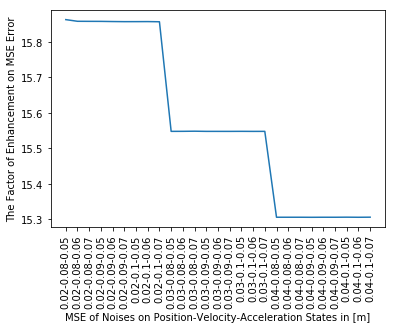

In [372]:
x = numpy.arange(27)
plt.plot(x, val)
plt.xticks(x, names, rotation='vertical')
plt.xlabel('MSE of Noises on Position-Velocity-Acceleration States in [m]')
plt.ylabel('The Factor of Enhancement on MSE Error')

# Model 2

In [373]:
result2 = []
for j in range(len(noise_level[0])):
    result1 = []
    for i in range(len(noise_level)):
        M = read_csv('/Users/Joanna/Documents/*PhD/Research/Matlab_Code/Conference_DeepLearning/Path2/y%d.csv'%noise_level[i][j], header = None)
        R = read_csv('/Users/Joanna/Documents/*PhD/Research/Matlab_Code/Conference_DeepLearning/Path2/a%d.csv'%noise_level[i][j], header = None)
        M = M.T
        R = R.T
        M = M.values[:] # NOISY
        R = R.values[:] # NOISELESS

        M = M.astype('float32')
        R = R.astype('float32')

        # scaler = MinMaxScaler(feature_range=(0, 1))
        # M_r= scaler.fit_transform(M)
        # R_r = scaler.fit_transform(R)

        M_r= M
        R_r = R

        column = 10

        M_r = numpy.reshape(M_r,(int(len(M)/column),3,column))
        R_r = numpy.reshape(R_r,(int(len(R)/column),3,column))

        # split into train and test sets
        train_size = int(len(M_r) * 0.8) #0.67
        test_size = len(M_r) - train_size

        trainN, testN = M_r[0:train_size], M_r[train_size:len(M_r)]
        trainC, testC = R_r[0:train_size], R_r[train_size:len(R_r)]
        
        model2.compile(loss='mean_squared_error', optimizer='adam')
        history_g2 = model2.fit(trainN, trainC, epochs=200, batch_size=200)
        
        trainPredict = model2.predict(trainN)
        testPredict = model2.predict(testN)
        
        testC  = numpy.reshape(testC, (test_size*column, 3))
        testN  = numpy.reshape(testN, (test_size*column, 3))
        testPredict = numpy.reshape(testPredict, (test_size*column, 3))

        trainC  = numpy.reshape(trainC, (train_size*column, 3))
        trainN  = numpy.reshape(trainN, (train_size*column, 3))
        trainPredict = numpy.reshape(trainPredict, (train_size*column, 3))
        
        trainScore_1 = mean_squared_error(trainC[:,0], trainPredict[:,0])
        testScore_1 = mean_squared_error(testC[:,0], testPredict[:,0])
        
        trainScore_2 = mean_squared_error(trainC[:,0], trainN[:,0])
        testScore_2 = mean_squared_error(testC[:,0], testN[:,0])
    
        result1.append(testScore_2/testScore_1)
        print('length', len(result1))
    result2.append(result1)
        
        

Epoch 1/200
80/80 [==============================] - 10s 124ms/step - loss: 0.0812
Epoch 2/200
80/80 [==============================] - 0s 84us/step - loss: 0.1129
Epoch 3/200
80/80 [==============================] - 0s 88us/step - loss: 0.0841
Epoch 4/200
80/80 [==============================] - 0s 82us/step - loss: 0.0900
Epoch 5/200
80/80 [==============================] - 0s 106us/step - loss: 0.0957
Epoch 6/200
80/80 [==============================] - 0s 104us/step - loss: 0.0900
Epoch 7/200
80/80 [==============================] - 0s 90us/step - loss: 0.0833
Epoch 8/200
80/80 [==============================] - 0s 108us/step - loss: 0.0822
Epoch 9/200
80/80 [==============================] - 0s 102us/step - loss: 0.0854
Epoch 10/200
80/80 [==============================] - 0s 96us/step - loss: 0.0875
Epoch 11/200
80/80 [==============================] - 0s 101us/step - loss: 0.0860
Epoch 12/200
80/80 [==============================] - 0s 107us/step - loss: 0.0827
Epoch 13/200
80/8

Epoch 101/200
80/80 [==============================] - 0s 96us/step - loss: 0.0762
Epoch 102/200
80/80 [==============================] - 0s 110us/step - loss: 0.0761
Epoch 103/200
80/80 [==============================] - 0s 121us/step - loss: 0.0761
Epoch 104/200
80/80 [==============================] - 0s 99us/step - loss: 0.0760
Epoch 105/200
80/80 [==============================] - 0s 98us/step - loss: 0.0759
Epoch 106/200
80/80 [==============================] - 0s 102us/step - loss: 0.0758
Epoch 107/200
80/80 [==============================] - 0s 91us/step - loss: 0.0757
Epoch 108/200
80/80 [==============================] - 0s 100us/step - loss: 0.0756
Epoch 109/200
80/80 [==============================] - 0s 120us/step - loss: 0.0755
Epoch 110/200
80/80 [==============================] - 0s 125us/step - loss: 0.0754
Epoch 111/200
80/80 [==============================] - 0s 114us/step - loss: 0.0753
Epoch 112/200
80/80 [==============================] - 0s 115us/step - loss: 0.0

Epoch 199/200
80/80 [==============================] - 0s 99us/step - loss: 0.0218
Epoch 200/200
80/80 [==============================] - 0s 109us/step - loss: 0.0220
('length', 1)
Epoch 1/200
80/80 [==============================] - 10s 127ms/step - loss: 0.0234
Epoch 2/200
80/80 [==============================] - 0s 89us/step - loss: 0.0263
Epoch 3/200
80/80 [==============================] - 0s 85us/step - loss: 0.0307
Epoch 4/200
80/80 [==============================] - 0s 89us/step - loss: 0.0258
Epoch 5/200
80/80 [==============================] - 0s 86us/step - loss: 0.0252
Epoch 6/200
80/80 [==============================] - 0s 92us/step - loss: 0.0266
Epoch 7/200
80/80 [==============================] - 0s 91us/step - loss: 0.0251
Epoch 8/200
80/80 [==============================] - 0s 81us/step - loss: 0.0241
Epoch 9/200
80/80 [==============================] - 0s 94us/step - loss: 0.0245
Epoch 10/200
80/80 [==============================] - 0s 93us/step - loss: 0.0246
Epoch 

80/80 [==============================] - 0s 97us/step - loss: 0.0219
Epoch 99/200
80/80 [==============================] - 0s 94us/step - loss: 0.0219
Epoch 100/200
80/80 [==============================] - 0s 80us/step - loss: 0.0219
Epoch 101/200
80/80 [==============================] - 0s 90us/step - loss: 0.0219
Epoch 102/200
80/80 [==============================] - 0s 96us/step - loss: 0.0219
Epoch 103/200
80/80 [==============================] - 0s 95us/step - loss: 0.0219
Epoch 104/200
80/80 [==============================] - 0s 106us/step - loss: 0.0219
Epoch 105/200
80/80 [==============================] - 0s 95us/step - loss: 0.0219
Epoch 106/200
80/80 [==============================] - 0s 99us/step - loss: 0.0219
Epoch 107/200
80/80 [==============================] - 0s 97us/step - loss: 0.0219
Epoch 108/200
80/80 [==============================] - 0s 99us/step - loss: 0.0219
Epoch 109/200
80/80 [==============================] - 0s 93us/step - loss: 0.0219
Epoch 110/200
80/8

Epoch 197/200
80/80 [==============================] - 0s 101us/step - loss: 0.0216
Epoch 198/200
80/80 [==============================] - 0s 101us/step - loss: 0.0216
Epoch 199/200
80/80 [==============================] - 0s 103us/step - loss: 0.0216
Epoch 200/200
80/80 [==============================] - 0s 100us/step - loss: 0.0216
('length', 2)
Epoch 1/200
80/80 [==============================] - 10s 128ms/step - loss: 0.0228
Epoch 2/200
80/80 [==============================] - 0s 98us/step - loss: 0.0501
Epoch 3/200
80/80 [==============================] - 0s 92us/step - loss: 0.0235
Epoch 4/200
80/80 [==============================] - 0s 87us/step - loss: 0.0382
Epoch 5/200
80/80 [==============================] - 0s 77us/step - loss: 0.0381
Epoch 6/200
80/80 [==============================] - 0s 87us/step - loss: 0.0268
Epoch 7/200
80/80 [==============================] - 0s 89us/step - loss: 0.0234
Epoch 8/200
80/80 [==============================] - 0s 89us/step - loss: 0.0297


Epoch 97/200
80/80 [==============================] - 0s 89us/step - loss: 0.0227
Epoch 98/200
80/80 [==============================] - 0s 95us/step - loss: 0.0227
Epoch 99/200
80/80 [==============================] - 0s 94us/step - loss: 0.0227
Epoch 100/200
80/80 [==============================] - 0s 95us/step - loss: 0.0227
Epoch 101/200
80/80 [==============================] - 0s 98us/step - loss: 0.0227
Epoch 102/200
80/80 [==============================] - 0s 106us/step - loss: 0.0227
Epoch 103/200
80/80 [==============================] - 0s 97us/step - loss: 0.0227
Epoch 104/200
80/80 [==============================] - 0s 101us/step - loss: 0.0227
Epoch 105/200
80/80 [==============================] - 0s 94us/step - loss: 0.0227
Epoch 106/200
80/80 [==============================] - 0s 87us/step - loss: 0.0227
Epoch 107/200
80/80 [==============================] - 0s 97us/step - loss: 0.0227
Epoch 108/200
80/80 [==============================] - 0s 96us/step - loss: 0.0227
Epoch

Epoch 196/200
80/80 [==============================] - 0s 100us/step - loss: 0.0226
Epoch 197/200
80/80 [==============================] - 0s 80us/step - loss: 0.0227
Epoch 198/200
80/80 [==============================] - 0s 95us/step - loss: 0.0227
Epoch 199/200
80/80 [==============================] - 0s 92us/step - loss: 0.0227
Epoch 200/200
80/80 [==============================] - 0s 92us/step - loss: 0.0228
('length', 3)
Epoch 1/200
80/80 [==============================] - 11s 135ms/step - loss: 0.0218
Epoch 2/200
80/80 [==============================] - 0s 95us/step - loss: 0.0715
Epoch 3/200
80/80 [==============================] - 0s 86us/step - loss: 0.0250
Epoch 4/200
80/80 [==============================] - 0s 105us/step - loss: 0.0299
Epoch 5/200
80/80 [==============================] - 0s 104us/step - loss: 0.0476
Epoch 6/200
80/80 [==============================] - 0s 96us/step - loss: 0.0438
Epoch 7/200
80/80 [==============================] - 0s 101us/step - loss: 0.029

Epoch 95/200
80/80 [==============================] - 0s 94us/step - loss: 0.0217
Epoch 96/200
80/80 [==============================] - 0s 90us/step - loss: 0.0217
Epoch 97/200
80/80 [==============================] - 0s 112us/step - loss: 0.0217
Epoch 98/200
80/80 [==============================] - 0s 113us/step - loss: 0.0217
Epoch 99/200
80/80 [==============================] - 0s 90us/step - loss: 0.0217
Epoch 100/200
80/80 [==============================] - 0s 100us/step - loss: 0.0217
Epoch 101/200
80/80 [==============================] - 0s 95us/step - loss: 0.0217
Epoch 102/200
80/80 [==============================] - 0s 98us/step - loss: 0.0217
Epoch 103/200
80/80 [==============================] - 0s 103us/step - loss: 0.0217
Epoch 104/200
80/80 [==============================] - 0s 110us/step - loss: 0.0217
Epoch 105/200
80/80 [==============================] - 0s 115us/step - loss: 0.0217
Epoch 106/200
80/80 [==============================] - 0s 114us/step - loss: 0.0217
Ep

Epoch 193/200
80/80 [==============================] - 0s 112us/step - loss: 0.0217
Epoch 194/200
80/80 [==============================] - 0s 92us/step - loss: 0.0217
Epoch 195/200
80/80 [==============================] - 0s 98us/step - loss: 0.0217
Epoch 196/200
80/80 [==============================] - 0s 98us/step - loss: 0.0217
Epoch 197/200
80/80 [==============================] - 0s 112us/step - loss: 0.0217
Epoch 198/200
80/80 [==============================] - 0s 105us/step - loss: 0.0217
Epoch 199/200
80/80 [==============================] - 0s 100us/step - loss: 0.0217
Epoch 200/200
80/80 [==============================] - 0s 106us/step - loss: 0.0217
('length', 4)
Epoch 1/200
80/80 [==============================] - 11s 133ms/step - loss: 0.0228
Epoch 2/200
80/80 [==============================] - 0s 84us/step - loss: 0.0451
Epoch 3/200
80/80 [==============================] - 0s 90us/step - loss: 0.0245
Epoch 4/200
80/80 [==============================] - 0s 106us/step - los

Epoch 92/200
80/80 [==============================] - 0s 94us/step - loss: 0.0228
Epoch 93/200
80/80 [==============================] - 0s 102us/step - loss: 0.0228
Epoch 94/200
80/80 [==============================] - 0s 111us/step - loss: 0.0228
Epoch 95/200
80/80 [==============================] - 0s 101us/step - loss: 0.0228
Epoch 96/200
80/80 [==============================] - 0s 99us/step - loss: 0.0228
Epoch 97/200
80/80 [==============================] - 0s 99us/step - loss: 0.0228
Epoch 98/200
80/80 [==============================] - 0s 95us/step - loss: 0.0228
Epoch 99/200
80/80 [==============================] - 0s 113us/step - loss: 0.0228
Epoch 100/200
80/80 [==============================] - 0s 116us/step - loss: 0.0228
Epoch 101/200
80/80 [==============================] - 0s 138us/step - loss: 0.0228
Epoch 102/200
80/80 [==============================] - 0s 118us/step - loss: 0.0228
Epoch 103/200
80/80 [==============================] - 0s 120us/step - loss: 0.0228
Epoc

Epoch 190/200
80/80 [==============================] - 0s 101us/step - loss: 0.0228
Epoch 191/200
80/80 [==============================] - 0s 105us/step - loss: 0.0228
Epoch 192/200
80/80 [==============================] - 0s 114us/step - loss: 0.0228
Epoch 193/200
80/80 [==============================] - 0s 108us/step - loss: 0.0228
Epoch 194/200
80/80 [==============================] - 0s 93us/step - loss: 0.0228
Epoch 195/200
80/80 [==============================] - 0s 98us/step - loss: 0.0228
Epoch 196/200
80/80 [==============================] - 0s 100us/step - loss: 0.0228
Epoch 197/200
80/80 [==============================] - 0s 104us/step - loss: 0.0228
Epoch 198/200
80/80 [==============================] - 0s 115us/step - loss: 0.0228
Epoch 199/200
80/80 [==============================] - 0s 115us/step - loss: 0.0228
Epoch 200/200
80/80 [==============================] - 0s 107us/step - loss: 0.0229
('length', 5)
Epoch 1/200
80/80 [==============================] - 10s 129ms/s

Epoch 89/200
80/80 [==============================] - 0s 98us/step - loss: 0.0240
Epoch 90/200
80/80 [==============================] - 0s 106us/step - loss: 0.0240
Epoch 91/200
80/80 [==============================] - 0s 112us/step - loss: 0.0240
Epoch 92/200
80/80 [==============================] - 0s 103us/step - loss: 0.0240
Epoch 93/200
80/80 [==============================] - 0s 105us/step - loss: 0.0240
Epoch 94/200
80/80 [==============================] - 0s 96us/step - loss: 0.0240
Epoch 95/200
80/80 [==============================] - 0s 100us/step - loss: 0.0240
Epoch 96/200
80/80 [==============================] - 0s 110us/step - loss: 0.0240
Epoch 97/200
80/80 [==============================] - 0s 113us/step - loss: 0.0240
Epoch 98/200
80/80 [==============================] - 0s 126us/step - loss: 0.0240
Epoch 99/200
80/80 [==============================] - 0s 104us/step - loss: 0.0240
Epoch 100/200
80/80 [==============================] - 0s 111us/step - loss: 0.0240
Epoch

Epoch 187/200
80/80 [==============================] - 0s 96us/step - loss: 0.0240
Epoch 188/200
80/80 [==============================] - 0s 98us/step - loss: 0.0240
Epoch 189/200
80/80 [==============================] - 0s 97us/step - loss: 0.0240
Epoch 190/200
80/80 [==============================] - 0s 105us/step - loss: 0.0240
Epoch 191/200
80/80 [==============================] - 0s 105us/step - loss: 0.0240
Epoch 192/200
80/80 [==============================] - 0s 96us/step - loss: 0.0240
Epoch 193/200
80/80 [==============================] - 0s 94us/step - loss: 0.0240
Epoch 194/200
80/80 [==============================] - 0s 105us/step - loss: 0.0240
Epoch 195/200
80/80 [==============================] - 0s 115us/step - loss: 0.0240
Epoch 196/200
80/80 [==============================] - 0s 103us/step - loss: 0.0240
Epoch 197/200
80/80 [==============================] - 0s 122us/step - loss: 0.0240
Epoch 198/200
80/80 [==============================] - 0s 113us/step - loss: 0.02

Epoch 86/200
80/80 [==============================] - 0s 90us/step - loss: 0.0231
Epoch 87/200
80/80 [==============================] - 0s 98us/step - loss: 0.0231
Epoch 88/200
80/80 [==============================] - 0s 115us/step - loss: 0.0231
Epoch 89/200
80/80 [==============================] - 0s 114us/step - loss: 0.0231
Epoch 90/200
80/80 [==============================] - 0s 89us/step - loss: 0.0231
Epoch 91/200
80/80 [==============================] - 0s 100us/step - loss: 0.0231
Epoch 92/200
80/80 [==============================] - 0s 104us/step - loss: 0.0231
Epoch 93/200
80/80 [==============================] - 0s 100us/step - loss: 0.0231
Epoch 94/200
80/80 [==============================] - 0s 105us/step - loss: 0.0231
Epoch 95/200
80/80 [==============================] - 0s 109us/step - loss: 0.0231
Epoch 96/200
80/80 [==============================] - 0s 116us/step - loss: 0.0231
Epoch 97/200
80/80 [==============================] - 0s 104us/step - loss: 0.0231
Epoch 9

Epoch 184/200
80/80 [==============================] - 0s 119us/step - loss: 0.0231
Epoch 185/200
80/80 [==============================] - 0s 100us/step - loss: 0.0231
Epoch 186/200
80/80 [==============================] - 0s 103us/step - loss: 0.0231
Epoch 187/200
80/80 [==============================] - 0s 113us/step - loss: 0.0231
Epoch 188/200
80/80 [==============================] - 0s 107us/step - loss: 0.0231
Epoch 189/200
80/80 [==============================] - 0s 99us/step - loss: 0.0231
Epoch 190/200
80/80 [==============================] - 0s 114us/step - loss: 0.0231
Epoch 191/200
80/80 [==============================] - 0s 102us/step - loss: 0.0231
Epoch 192/200
80/80 [==============================] - 0s 100us/step - loss: 0.0231
Epoch 193/200
80/80 [==============================] - 0s 118us/step - loss: 0.0231
Epoch 194/200
80/80 [==============================] - 0s 130us/step - loss: 0.0231
Epoch 195/200
80/80 [==============================] - 0s 124us/step - loss: 

Epoch 83/200
80/80 [==============================] - 0s 129us/step - loss: 0.0242
Epoch 84/200
80/80 [==============================] - 0s 104us/step - loss: 0.0242
Epoch 85/200
80/80 [==============================] - 0s 99us/step - loss: 0.0242
Epoch 86/200
80/80 [==============================] - 0s 101us/step - loss: 0.0242
Epoch 87/200
80/80 [==============================] - 0s 132us/step - loss: 0.0242
Epoch 88/200
80/80 [==============================] - 0s 95us/step - loss: 0.0242
Epoch 89/200
80/80 [==============================] - 0s 97us/step - loss: 0.0242
Epoch 90/200
80/80 [==============================] - 0s 105us/step - loss: 0.0242
Epoch 91/200
80/80 [==============================] - 0s 111us/step - loss: 0.0242
Epoch 92/200
80/80 [==============================] - 0s 122us/step - loss: 0.0242
Epoch 93/200
80/80 [==============================] - 0s 132us/step - loss: 0.0242
Epoch 94/200
80/80 [==============================] - 0s 103us/step - loss: 0.0242
Epoch 9

Epoch 181/200
80/80 [==============================] - 0s 84us/step - loss: 0.0242
Epoch 182/200
80/80 [==============================] - 0s 99us/step - loss: 0.0242
Epoch 183/200
80/80 [==============================] - 0s 102us/step - loss: 0.0242
Epoch 184/200
80/80 [==============================] - 0s 115us/step - loss: 0.0242
Epoch 185/200
80/80 [==============================] - 0s 93us/step - loss: 0.0242
Epoch 186/200
80/80 [==============================] - 0s 114us/step - loss: 0.0242
Epoch 187/200
80/80 [==============================] - 0s 101us/step - loss: 0.0242
Epoch 188/200
80/80 [==============================] - 0s 104us/step - loss: 0.0242
Epoch 189/200
80/80 [==============================] - 0s 102us/step - loss: 0.0242
Epoch 190/200
80/80 [==============================] - 0s 114us/step - loss: 0.0242
Epoch 191/200
80/80 [==============================] - 0s 112us/step - loss: 0.0242
Epoch 192/200
80/80 [==============================] - 0s 111us/step - loss: 0.

Epoch 80/200
80/80 [==============================] - 0s 88us/step - loss: 0.0254
Epoch 81/200
80/80 [==============================] - 0s 104us/step - loss: 0.0254
Epoch 82/200
80/80 [==============================] - 0s 112us/step - loss: 0.0254
Epoch 83/200
80/80 [==============================] - 0s 103us/step - loss: 0.0254
Epoch 84/200
80/80 [==============================] - 0s 108us/step - loss: 0.0254
Epoch 85/200
80/80 [==============================] - 0s 105us/step - loss: 0.0254
Epoch 86/200
80/80 [==============================] - 0s 111us/step - loss: 0.0254
Epoch 87/200
80/80 [==============================] - 0s 131us/step - loss: 0.0254
Epoch 88/200
80/80 [==============================] - 0s 110us/step - loss: 0.0254
Epoch 89/200
80/80 [==============================] - 0s 126us/step - loss: 0.0254
Epoch 90/200
80/80 [==============================] - 0s 105us/step - loss: 0.0254
Epoch 91/200
80/80 [==============================] - 0s 115us/step - loss: 0.0254
Epoch

Epoch 178/200
80/80 [==============================] - 0s 108us/step - loss: 0.0254
Epoch 179/200
80/80 [==============================] - 0s 99us/step - loss: 0.0254
Epoch 180/200
80/80 [==============================] - 0s 105us/step - loss: 0.0254
Epoch 181/200
80/80 [==============================] - 0s 109us/step - loss: 0.0254
Epoch 182/200
80/80 [==============================] - 0s 103us/step - loss: 0.0254
Epoch 183/200
80/80 [==============================] - 0s 102us/step - loss: 0.0254
Epoch 184/200
80/80 [==============================] - 0s 106us/step - loss: 0.0254
Epoch 185/200
80/80 [==============================] - 0s 106us/step - loss: 0.0254
Epoch 186/200
80/80 [==============================] - 0s 117us/step - loss: 0.0254
Epoch 187/200
80/80 [==============================] - 0s 118us/step - loss: 0.0254
Epoch 188/200
80/80 [==============================] - 0s 125us/step - loss: 0.0254
Epoch 189/200
80/80 [==============================] - 0s 106us/step - loss: 

Epoch 77/200
80/80 [==============================] - 0s 104us/step - loss: 0.0215
Epoch 78/200
80/80 [==============================] - 0s 104us/step - loss: 0.0215
Epoch 79/200
80/80 [==============================] - 0s 94us/step - loss: 0.0215
Epoch 80/200
80/80 [==============================] - 0s 110us/step - loss: 0.0215
Epoch 81/200
80/80 [==============================] - 0s 110us/step - loss: 0.0215
Epoch 82/200
80/80 [==============================] - 0s 88us/step - loss: 0.0215
Epoch 83/200
80/80 [==============================] - 0s 99us/step - loss: 0.0215
Epoch 84/200
80/80 [==============================] - 0s 100us/step - loss: 0.0215
Epoch 85/200
80/80 [==============================] - 0s 115us/step - loss: 0.0215
Epoch 86/200
80/80 [==============================] - 0s 128us/step - loss: 0.0215
Epoch 87/200
80/80 [==============================] - 0s 111us/step - loss: 0.0215
Epoch 88/200
80/80 [==============================] - 0s 112us/step - loss: 0.0215
Epoch 8

Epoch 175/200
80/80 [==============================] - 0s 106us/step - loss: 0.0215
Epoch 176/200
80/80 [==============================] - 0s 113us/step - loss: 0.0215
Epoch 177/200
80/80 [==============================] - 0s 96us/step - loss: 0.0215
Epoch 178/200
80/80 [==============================] - 0s 105us/step - loss: 0.0215
Epoch 179/200
80/80 [==============================] - 0s 115us/step - loss: 0.0215
Epoch 180/200
80/80 [==============================] - 0s 108us/step - loss: 0.0215
Epoch 181/200
80/80 [==============================] - 0s 109us/step - loss: 0.0215
Epoch 182/200
80/80 [==============================] - 0s 108us/step - loss: 0.0215
Epoch 183/200
80/80 [==============================] - 0s 135us/step - loss: 0.0215
Epoch 184/200
80/80 [==============================] - 0s 163us/step - loss: 0.0215
Epoch 185/200
80/80 [==============================] - 0s 137us/step - loss: 0.0215
Epoch 186/200
80/80 [==============================] - 0s 108us/step - loss: 

Epoch 74/200
80/80 [==============================] - 0s 107us/step - loss: 0.0227
Epoch 75/200
80/80 [==============================] - 0s 101us/step - loss: 0.0227
Epoch 76/200
80/80 [==============================] - 0s 101us/step - loss: 0.0227
Epoch 77/200
80/80 [==============================] - 0s 107us/step - loss: 0.0227
Epoch 78/200
80/80 [==============================] - 0s 109us/step - loss: 0.0227
Epoch 79/200
80/80 [==============================] - 0s 102us/step - loss: 0.0227
Epoch 80/200
80/80 [==============================] - 0s 101us/step - loss: 0.0227
Epoch 81/200
80/80 [==============================] - 0s 98us/step - loss: 0.0227
Epoch 82/200
80/80 [==============================] - 0s 107us/step - loss: 0.0227
Epoch 83/200
80/80 [==============================] - 0s 114us/step - loss: 0.0227
Epoch 84/200
80/80 [==============================] - 0s 108us/step - loss: 0.0227
Epoch 85/200
80/80 [==============================] - 0s 111us/step - loss: 0.0227
Epoch

80/80 [==============================] - 0s 106us/step - loss: 0.0227
Epoch 173/200
80/80 [==============================] - 0s 102us/step - loss: 0.0227
Epoch 174/200
80/80 [==============================] - 0s 110us/step - loss: 0.0227
Epoch 175/200
80/80 [==============================] - 0s 100us/step - loss: 0.0227
Epoch 176/200
80/80 [==============================] - 0s 102us/step - loss: 0.0227
Epoch 177/200
80/80 [==============================] - 0s 106us/step - loss: 0.0227
Epoch 178/200
80/80 [==============================] - 0s 117us/step - loss: 0.0227
Epoch 179/200
80/80 [==============================] - 0s 109us/step - loss: 0.0227
Epoch 180/200
80/80 [==============================] - 0s 107us/step - loss: 0.0227
Epoch 181/200
80/80 [==============================] - 0s 110us/step - loss: 0.0227
Epoch 182/200
80/80 [==============================] - 0s 99us/step - loss: 0.0227
Epoch 183/200
80/80 [==============================] - 0s 114us/step - loss: 0.0227
Epoch 1

Epoch 71/200
80/80 [==============================] - 0s 101us/step - loss: 0.0239
Epoch 72/200
80/80 [==============================] - 0s 104us/step - loss: 0.0239
Epoch 73/200
80/80 [==============================] - 0s 120us/step - loss: 0.0239
Epoch 74/200
80/80 [==============================] - 0s 111us/step - loss: 0.0238
Epoch 75/200
80/80 [==============================] - 0s 87us/step - loss: 0.0238
Epoch 76/200
80/80 [==============================] - 0s 99us/step - loss: 0.0239
Epoch 77/200
80/80 [==============================] - 0s 99us/step - loss: 0.0239
Epoch 78/200
80/80 [==============================] - 0s 106us/step - loss: 0.0238
Epoch 79/200
80/80 [==============================] - 0s 122us/step - loss: 0.0238
Epoch 80/200
80/80 [==============================] - 0s 129us/step - loss: 0.0238
Epoch 81/200
80/80 [==============================] - 0s 120us/step - loss: 0.0238
Epoch 82/200
80/80 [==============================] - 0s 109us/step - loss: 0.0238
Epoch 8

Epoch 170/200
80/80 [==============================] - 0s 108us/step - loss: 0.0238
Epoch 171/200
80/80 [==============================] - 0s 104us/step - loss: 0.0238
Epoch 172/200
80/80 [==============================] - 0s 100us/step - loss: 0.0238
Epoch 173/200
80/80 [==============================] - 0s 101us/step - loss: 0.0238
Epoch 174/200
80/80 [==============================] - 0s 99us/step - loss: 0.0238
Epoch 175/200
80/80 [==============================] - 0s 112us/step - loss: 0.0238
Epoch 176/200
80/80 [==============================] - 0s 95us/step - loss: 0.0238
Epoch 177/200
80/80 [==============================] - 0s 103us/step - loss: 0.0238
Epoch 178/200
80/80 [==============================] - 0s 96us/step - loss: 0.0238
Epoch 179/200
80/80 [==============================] - 0s 110us/step - loss: 0.0238
Epoch 180/200
80/80 [==============================] - 0s 110us/step - loss: 0.0238
Epoch 181/200
80/80 [==============================] - 0s 117us/step - loss: 0.

Epoch 69/200
80/80 [==============================] - 0s 101us/step - loss: 0.0229
Epoch 70/200
80/80 [==============================] - 0s 98us/step - loss: 0.0229
Epoch 71/200
80/80 [==============================] - 0s 101us/step - loss: 0.0229
Epoch 72/200
80/80 [==============================] - 0s 97us/step - loss: 0.0229
Epoch 73/200
80/80 [==============================] - 0s 98us/step - loss: 0.0229
Epoch 74/200
80/80 [==============================] - 0s 100us/step - loss: 0.0229
Epoch 75/200
80/80 [==============================] - 0s 103us/step - loss: 0.0229
Epoch 76/200
80/80 [==============================] - 0s 111us/step - loss: 0.0229
Epoch 77/200
80/80 [==============================] - 0s 115us/step - loss: 0.0229
Epoch 78/200
80/80 [==============================] - 0s 123us/step - loss: 0.0229
Epoch 79/200
80/80 [==============================] - 0s 113us/step - loss: 0.0229
Epoch 80/200
80/80 [==============================] - 0s 122us/step - loss: 0.0229
Epoch 8

Epoch 168/200
80/80 [==============================] - 0s 112us/step - loss: 0.0229
Epoch 169/200
80/80 [==============================] - 0s 100us/step - loss: 0.0229
Epoch 170/200
80/80 [==============================] - 0s 97us/step - loss: 0.0229
Epoch 171/200
80/80 [==============================] - 0s 98us/step - loss: 0.0229
Epoch 172/200
80/80 [==============================] - 0s 113us/step - loss: 0.0229
Epoch 173/200
80/80 [==============================] - 0s 101us/step - loss: 0.0229
Epoch 174/200
80/80 [==============================] - 0s 99us/step - loss: 0.0229
Epoch 175/200
80/80 [==============================] - 0s 110us/step - loss: 0.0229
Epoch 176/200
80/80 [==============================] - 0s 110us/step - loss: 0.0229
Epoch 177/200
80/80 [==============================] - 0s 107us/step - loss: 0.0229
Epoch 178/200
80/80 [==============================] - 0s 116us/step - loss: 0.0229
Epoch 179/200
80/80 [==============================] - 0s 110us/step - loss: 0.

Epoch 67/200
80/80 [==============================] - 0s 98us/step - loss: 0.0241
Epoch 68/200
80/80 [==============================] - 0s 97us/step - loss: 0.0241
Epoch 69/200
80/80 [==============================] - 0s 109us/step - loss: 0.0241
Epoch 70/200
80/80 [==============================] - 0s 104us/step - loss: 0.0241
Epoch 71/200
80/80 [==============================] - 0s 107us/step - loss: 0.0241
Epoch 72/200
80/80 [==============================] - 0s 102us/step - loss: 0.0241
Epoch 73/200
80/80 [==============================] - 0s 106us/step - loss: 0.0241
Epoch 74/200
80/80 [==============================] - 0s 106us/step - loss: 0.0241
Epoch 75/200
80/80 [==============================] - 0s 100us/step - loss: 0.0241
Epoch 76/200
80/80 [==============================] - 0s 111us/step - loss: 0.0241
Epoch 77/200
80/80 [==============================] - 0s 114us/step - loss: 0.0241
Epoch 78/200
80/80 [==============================] - 0s 120us/step - loss: 0.0241
Epoch 

80/80 [==============================] - 0s 94us/step - loss: 0.0241
Epoch 166/200
80/80 [==============================] - 0s 110us/step - loss: 0.0241
Epoch 167/200
80/80 [==============================] - 0s 110us/step - loss: 0.0241
Epoch 168/200
80/80 [==============================] - 0s 92us/step - loss: 0.0241
Epoch 169/200
80/80 [==============================] - 0s 98us/step - loss: 0.0241
Epoch 170/200
80/80 [==============================] - 0s 99us/step - loss: 0.0241
Epoch 171/200
80/80 [==============================] - 0s 90us/step - loss: 0.0241
Epoch 172/200
80/80 [==============================] - 0s 100us/step - loss: 0.0241
Epoch 173/200
80/80 [==============================] - 0s 108us/step - loss: 0.0241
Epoch 174/200
80/80 [==============================] - 0s 114us/step - loss: 0.0241
Epoch 175/200
80/80 [==============================] - 0s 107us/step - loss: 0.0241
Epoch 176/200
80/80 [==============================] - 0s 108us/step - loss: 0.0241
Epoch 177/2

Epoch 64/200
80/80 [==============================] - 0s 99us/step - loss: 0.0253
Epoch 65/200
80/80 [==============================] - 0s 104us/step - loss: 0.0252
Epoch 66/200
80/80 [==============================] - 0s 99us/step - loss: 0.0252
Epoch 67/200
80/80 [==============================] - 0s 121us/step - loss: 0.0253
Epoch 68/200
80/80 [==============================] - 0s 89us/step - loss: 0.0253
Epoch 69/200
80/80 [==============================] - 0s 97us/step - loss: 0.0253
Epoch 70/200
80/80 [==============================] - 0s 102us/step - loss: 0.0252
Epoch 71/200
80/80 [==============================] - 0s 103us/step - loss: 0.0252
Epoch 72/200
80/80 [==============================] - 0s 118us/step - loss: 0.0252
Epoch 73/200
80/80 [==============================] - 0s 112us/step - loss: 0.0253
Epoch 74/200
80/80 [==============================] - 0s 129us/step - loss: 0.0252
Epoch 75/200
80/80 [==============================] - 0s 108us/step - loss: 0.0252
Epoch 76

80/80 [==============================] - 0s 110us/step - loss: 0.0252
Epoch 163/200
80/80 [==============================] - 0s 102us/step - loss: 0.0252
Epoch 164/200
80/80 [==============================] - 0s 96us/step - loss: 0.0252
Epoch 165/200
80/80 [==============================] - 0s 105us/step - loss: 0.0252
Epoch 166/200
80/80 [==============================] - 0s 107us/step - loss: 0.0252
Epoch 167/200
80/80 [==============================] - 0s 102us/step - loss: 0.0252
Epoch 168/200
80/80 [==============================] - 0s 98us/step - loss: 0.0252
Epoch 169/200
80/80 [==============================] - 0s 106us/step - loss: 0.0252
Epoch 170/200
80/80 [==============================] - 0s 106us/step - loss: 0.0252
Epoch 171/200
80/80 [==============================] - 0s 110us/step - loss: 0.0252
Epoch 172/200
80/80 [==============================] - 0s 129us/step - loss: 0.0252
Epoch 173/200
80/80 [==============================] - 0s 124us/step - loss: 0.0252
Epoch 17

Epoch 61/200
80/80 [==============================] - 0s 95us/step - loss: 0.0244
Epoch 62/200
80/80 [==============================] - 0s 98us/step - loss: 0.0244
Epoch 63/200
80/80 [==============================] - 0s 105us/step - loss: 0.0243
Epoch 64/200
80/80 [==============================] - 0s 109us/step - loss: 0.0243
Epoch 65/200
80/80 [==============================] - 0s 104us/step - loss: 0.0243
Epoch 66/200
80/80 [==============================] - 0s 103us/step - loss: 0.0244
Epoch 67/200
80/80 [==============================] - 0s 101us/step - loss: 0.0244
Epoch 68/200
80/80 [==============================] - 0s 105us/step - loss: 0.0243
Epoch 69/200
80/80 [==============================] - 0s 102us/step - loss: 0.0243
Epoch 70/200
80/80 [==============================] - 0s 120us/step - loss: 0.0243
Epoch 71/200
80/80 [==============================] - 0s 123us/step - loss: 0.0243
Epoch 72/200
80/80 [==============================] - 0s 115us/step - loss: 0.0243
Epoch 

80/80 [==============================] - 0s 102us/step - loss: 0.0243
Epoch 160/200
80/80 [==============================] - 0s 105us/step - loss: 0.0243
Epoch 161/200
80/80 [==============================] - 0s 93us/step - loss: 0.0243
Epoch 162/200
80/80 [==============================] - 0s 98us/step - loss: 0.0243
Epoch 163/200
80/80 [==============================] - 0s 96us/step - loss: 0.0243
Epoch 164/200
80/80 [==============================] - 0s 97us/step - loss: 0.0243
Epoch 165/200
80/80 [==============================] - 0s 99us/step - loss: 0.0243
Epoch 166/200
80/80 [==============================] - 0s 96us/step - loss: 0.0243
Epoch 167/200
80/80 [==============================] - 0s 101us/step - loss: 0.0243
Epoch 168/200
80/80 [==============================] - 0s 100us/step - loss: 0.0243
Epoch 169/200
80/80 [==============================] - 0s 119us/step - loss: 0.0243
Epoch 170/200
80/80 [==============================] - 0s 110us/step - loss: 0.0243
Epoch 171/20

Epoch 58/200
80/80 [==============================] - 0s 110us/step - loss: 0.0255
Epoch 59/200
80/80 [==============================] - 0s 130us/step - loss: 0.0255
Epoch 60/200
80/80 [==============================] - 0s 117us/step - loss: 0.0255
Epoch 61/200
80/80 [==============================] - 0s 104us/step - loss: 0.0255
Epoch 62/200
80/80 [==============================] - 0s 101us/step - loss: 0.0255
Epoch 63/200
80/80 [==============================] - 0s 99us/step - loss: 0.0255
Epoch 64/200
80/80 [==============================] - 0s 101us/step - loss: 0.0255
Epoch 65/200
80/80 [==============================] - 0s 101us/step - loss: 0.0255
Epoch 66/200
80/80 [==============================] - 0s 123us/step - loss: 0.0255
Epoch 67/200
80/80 [==============================] - 0s 103us/step - loss: 0.0255
Epoch 68/200
80/80 [==============================] - 0s 92us/step - loss: 0.0255
Epoch 69/200
80/80 [==============================] - 0s 98us/step - loss: 0.0255
Epoch 7

Epoch 157/200
80/80 [==============================] - 0s 109us/step - loss: 0.0255
Epoch 158/200
80/80 [==============================] - 0s 102us/step - loss: 0.0255
Epoch 159/200
80/80 [==============================] - 0s 101us/step - loss: 0.0255
Epoch 160/200
80/80 [==============================] - 0s 102us/step - loss: 0.0255
Epoch 161/200
80/80 [==============================] - 0s 104us/step - loss: 0.0255
Epoch 162/200
80/80 [==============================] - 0s 94us/step - loss: 0.0255
Epoch 163/200
80/80 [==============================] - 0s 114us/step - loss: 0.0255
Epoch 164/200
80/80 [==============================] - 0s 99us/step - loss: 0.0255
Epoch 165/200
80/80 [==============================] - 0s 103us/step - loss: 0.0255
Epoch 166/200
80/80 [==============================] - 0s 120us/step - loss: 0.0255
Epoch 167/200
80/80 [==============================] - 0s 131us/step - loss: 0.0255
Epoch 168/200
80/80 [==============================] - 0s 123us/step - loss: 0

Epoch 56/200
80/80 [==============================] - 0s 109us/step - loss: 0.0267
Epoch 57/200
80/80 [==============================] - 0s 99us/step - loss: 0.0267
Epoch 58/200
80/80 [==============================] - 0s 100us/step - loss: 0.0267
Epoch 59/200
80/80 [==============================] - 0s 97us/step - loss: 0.0267
Epoch 60/200
80/80 [==============================] - 0s 109us/step - loss: 0.0266
Epoch 61/200
80/80 [==============================] - 0s 100us/step - loss: 0.0266
Epoch 62/200
80/80 [==============================] - 0s 87us/step - loss: 0.0267
Epoch 63/200
80/80 [==============================] - 0s 108us/step - loss: 0.0267
Epoch 64/200
80/80 [==============================] - 0s 125us/step - loss: 0.0266
Epoch 65/200
80/80 [==============================] - 0s 127us/step - loss: 0.0266
Epoch 66/200
80/80 [==============================] - 0s 116us/step - loss: 0.0266
Epoch 67/200
80/80 [==============================] - 0s 126us/step - loss: 0.0267
Epoch 6

80/80 [==============================] - 0s 110us/step - loss: 0.0266
Epoch 155/200
80/80 [==============================] - 0s 101us/step - loss: 0.0266
Epoch 156/200
80/80 [==============================] - 0s 110us/step - loss: 0.0266
Epoch 157/200
80/80 [==============================] - 0s 113us/step - loss: 0.0266
Epoch 158/200
80/80 [==============================] - 0s 103us/step - loss: 0.0266
Epoch 159/200
80/80 [==============================] - 0s 91us/step - loss: 0.0266
Epoch 160/200
80/80 [==============================] - 0s 115us/step - loss: 0.0266
Epoch 161/200
80/80 [==============================] - 0s 97us/step - loss: 0.0266
Epoch 162/200
80/80 [==============================] - 0s 102us/step - loss: 0.0266
Epoch 163/200
80/80 [==============================] - 0s 113us/step - loss: 0.0266
Epoch 164/200
80/80 [==============================] - 0s 115us/step - loss: 0.0266
Epoch 165/200
80/80 [==============================] - 0s 147us/step - loss: 0.0266
Epoch 16

Epoch 53/200
80/80 [==============================] - 0s 108us/step - loss: 0.0229
Epoch 54/200
80/80 [==============================] - 0s 103us/step - loss: 0.0228
Epoch 55/200
80/80 [==============================] - 0s 129us/step - loss: 0.0228
Epoch 56/200
80/80 [==============================] - 0s 109us/step - loss: 0.0229
Epoch 57/200
80/80 [==============================] - 0s 103us/step - loss: 0.0229
Epoch 58/200
80/80 [==============================] - 0s 103us/step - loss: 0.0228
Epoch 59/200
80/80 [==============================] - 0s 102us/step - loss: 0.0228
Epoch 60/200
80/80 [==============================] - 0s 103us/step - loss: 0.0228
Epoch 61/200
80/80 [==============================] - 0s 124us/step - loss: 0.0229
Epoch 62/200
80/80 [==============================] - 0s 137us/step - loss: 0.0229
Epoch 63/200
80/80 [==============================] - 0s 122us/step - loss: 0.0228
Epoch 64/200
80/80 [==============================] - 0s 119us/step - loss: 0.0228
Epoc

Epoch 152/200
80/80 [==============================] - 0s 110us/step - loss: 0.0228
Epoch 153/200
80/80 [==============================] - 0s 141us/step - loss: 0.0228
Epoch 154/200
80/80 [==============================] - 0s 102us/step - loss: 0.0228
Epoch 155/200
80/80 [==============================] - 0s 116us/step - loss: 0.0228
Epoch 156/200
80/80 [==============================] - 0s 133us/step - loss: 0.0228
Epoch 157/200
80/80 [==============================] - 0s 135us/step - loss: 0.0228
Epoch 158/200
80/80 [==============================] - 0s 120us/step - loss: 0.0228
Epoch 159/200
80/80 [==============================] - 0s 118us/step - loss: 0.0228
Epoch 160/200
80/80 [==============================] - 0s 133us/step - loss: 0.0228
Epoch 161/200
80/80 [==============================] - 0s 119us/step - loss: 0.0228
Epoch 162/200
80/80 [==============================] - 0s 132us/step - loss: 0.0228
Epoch 163/200
80/80 [==============================] - 0s 111us/step - loss:

80/80 [==============================] - 0s 128us/step - loss: 0.0240
Epoch 51/200
80/80 [==============================] - 0s 127us/step - loss: 0.0240
Epoch 52/200
80/80 [==============================] - 0s 115us/step - loss: 0.0241
Epoch 53/200
80/80 [==============================] - 0s 116us/step - loss: 0.0241
Epoch 54/200
80/80 [==============================] - 0s 120us/step - loss: 0.0240
Epoch 55/200
80/80 [==============================] - 0s 108us/step - loss: 0.0240
Epoch 56/200
80/80 [==============================] - 0s 116us/step - loss: 0.0240
Epoch 57/200
80/80 [==============================] - 0s 135us/step - loss: 0.0240
Epoch 58/200
80/80 [==============================] - 0s 129us/step - loss: 0.0240
Epoch 59/200
80/80 [==============================] - 0s 128us/step - loss: 0.0240
Epoch 60/200
80/80 [==============================] - 0s 135us/step - loss: 0.0240
Epoch 61/200
80/80 [==============================] - 0s 159us/step - loss: 0.0240
Epoch 62/200
80/8

Epoch 149/200
80/80 [==============================] - 0s 121us/step - loss: 0.0240
Epoch 150/200
80/80 [==============================] - 0s 133us/step - loss: 0.0240
Epoch 151/200
80/80 [==============================] - 0s 115us/step - loss: 0.0240
Epoch 152/200
80/80 [==============================] - 0s 110us/step - loss: 0.0240
Epoch 153/200
80/80 [==============================] - 0s 105us/step - loss: 0.0240
Epoch 154/200
80/80 [==============================] - 0s 102us/step - loss: 0.0240
Epoch 155/200
80/80 [==============================] - 0s 123us/step - loss: 0.0240
Epoch 156/200
80/80 [==============================] - 0s 100us/step - loss: 0.0240
Epoch 157/200
80/80 [==============================] - 0s 121us/step - loss: 0.0240
Epoch 158/200
80/80 [==============================] - 0s 123us/step - loss: 0.0240
Epoch 159/200
80/80 [==============================] - 0s 132us/step - loss: 0.0240
Epoch 160/200
80/80 [==============================] - 0s 129us/step - loss:

80/80 [==============================] - 0s 104us/step - loss: 0.0253
Epoch 48/200
80/80 [==============================] - 0s 109us/step - loss: 0.0253
Epoch 49/200
80/80 [==============================] - 0s 108us/step - loss: 0.0252
Epoch 50/200
80/80 [==============================] - 0s 119us/step - loss: 0.0252
Epoch 51/200
80/80 [==============================] - 0s 90us/step - loss: 0.0252
Epoch 52/200
80/80 [==============================] - 0s 118us/step - loss: 0.0252
Epoch 53/200
80/80 [==============================] - 0s 127us/step - loss: 0.0252
Epoch 54/200
80/80 [==============================] - 0s 107us/step - loss: 0.0252
Epoch 55/200
80/80 [==============================] - 0s 140us/step - loss: 0.0252
Epoch 56/200
80/80 [==============================] - 0s 128us/step - loss: 0.0251
Epoch 57/200
80/80 [==============================] - 0s 146us/step - loss: 0.0252
Epoch 58/200
80/80 [==============================] - 0s 117us/step - loss: 0.0252
Epoch 59/200
80/80

Epoch 146/200
80/80 [==============================] - 0s 103us/step - loss: 0.0251
Epoch 147/200
80/80 [==============================] - 0s 121us/step - loss: 0.0251
Epoch 148/200
80/80 [==============================] - 0s 119us/step - loss: 0.0251
Epoch 149/200
80/80 [==============================] - 0s 112us/step - loss: 0.0251
Epoch 150/200
80/80 [==============================] - 0s 106us/step - loss: 0.0251
Epoch 151/200
80/80 [==============================] - 0s 119us/step - loss: 0.0251
Epoch 152/200
80/80 [==============================] - 0s 121us/step - loss: 0.0251
Epoch 153/200
80/80 [==============================] - 0s 122us/step - loss: 0.0251
Epoch 154/200
80/80 [==============================] - 0s 145us/step - loss: 0.0251
Epoch 155/200
80/80 [==============================] - 0s 113us/step - loss: 0.0251
Epoch 156/200
80/80 [==============================] - 0s 123us/step - loss: 0.0251
Epoch 157/200
80/80 [==============================] - 0s 108us/step - loss:

Epoch 45/200
80/80 [==============================] - 0s 99us/step - loss: 0.0243
Epoch 46/200
80/80 [==============================] - 0s 118us/step - loss: 0.0244
Epoch 47/200
80/80 [==============================] - 0s 135us/step - loss: 0.0245
Epoch 48/200
80/80 [==============================] - 0s 97us/step - loss: 0.0244
Epoch 49/200
80/80 [==============================] - 0s 106us/step - loss: 0.0243
Epoch 50/200
80/80 [==============================] - 0s 89us/step - loss: 0.0242
Epoch 51/200
80/80 [==============================] - 0s 134us/step - loss: 0.0243
Epoch 52/200
80/80 [==============================] - 0s 126us/step - loss: 0.0244
Epoch 53/200
80/80 [==============================] - 0s 103us/step - loss: 0.0244
Epoch 54/200
80/80 [==============================] - 0s 121us/step - loss: 0.0243
Epoch 55/200
80/80 [==============================] - 0s 109us/step - loss: 0.0242
Epoch 56/200
80/80 [==============================] - 0s 118us/step - loss: 0.0242
Epoch 5

Epoch 144/200
80/80 [==============================] - 0s 108us/step - loss: 0.0242
Epoch 145/200
80/80 [==============================] - 0s 108us/step - loss: 0.0242
Epoch 146/200
80/80 [==============================] - 0s 126us/step - loss: 0.0242
Epoch 147/200
80/80 [==============================] - 0s 104us/step - loss: 0.0242
Epoch 148/200
80/80 [==============================] - 0s 122us/step - loss: 0.0242
Epoch 149/200
80/80 [==============================] - 0s 110us/step - loss: 0.0242
Epoch 150/200
80/80 [==============================] - 0s 96us/step - loss: 0.0242
Epoch 151/200
80/80 [==============================] - 0s 119us/step - loss: 0.0242
Epoch 152/200
80/80 [==============================] - 0s 116us/step - loss: 0.0242
Epoch 153/200
80/80 [==============================] - 0s 121us/step - loss: 0.0242
Epoch 154/200
80/80 [==============================] - 0s 111us/step - loss: 0.0242
Epoch 155/200
80/80 [==============================] - 0s 107us/step - loss: 

80/80 [==============================] - 0s 117us/step - loss: 0.0257
Epoch 43/200
80/80 [==============================] - 0s 99us/step - loss: 0.0256
Epoch 44/200
80/80 [==============================] - 0s 118us/step - loss: 0.0255
Epoch 45/200
80/80 [==============================] - 0s 112us/step - loss: 0.0254
Epoch 46/200
80/80 [==============================] - 0s 121us/step - loss: 0.0254
Epoch 47/200
80/80 [==============================] - 0s 102us/step - loss: 0.0255
Epoch 48/200
80/80 [==============================] - 0s 100us/step - loss: 0.0256
Epoch 49/200
80/80 [==============================] - 0s 115us/step - loss: 0.0255
Epoch 50/200
80/80 [==============================] - 0s 101us/step - loss: 0.0254
Epoch 51/200
80/80 [==============================] - 0s 97us/step - loss: 0.0254
Epoch 52/200
80/80 [==============================] - 0s 124us/step - loss: 0.0254
Epoch 53/200
80/80 [==============================] - 0s 118us/step - loss: 0.0255
Epoch 54/200
80/80 

Epoch 141/200
80/80 [==============================] - 0s 105us/step - loss: 0.0254
Epoch 142/200
80/80 [==============================] - 0s 104us/step - loss: 0.0254
Epoch 143/200
80/80 [==============================] - 0s 117us/step - loss: 0.0254
Epoch 144/200
80/80 [==============================] - 0s 111us/step - loss: 0.0254
Epoch 145/200
80/80 [==============================] - 0s 102us/step - loss: 0.0254
Epoch 146/200
80/80 [==============================] - 0s 123us/step - loss: 0.0254
Epoch 147/200
80/80 [==============================] - 0s 102us/step - loss: 0.0254
Epoch 148/200
80/80 [==============================] - 0s 119us/step - loss: 0.0254
Epoch 149/200
80/80 [==============================] - 0s 122us/step - loss: 0.0254
Epoch 150/200
80/80 [==============================] - 0s 121us/step - loss: 0.0254
Epoch 151/200
80/80 [==============================] - 0s 107us/step - loss: 0.0254
Epoch 152/200
80/80 [==============================] - 0s 118us/step - loss:

80/80 [==============================] - 0s 119us/step - loss: 0.0267
Epoch 40/200
80/80 [==============================] - 0s 122us/step - loss: 0.0265
Epoch 41/200
80/80 [==============================] - 0s 109us/step - loss: 0.0267
Epoch 42/200
80/80 [==============================] - 0s 122us/step - loss: 0.0269
Epoch 43/200
80/80 [==============================] - 0s 118us/step - loss: 0.0269
Epoch 44/200
80/80 [==============================] - 0s 113us/step - loss: 0.0267
Epoch 45/200
80/80 [==============================] - 0s 111us/step - loss: 0.0266
Epoch 46/200
80/80 [==============================] - 0s 128us/step - loss: 0.0265
Epoch 47/200
80/80 [==============================] - 0s 108us/step - loss: 0.0266
Epoch 48/200
80/80 [==============================] - 0s 132us/step - loss: 0.0267
Epoch 49/200
80/80 [==============================] - 0s 122us/step - loss: 0.0267
Epoch 50/200
80/80 [==============================] - 0s 122us/step - loss: 0.0266
Epoch 51/200
80/8

Epoch 138/200
80/80 [==============================] - 0s 120us/step - loss: 0.0265
Epoch 139/200
80/80 [==============================] - 0s 97us/step - loss: 0.0265
Epoch 140/200
80/80 [==============================] - 0s 119us/step - loss: 0.0265
Epoch 141/200
80/80 [==============================] - 0s 119us/step - loss: 0.0265
Epoch 142/200
80/80 [==============================] - 0s 124us/step - loss: 0.0265
Epoch 143/200
80/80 [==============================] - 0s 106us/step - loss: 0.0265
Epoch 144/200
80/80 [==============================] - 0s 107us/step - loss: 0.0265
Epoch 145/200
80/80 [==============================] - 0s 110us/step - loss: 0.0265
Epoch 146/200
80/80 [==============================] - 0s 115us/step - loss: 0.0265
Epoch 147/200
80/80 [==============================] - 0s 126us/step - loss: 0.0265
Epoch 148/200
80/80 [==============================] - 0s 126us/step - loss: 0.0265
Epoch 149/200
80/80 [==============================] - 0s 145us/step - loss: 

Epoch 36/200
80/80 [==============================] - 0s 106us/step - loss: 0.0264
Epoch 37/200
80/80 [==============================] - 0s 106us/step - loss: 0.0262
Epoch 38/200
80/80 [==============================] - 0s 95us/step - loss: 0.0259
Epoch 39/200
80/80 [==============================] - 0s 112us/step - loss: 0.0257
Epoch 40/200
80/80 [==============================] - 0s 96us/step - loss: 0.0258
Epoch 41/200
80/80 [==============================] - 0s 112us/step - loss: 0.0259
Epoch 42/200
80/80 [==============================] - 0s 122us/step - loss: 0.0261
Epoch 43/200
80/80 [==============================] - 0s 103us/step - loss: 0.0260
Epoch 44/200
80/80 [==============================] - 0s 116us/step - loss: 0.0258
Epoch 45/200
80/80 [==============================] - 0s 129us/step - loss: 0.0256
Epoch 46/200
80/80 [==============================] - 0s 120us/step - loss: 0.0257
Epoch 47/200
80/80 [==============================] - 0s 111us/step - loss: 0.0258
Epoch 

Epoch 135/200
80/80 [==============================] - 0s 118us/step - loss: 0.0256
Epoch 136/200
80/80 [==============================] - 0s 104us/step - loss: 0.0256
Epoch 137/200
80/80 [==============================] - 0s 134us/step - loss: 0.0256
Epoch 138/200
80/80 [==============================] - 0s 115us/step - loss: 0.0256
Epoch 139/200
80/80 [==============================] - 0s 101us/step - loss: 0.0256
Epoch 140/200
80/80 [==============================] - 0s 109us/step - loss: 0.0256
Epoch 141/200
80/80 [==============================] - 0s 113us/step - loss: 0.0256
Epoch 142/200
80/80 [==============================] - 0s 100us/step - loss: 0.0256
Epoch 143/200
80/80 [==============================] - 0s 111us/step - loss: 0.0256
Epoch 144/200
80/80 [==============================] - 0s 109us/step - loss: 0.0256
Epoch 145/200
80/80 [==============================] - 0s 144us/step - loss: 0.0256
Epoch 146/200
80/80 [==============================] - 0s 120us/step - loss:

Epoch 33/200
80/80 [==============================] - 0s 101us/step - loss: 0.0272
Epoch 34/200
80/80 [==============================] - 0s 109us/step - loss: 0.0269
Epoch 35/200
80/80 [==============================] - 0s 118us/step - loss: 0.0269
Epoch 36/200
80/80 [==============================] - 0s 104us/step - loss: 0.0272
Epoch 37/200
80/80 [==============================] - 0s 113us/step - loss: 0.0274
Epoch 38/200
80/80 [==============================] - 0s 131us/step - loss: 0.0273
Epoch 39/200
80/80 [==============================] - 0s 104us/step - loss: 0.0270
Epoch 40/200
80/80 [==============================] - 0s 131us/step - loss: 0.0268
Epoch 41/200
80/80 [==============================] - 0s 114us/step - loss: 0.0268
Epoch 42/200
80/80 [==============================] - 0s 131us/step - loss: 0.0270
Epoch 43/200
80/80 [==============================] - 0s 123us/step - loss: 0.0271
Epoch 44/200
80/80 [==============================] - 0s 140us/step - loss: 0.0270
Epoc

Epoch 132/200
80/80 [==============================] - 0s 108us/step - loss: 0.0267
Epoch 133/200
80/80 [==============================] - 0s 101us/step - loss: 0.0267
Epoch 134/200
80/80 [==============================] - 0s 130us/step - loss: 0.0267
Epoch 135/200
80/80 [==============================] - 0s 121us/step - loss: 0.0267
Epoch 136/200
80/80 [==============================] - 0s 163us/step - loss: 0.0267
Epoch 137/200
80/80 [==============================] - 0s 108us/step - loss: 0.0267
Epoch 138/200
80/80 [==============================] - 0s 112us/step - loss: 0.0267
Epoch 139/200
80/80 [==============================] - 0s 139us/step - loss: 0.0267
Epoch 140/200
80/80 [==============================] - 0s 131us/step - loss: 0.0267
Epoch 141/200
80/80 [==============================] - 0s 113us/step - loss: 0.0267
Epoch 142/200
80/80 [==============================] - 0s 123us/step - loss: 0.0267
Epoch 143/200
80/80 [==============================] - 0s 168us/step - loss:

Epoch 30/200
80/80 [==============================] - 0s 127us/step - loss: 0.0283
Epoch 31/200
80/80 [==============================] - 0s 109us/step - loss: 0.0286
Epoch 32/200
80/80 [==============================] - 0s 102us/step - loss: 0.0289
Epoch 33/200
80/80 [==============================] - 0s 118us/step - loss: 0.0288
Epoch 34/200
80/80 [==============================] - 0s 108us/step - loss: 0.0284
Epoch 35/200
80/80 [==============================] - 0s 105us/step - loss: 0.0280
Epoch 36/200
80/80 [==============================] - 0s 125us/step - loss: 0.0280
Epoch 37/200
80/80 [==============================] - 0s 104us/step - loss: 0.0283
Epoch 38/200
80/80 [==============================] - 0s 125us/step - loss: 0.0285
Epoch 39/200
80/80 [==============================] - 0s 112us/step - loss: 0.0284
Epoch 40/200
80/80 [==============================] - 0s 114us/step - loss: 0.0281
Epoch 41/200
80/80 [==============================] - 0s 141us/step - loss: 0.0279
Epoc

Epoch 129/200
80/80 [==============================] - 0s 124us/step - loss: 0.0279
Epoch 130/200
80/80 [==============================] - 0s 103us/step - loss: 0.0279
Epoch 131/200
80/80 [==============================] - 0s 99us/step - loss: 0.0279
Epoch 132/200
80/80 [==============================] - 0s 129us/step - loss: 0.0279
Epoch 133/200
80/80 [==============================] - 0s 137us/step - loss: 0.0279
Epoch 134/200
80/80 [==============================] - 0s 106us/step - loss: 0.0279
Epoch 135/200
80/80 [==============================] - 0s 115us/step - loss: 0.0279
Epoch 136/200
80/80 [==============================] - 0s 110us/step - loss: 0.0279
Epoch 137/200
80/80 [==============================] - 0s 107us/step - loss: 0.0279
Epoch 138/200
80/80 [==============================] - 0s 119us/step - loss: 0.0279
Epoch 139/200
80/80 [==============================] - 0s 110us/step - loss: 0.0279
Epoch 140/200
80/80 [==============================] - 0s 131us/step - loss: 

KeyboardInterrupt: 

In [375]:
result2 = pd.DataFrame(result2)
result2.to_csv("generalmodel2.csv")

In [376]:
result2 = pd.read_csv("generalmodel2.csv", header = 0, index_col = ['Unnamed: 0'])

In [377]:
val2 = result2.mean(axis = 0).values

In [378]:
names = ['0.02-0.08-0.05', '0.02-0.08-0.06', '0.02-0.08-0.07', '0.02-0.09-0.05', '0.02-0.09-0.06', '0.02-0.09-0.07', '0.02-0.1-0.05', '0.02-0.1-0.06', '0.02-0.1-0.07', '0.03-0.08-0.05', '0.03-0.08-0.06', '0.03-0.08-0.07', '0.03-0.09-0.05', '0.03-0.09-0.06', '0.03-0.09-0.07', '0.03-0.1-0.05', '0.03-0.1-0.06', '0.03-0.1-0.07','0.04-0.08-0.05', '0.04-0.08-0.06', '0.04-0.08-0.07', '0.04-0.09-0.05', '0.04-0.09-0.06', '0.04-0.09-0.07','0.04-0.1-0.05', '0.04-0.1-0.06', '0.04-0.1-0.07']

Text(0,0.5,u'The Factor of Enhancement on MSE Error')

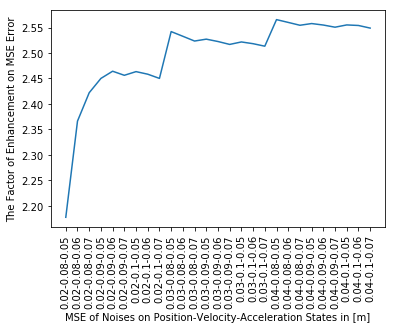

In [379]:
x = numpy.arange(27)
plt.plot(x, val2)
plt.xticks(x, names, rotation='vertical')
plt.xlabel('MSE of Noises on Position-Velocity-Acceleration States in [m]')
plt.ylabel('The Factor of Enhancement on MSE Error')

# Model 3

In [380]:
model3.load_weights('generalmodel.h5')

In [398]:
i = 26
j = 26
result3 = []
for j in range(len(noise_level[0])):
    result1 = []
    for i in range(len(noise_level)):
        M = read_csv('/Users/Joanna/Documents/*PhD/Research/Matlab_Code/Conference_DeepLearning/Path2/y%d.csv'%noise_level[i][j], header = None)
        R = read_csv('/Users/Joanna/Documents/*PhD/Research/Matlab_Code/Conference_DeepLearning/Path2/a%d.csv'%noise_level[i][j], header = None)
        M = M.T
        R = R.T
        M = M.values[:] # NOISY
        R = R.values[:] # NOISELESS

        M = M.astype('float32')
        R = R.astype('float32')

        # scaler = MinMaxScaler(feature_range=(0, 1))
        # M_r= scaler.fit_transform(M)
        # R_r = scaler.fit_transform(R)

        M_r= M
        R_r = R

        column = 10

        M_r = numpy.reshape(M_r,(int(len(M)/column),3,column))
        R_r = numpy.reshape(R_r,(int(len(R)/column),3,column))

        # split into train and test sets
        train_size = int(len(M_r) * 0.8) #0.67
        test_size = len(M_r) - train_size

        trainN, testN = M_r[0:train_size], M_r[train_size:len(M_r)]
        trainC, testC = R_r[0:train_size], R_r[train_size:len(R_r)]
        
        trainPredict = model3.predict(trainN)
        testPredict = model3.predict(testN)
        
        testC  = numpy.reshape(testC, (test_size*column, 3))
        testN  = numpy.reshape(testN, (test_size*column, 3))
        testPredict = numpy.reshape(testPredict, (test_size*column, 3))

        trainC  = numpy.reshape(trainC, (train_size*column, 3))
        trainN  = numpy.reshape(trainN, (train_size*column, 3))
        trainPredict = numpy.reshape(trainPredict, (train_size*column, 3))
        
        trainScore_13 = mean_squared_error(trainC[:,0], trainPredict[:,0])
        testScore_13 = mean_squared_error(testC[:,0], testPredict[:,0])
        
        trainScore_3 = mean_squared_error(trainC[:,0], trainN[:,0])
        testScore_3 = mean_squared_error(testC[:,0], testN[:,0])
    
        result1.append(testScore_3/testScore_13)
    print('j', j)
    result3.append(result1)
        
        

('j', 0)
('j', 1)
('j', 2)
('j', 3)
('j', 4)
('j', 5)
('j', 6)
('j', 7)
('j', 8)
('j', 9)
('j', 10)
('j', 11)
('j', 12)
('j', 13)
('j', 14)
('j', 15)
('j', 16)
('j', 17)
('j', 18)
('j', 19)
('j', 20)
('j', 21)


KeyboardInterrupt: 

In [399]:
result3 = pd.DataFrame(result3)
result3.to_csv("model3.csv")

In [400]:
result3 = pd.read_csv("model3.csv", header = 0, index_col = ['Unnamed: 0'])

In [401]:
val3 = result3.mean(axis = 0).values

In [402]:
names = ['0.02-0.08-0.05', '0.02-0.08-0.06', '0.02-0.08-0.07', '0.02-0.09-0.05', '0.02-0.09-0.06', '0.02-0.09-0.07', '0.02-0.1-0.05', '0.02-0.1-0.06', '0.02-0.1-0.07', '0.03-0.08-0.05', '0.03-0.08-0.06', '0.03-0.08-0.07', '0.03-0.09-0.05', '0.03-0.09-0.06', '0.03-0.09-0.07', '0.03-0.1-0.05', '0.03-0.1-0.06', '0.03-0.1-0.07','0.04-0.08-0.05', '0.04-0.08-0.06', '0.04-0.08-0.07', '0.04-0.09-0.05', '0.04-0.09-0.06', '0.04-0.09-0.07','0.04-0.1-0.05', '0.04-0.1-0.06', '0.04-0.1-0.07']

Text(0,0.5,u'The Factor of Enhancement on MSE Error')

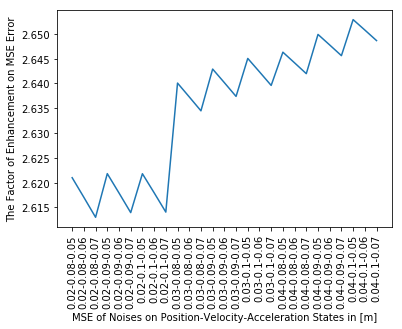

In [403]:
x = numpy.arange(27)
plt.plot(x, val3)
plt.xticks(x, names, rotation='vertical')
plt.xlabel('MSE of Noises on Position-Velocity-Acceleration States in [m]')
plt.ylabel('The Factor of Enhancement on MSE Error')

# Backup

In [173]:
meas = read_csv('/Users/Joanna/Documents/PhD/Research/Matlab_Code/Conference_DeepLearning/Path/meas.csv')

In [136]:
meas_resh = numpy.reshape(meas_part,(int(numpy.shape(meas_part)[0]/10),3,10))

In [140]:
trainPredict_re = model1.predict(meas_resh)

In [141]:
trainPredict_re = numpy.reshape(trainPredict_re, (340,3))

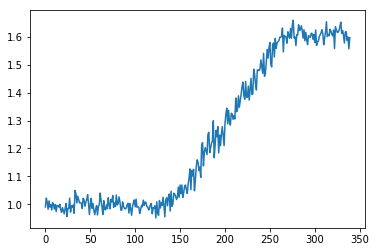

In [178]:
plt.plot(meas_part[:,0])

In [163]:
numpy.shape(trainPredict_re)

(340, 3)

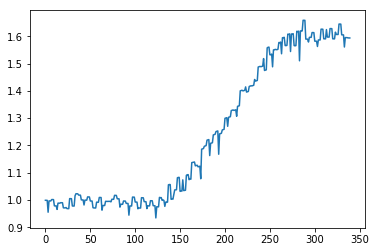

In [143]:
plt.plot(trainPredict_re[:,0])

In [164]:
numpy.shape(gt)

(340, 3)

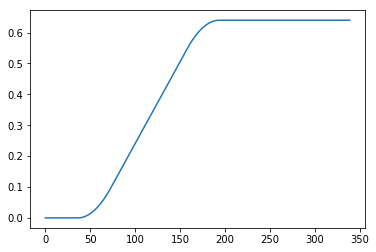

In [161]:
plt.plot(gt[:,0])

In [180]:
trainScore = mean_squared_error(gt[:,0], meas_part[:,0])
print('Measurement Score: %.2f RMSE' % (trainScore))
testScore = mean_squared_error(gt[:,0], trainPredict_re[:,0])
print('Estimaton Score: %.2f RMSE' % (testScore))

Measurement Score: 0.70 RMSE
Estimaton Score: 0.69 RMSE


In [90]:
trainPredict  = numpy.reshape(trainPredict, (numpy.shape(trainPredict)[0]*column, 3))

In [102]:
numpy.shape(Y[-100:,0,0])

(100,)

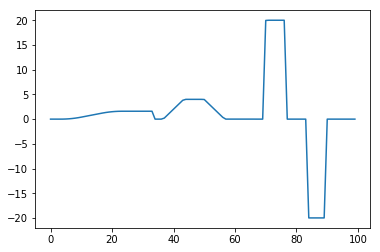

In [104]:
plt.plot(Y[-100:,0,0])